# How to use 🐼pandas filter🎨 in survey EDA 📊# 
## https://www.kaggle.com/corazzon/how-to-use-pandas-filter-in-survey-eda

In [58]:
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns #matplotlib을 기반으로 만들어져 통계 데이터 시각화에 최적화된 인기 라이브러리
import matplotlib.pyplot as plt #visualization
from IPython.display import set_matplotlib_formats #matplotlib format 설정

set_matplotlib_formats("retina")#글씨를 선명하게 보기 위해 retina 설정
# plt.rc('font', family = 'Malgun Gothic') #시각화를 위한 폰트 조절(폰트 : 맑은 고딕)
# plt.rc('axes', unicode_minus = False) #시각화를 위한 폰트 조절(폰트 깨짐 방지 및 window환경 font 조정)
plt.style.use("seaborn-whitegrid") #plot을 화이트 배경에 격자 패턴을 가진 스타일을 사용

# %matplotlib inline #그래프를 노트북 내에 그리기 위해 설정

In [11]:
raw = pd.read_csv(r"./dataset/kaggle_survey_2020_responses.csv", low_memory=False)
#low_memory = True(Default)를 하면 여러 타입이 섞여있으니 False를 추가하여 사용하라는 안내문구가 생성되므로 False로 지정
raw.shape # shape = dim() in R

(20037, 355)

In [12]:
raw.head() # 데이터 확인
# raw.describe()
# raw.info()

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                1838                        35-39   
2                              289287                        30-34   
3                                 860                        35-39   
4                                 507                        30-34   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                   Colombia   
2                   United States of America   
3                                  Argentina   
4                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                    Master’s degree   
3                                  Bachelor’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                            Student   
2                                      Data Engineer   
3                                  Software Engineer   
4                                     Data Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                         5-10 years   
3                                        10-20 years   
4                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                             Python   
3                                                NaN   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                  R   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                SQL  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                SQL  ...   

                                        Q35_B_Part_2  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4              

In [13]:
#질문
question = raw.iloc[0] #여기서 iloc나 loc차이는 없지만, iloc의 경우 인덱스 번호와 무관하게 첫 행부터 차례차례로 가져오고 loc는 인덱스 번호를 사용
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [14]:
#답변
answer = raw.drop([0])
# raw.drop?
answer

Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
5                                                  Japan   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
5                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                              Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
1                        Student   5-10 years    Python         R       SQL   
2                  Data Engineer   5-10 years    Python         R       SQL   
3              Software Engineer  10-20 years       NaN       NaN       NaN   
4                 Data Scientist   5-10 years    Python       NaN       SQL   
5              Software Engineer    3-5 years    Python       NaN       NaN   
...                          ...          ...       ...       ...       ...   
20032                        NaN          NaN       NaN       NaN       NaN   
20033     Currently not employed    20+ years    Python       NaN       NaN   
20034         Research Scientist    < 1 years    Python       NaN       NaN   
20035          Software Engineer    3-5 years    Python       NaN       SQL   
20036  Machine Learning Engineer    < 1 years    Python       NaN       NaN   

       ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1      ...                 NaN          NaN          NaN   TensorBoard    
2      ...                 NaN          NaN          NaN            NaN   
3      ...                 NaN          NaN          NaN            NaN   
4      ...                 NaN          NaN          NaN            NaN   
5      ...                 NaN          NaN          NaN            NaN   
...    ...                 ...          ...          ...            ...   
20032  ...                 NaN          NaN          NaN            NaN   
20033  ...                 NaN          NaN          NaN            NaN   
20034  ...                 NaN          NaN          NaN            NaN   
20035  ...   Weights & Biases           NaN          NaN   TensorBoard    
20036  ...   Weights & Biases           NaN          NaN            NaN   

     

In [15]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


Text(0.5, 1.0, 'What is your age (# years)?')

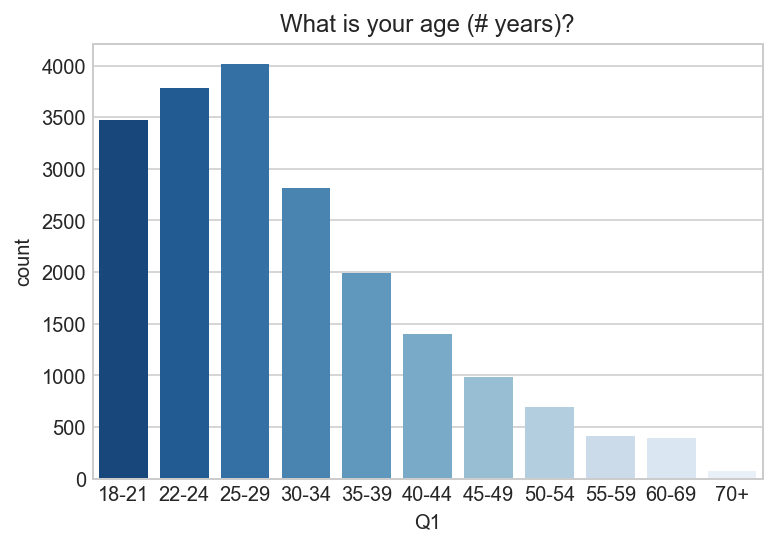

In [16]:
Q1 = answer['Q1'].value_counts().sort_index()
#Q1에서 값을 counting 후 index 기준으로 정렬
#여기서 index는 -의 특수문자가 있고, 그 전 값을 기준으로 정렬됨
# answer['Q1'].value_counts(normalize = True)*100 #데이터 빈도수가 아닌 비율을 확인 가능

sns.countplot(data = answer.sort_values("Q1"), x = "Q1", #seaborn을 활용하여 데이터 plot
             palette="Blues_r").set_title(question["Q1"])
#기본 플랏으로는 answer['Q1'].value_counts().sort_index().plot.bar() 과 같이 하여 bar 그래프로 plot
#barh하면 x ,y 축 변환 가능

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

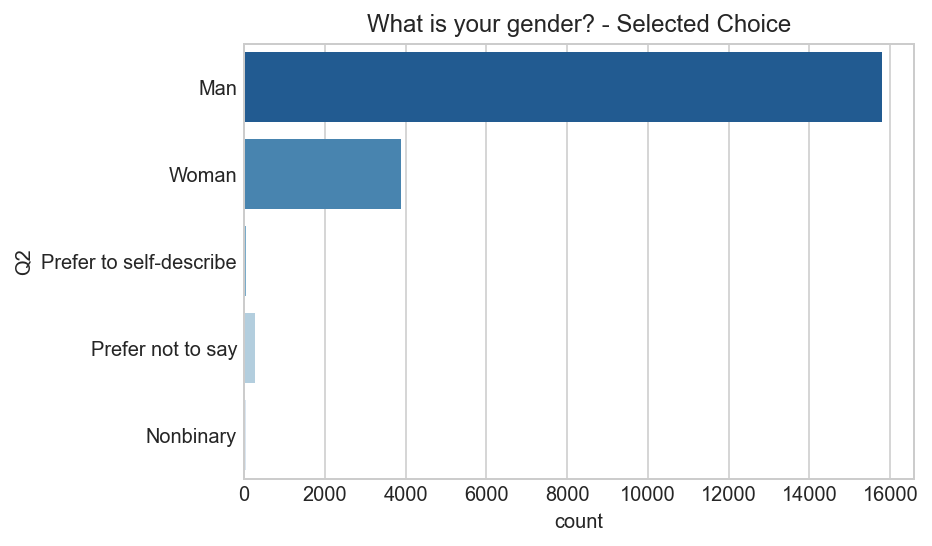

In [18]:
question_no = "Q2"
Q2 = answer[question_no].value_counts().sort_index()
sns.countplot(data = answer, y = "Q2",
             palette = "Blues_r").set_title(question[question_no])

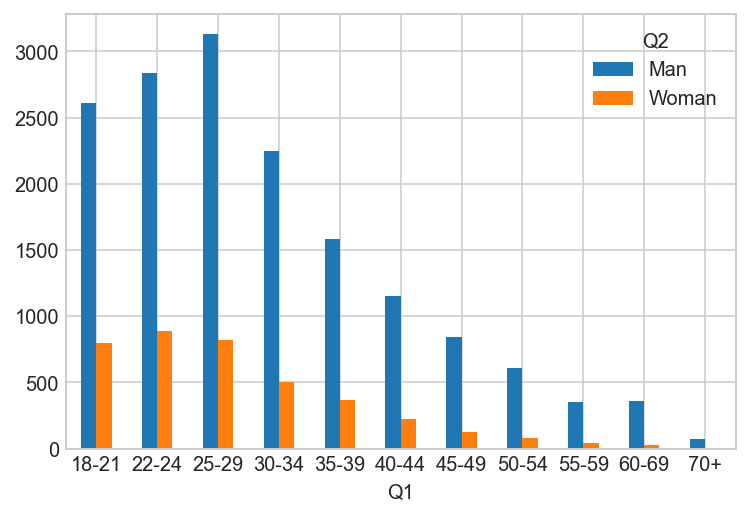

In [218]:
q1q2 = pd.crosstab(answer["Q1"],answer["Q2"])
#value_counts()는 series 형태만 가능
#2개 이상일 경우 =>pd.crosstab
q1q2[["Man","Woman"]].plot.bar(rot=0)

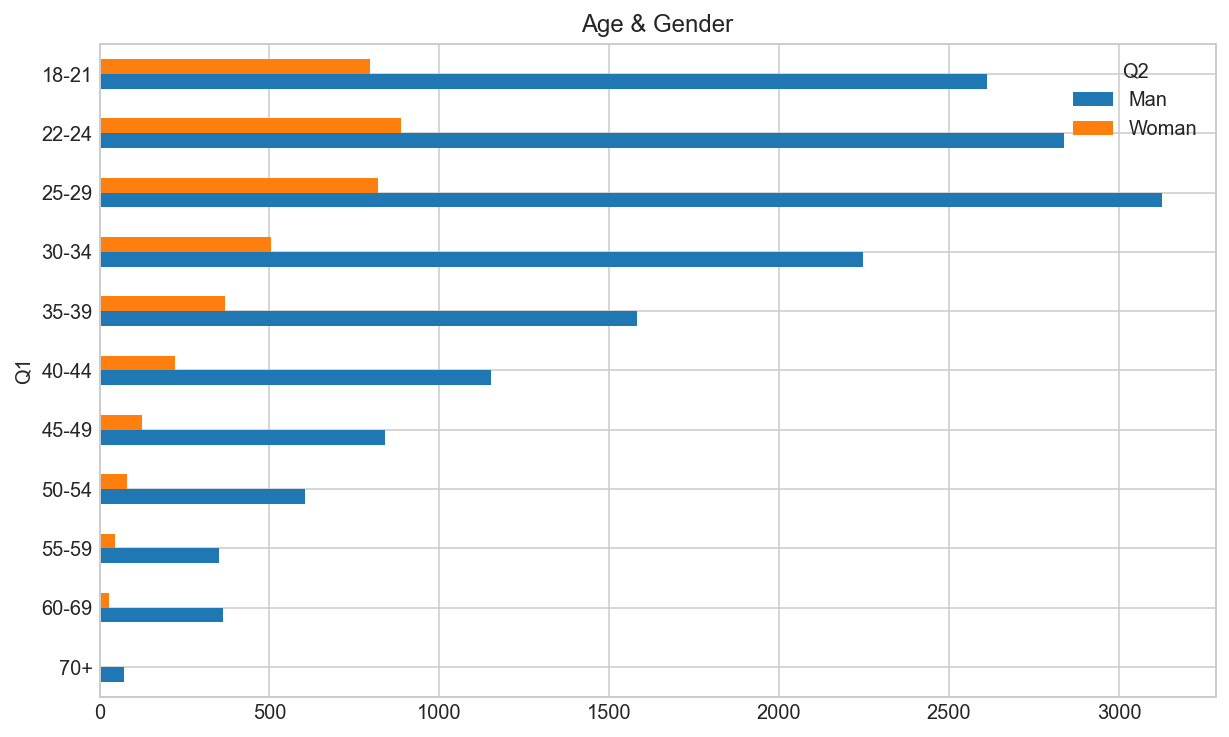

In [224]:
q1q2[["Man","Woman"]].sort_index(ascending = False).plot.barh(figsize = (10,6),title = "Age & Gender")

Text(0.5, 1.0, 'Age & Gender')

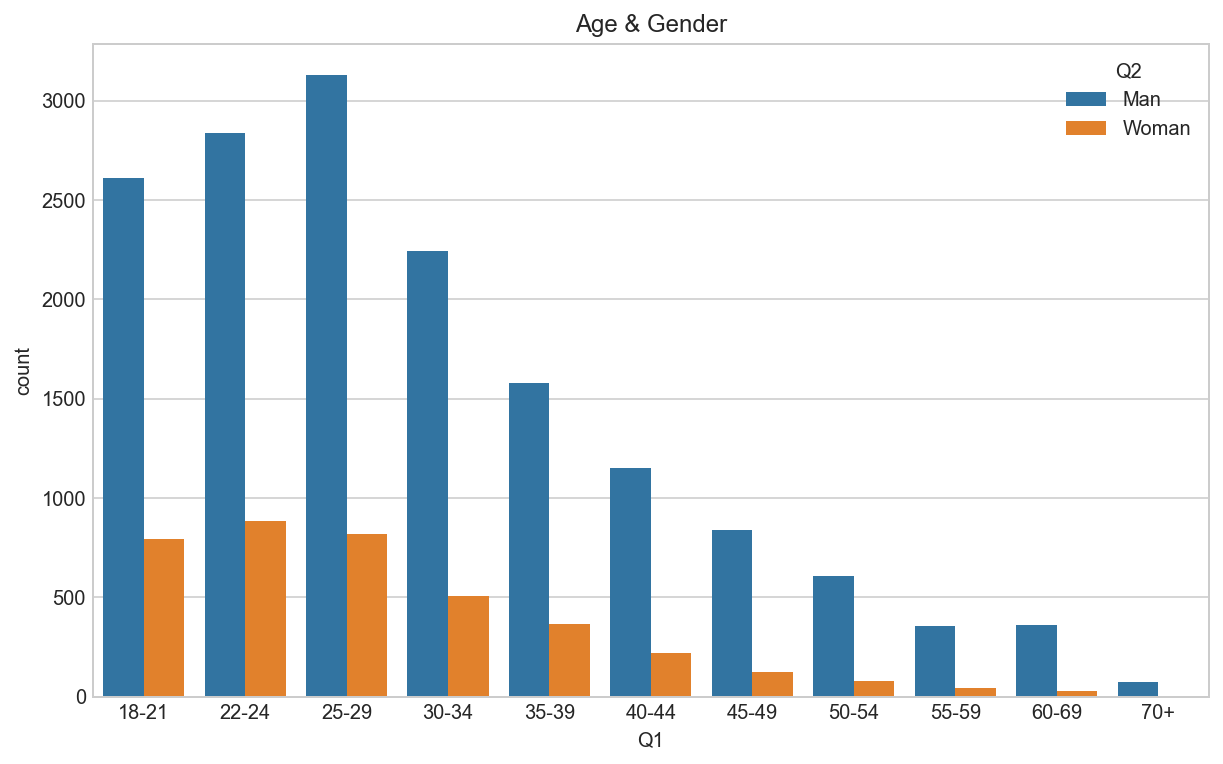

In [252]:
plt.figure(figsize = (10,6))
# sns.countplot(data = answer.loc[(answer["Q2"]=="Man") | (answer["Q2"]=="Woman")].sort_values("Q1"),
#               x = "Q1", hue = "Q2").set_title("Age & Gender")

#상기와 같은 표현이지만, 하기가 조금 더 간결한 표현 방식
sns.countplot(data = answer[answer["Q2"].isin(["Man","Woman"])].sort_values("Q1"),
              x = "Q1", hue = "Q2").set_title("Age & Gender")


In [48]:
q1_cols = answer["Q1"].value_counts().sort_index().index.tolist()
q1_cols

['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']

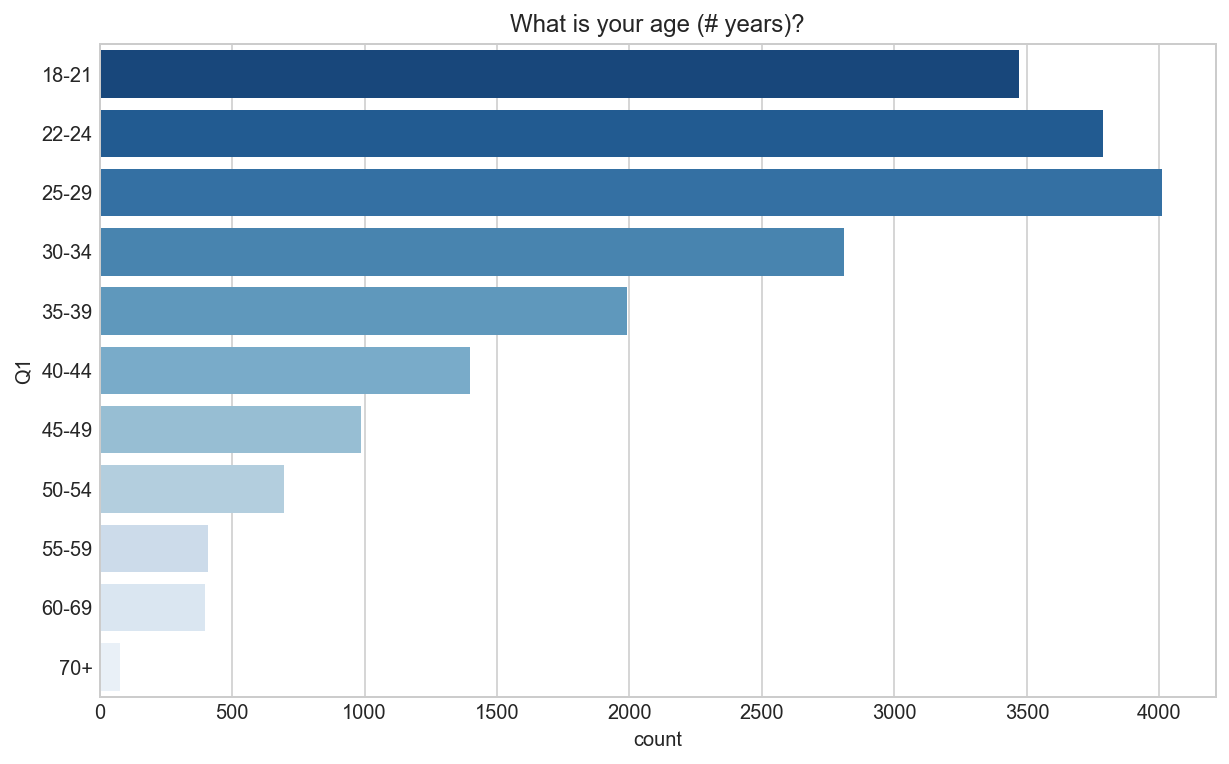

In [51]:
#시각화 반복 작업을 함수로 대체
def show_countplot_by_qno(qno, fsize=(10,6), order = None):
    """ doc string
    qno : question_no ex)Q1, Q2, Q7
    fsize : figure size default (10,6)
    order : optional order list, default value_counts().index
    """
    if not order: #order가 None일 경우 하기 코드를 기본으로 하여 그래프를 그리게 함
        order = answer[qno].value_counts().index #order 값을 series 형태로 넘겨줄 경우 에러가 발생
        
    plt.figure(figsize = fsize) #matplotlib의 plt.figure로 그래프 사이즈 조정
    sns.countplot(data = answer, y = qno,
                  order = order, palette = "Blues_r").set_title(question[qno])

show_countplot_by_qno("Q1", order = q1_cols)

In [136]:
answer["Q6"].value_counts().index

Index(['3-5 years', '1-2 years', '< 1 years', '5-10 years', '10-20 years',
       '20+ years', 'I have never written code'],
      dtype='object')

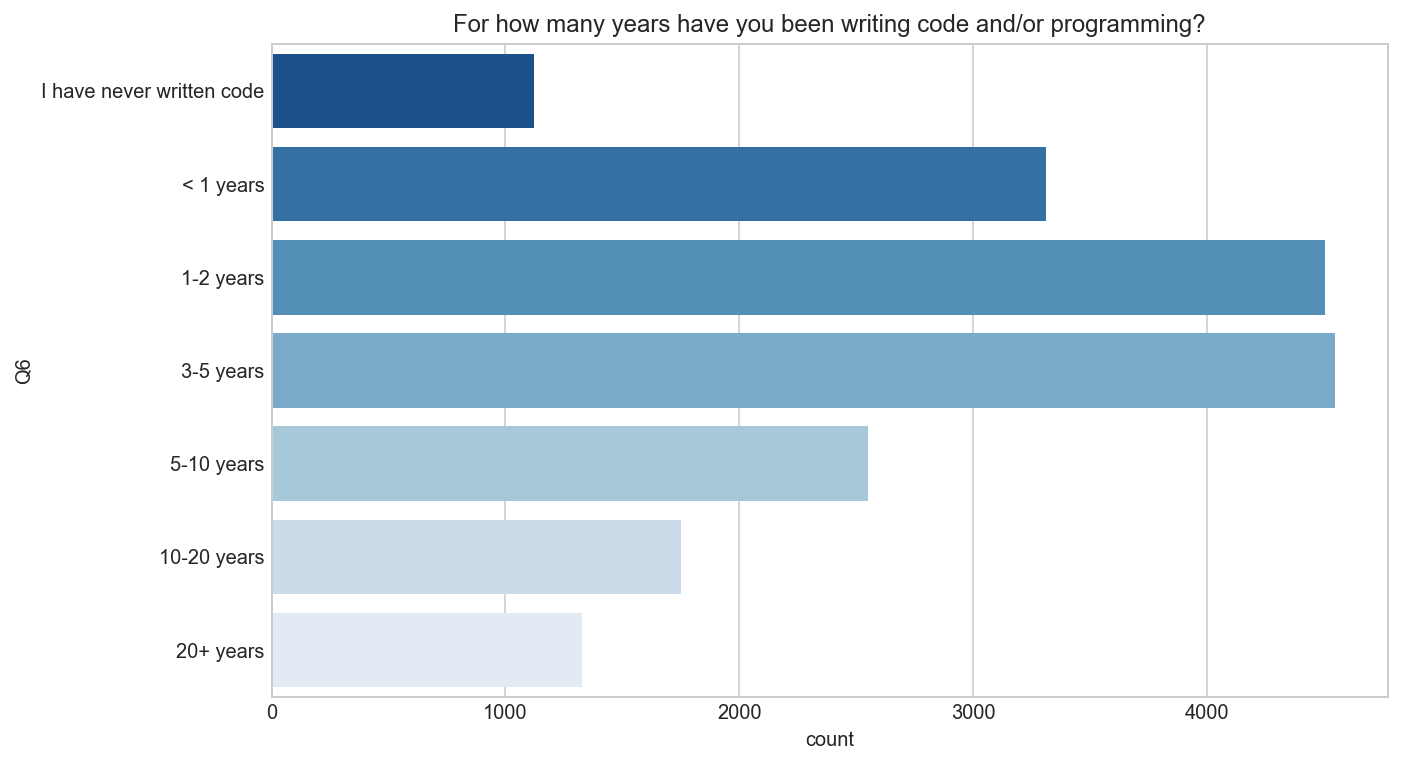

In [62]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
show_countplot_by_qno("Q6", order = q6_cols)

In [81]:
question.filter(regex = "^Q7")[0].split("-")[0]
#regex "정규화 표현"/ ^(캐럿)을 추가할 경우, Q7로 시작하는 컬럼 보기
#regex없이 Q7만 쓰면, Q7이 정확하게 들어가는 컬럼만 선택하게 됨
        

'What programming languages do you use on a regular basis? (Select all that apply) '

In [83]:
answer_Q7 = answer.filter(regex = "^Q7")
answer_Q7

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

In [137]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_count = answer_Q7_desc.loc[["top","count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending = False)
answer_Q7_count

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

In [132]:
q7_title = question.filter(regex = "^Q7")[0].split("-")[0].strip()
q7_title

'What programming languages do you use on a regular basis? (Select all that apply)'

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply)')

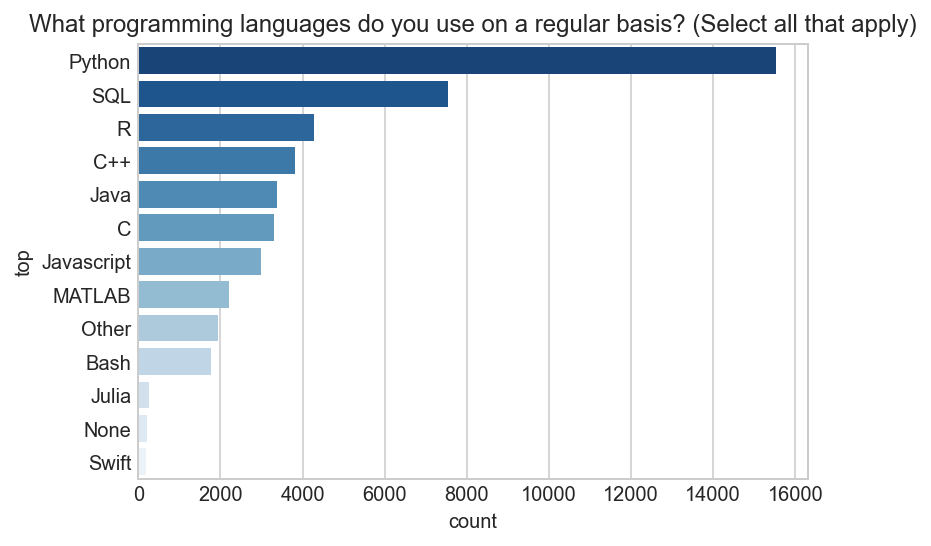

In [133]:
sns.barplot(data = answer_Q7_count,
            y = answer_Q7_count.index, x = "count",
            palette = "Blues_r").set_title(q7_title)

In [271]:
q7_desc = answer.filter(regex = "Q7").describe()
q7_cols = q7_desc.loc["top"].tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [272]:
#다중선택 질문과 성별 조건 그래프 그리기
q2q7 = answer.filter(regex = "Q7|Q2$")
q2q7_count = q2q7.groupby("Q2").count()
q2q7_count.columns = q7_cols
q2q7_count

Python     R   SQL     C   C++  Java  Javascript  \
Q2                                                                          
Man                       12530  3299  5940  2552  3063  2641        2487   
Nonbinary                    41    14    20     8    10     1           6   
Prefer not to say           182    48    97    36    43    42          41   
Prefer to self-describe      41     8    18    12    13     9          12   
Woman                      2736   908  1460   707   698   674         449   

                         Julia  Swift  Bash  MATLAB  None  Other  
Q2                                                                
Man                        238    171  1561    1679   149   1634  
Nonbinary                    1      2    10       7     0      7  
Prefer not to say            5      4    31      28     6     31  
Prefer to self-describe      2      1    10       6     0      7  
Woman                       16     20   164     497    51    266

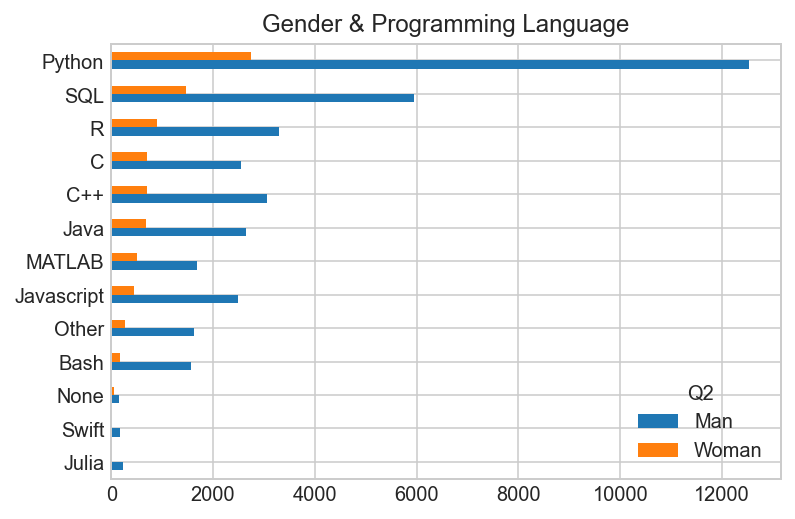

In [287]:
q2q7_count.loc[["Man", "Woman"]].T.sort_values("Woman").plot.barh(title = "Gender & Programming Language")
#아래 로그(<matplotlib.axes._subplots.AxesSubplot at 0x1db1bae78e0>)를 없애고자 할 경우엔 상기 코드를 한 변수에 지정하면 됨
# g = q2q7_count.loc[["Man", "Woman"]].T.sort_values("Woman").plot.barh(title = "Gender & Programming Language")

In [164]:
q_no = answer.filter(regex = "Q7").columns[0]
question[q_no].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [173]:
#if문을 사용하여 질문 제목 가져오기
def get_question_title_function(qno):
    if qno in question:
        return question[qno]
    else :
        q_no = question.filter(regex = f"^{qno}")[0] #내 코드
        q_no = q_no.split("-")[0].strip()
        # q_no = answer.filter(regex = "Q7").columns[0] #강사님 코드
        # q_no = question[q_no].split("-")[0]
        return q_no

for i in range(1,36):
    print(get_question_title_function(f'Q{i}'))

What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?
What programming languages do you use on a regular basis? (Select all that apply)
What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)
Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)
What type of computing platform do you use most often for your data science projects? - Selected Choice
Which types of specialized hardware do you use on a regular basis?  (Select all that appl

In [174]:
#try - except를 통해 질문 제목 가져오기
def get_question_title_function(qno):
    try:
        return question[qno]
    except:
        q_no = question.filter(regex = f"^{qno}")[0] #내 코드
        q_no = q_no.split("-")[0].strip()
        # q_no = answer.filter(regex = "Q7").columns[0] #강사님 코드
        # q_no = question[q_no].split("-")[0]
        return q_no

for i in range(1,36):
    print(get_question_title_function(f'Q{i}'))

What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?
What programming languages do you use on a regular basis? (Select all that apply)
What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)
Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)
What type of computing platform do you use most often for your data science projects? - Selected Choice
Which types of specialized hardware do you use on a regular basis?  (Select all that appl

In [189]:
#다중 선택 질문을 bar 그래프화 할 수 있게 데이터 정제 함수
def get_multiple_choice_answer_by_qno(qno):
    answer_selected = answer.filter(regex = qno)
    answer_desc = answer_selected.describe()
    answer_count = answer_desc.loc[["top","count"]].T.set_index("top")
    answer_count = answer_count.sort_values("count", ascending = False)
    return answer_count

get_multiple_choice_answer_by_qno("Q9")

count
top                                                 
Jupyter (JupyterLab, Jupyter Notebooks, etc)   11211
Visual Studio Code (VSCode)                     5873
 PyCharm                                        5099
 RStudio                                        3826
  Spyder                                        3290
  Notepad++                                     3132
  Sublime Text                                  2452
Visual Studio                                   2445
 MATLAB                                         1604
  Vim / Emacs                                   1502
Other                                           1162
None                                             386

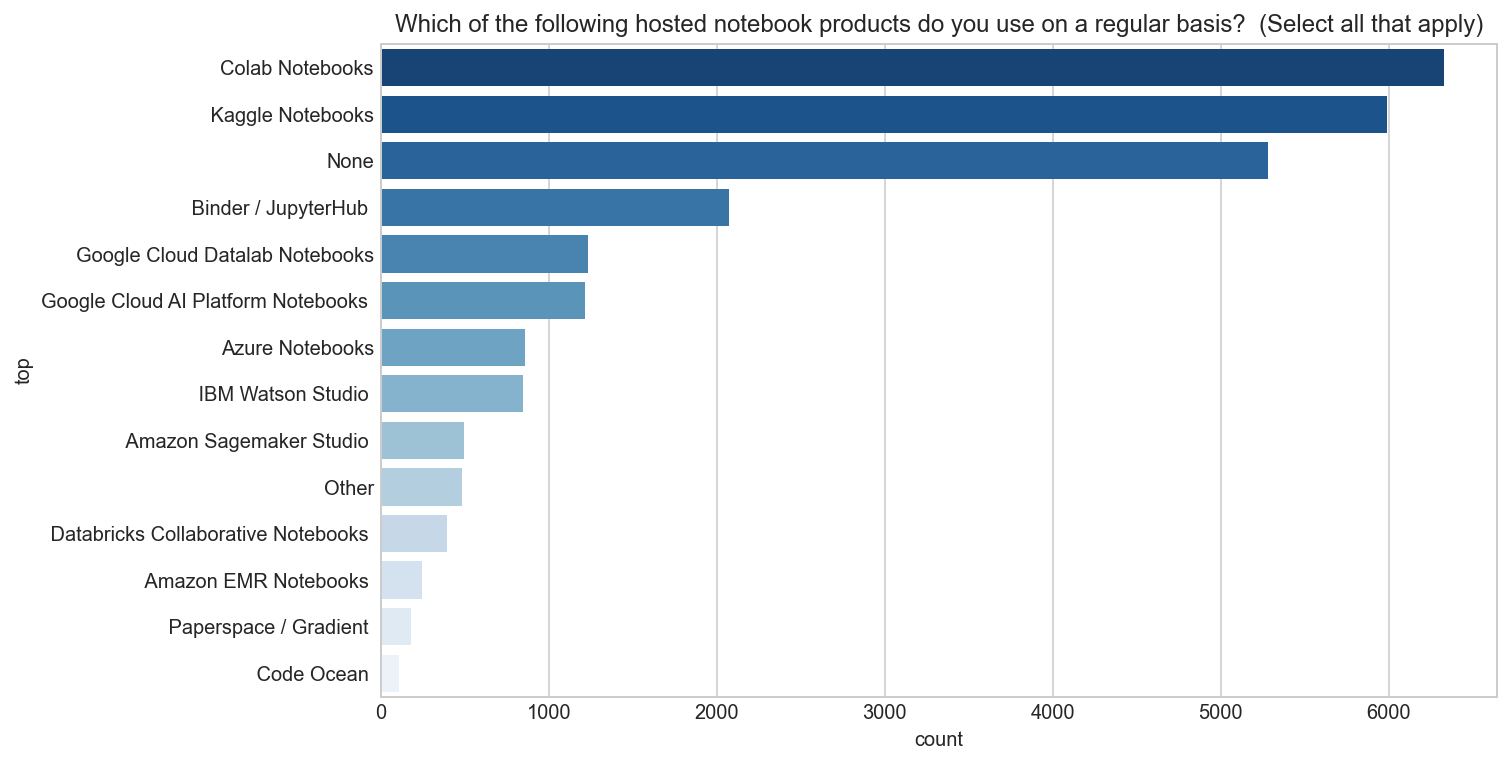

In [312]:
#다중 선택 질문 바 그래프 그리는 함수 
def show_multiple_choice_bar_plot_by_qno(qno, fsize = (10,6),order=None):
    """
    get_multiple_choice_answer_by_qno : 다중 선택질문 데이터 전처리 함수
    fsize : figure size, default (10,6)
    get_question_title_function : 다중선택질문 제목 출력 함수
    """
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
    
    plt.figure(figsize = fsize)
    sns.barplot(data = multiple_choice_answer,
                y = multiple_choice_answer.index,
                order = order,
                palette = "Blues_r",
                x = "count").set_title(get_question_title_function(qno))
    
show_multiple_choice_bar_plot_by_qno("Q10")

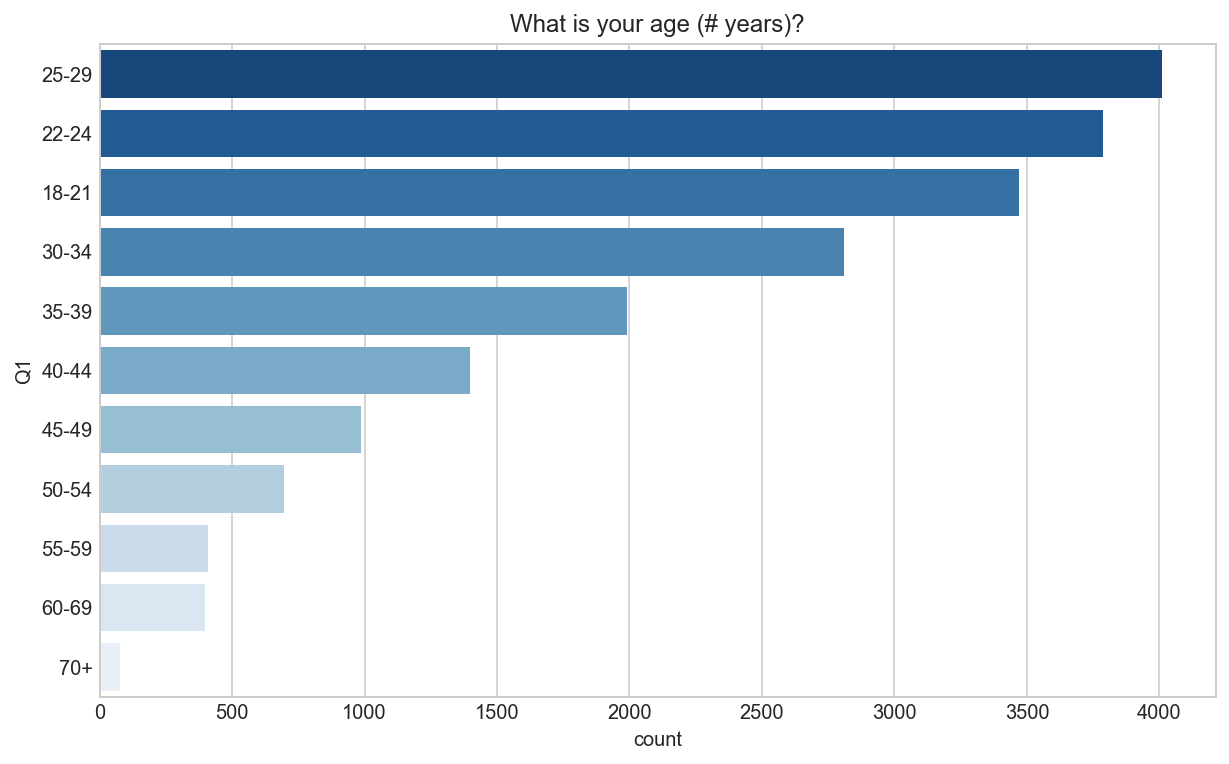

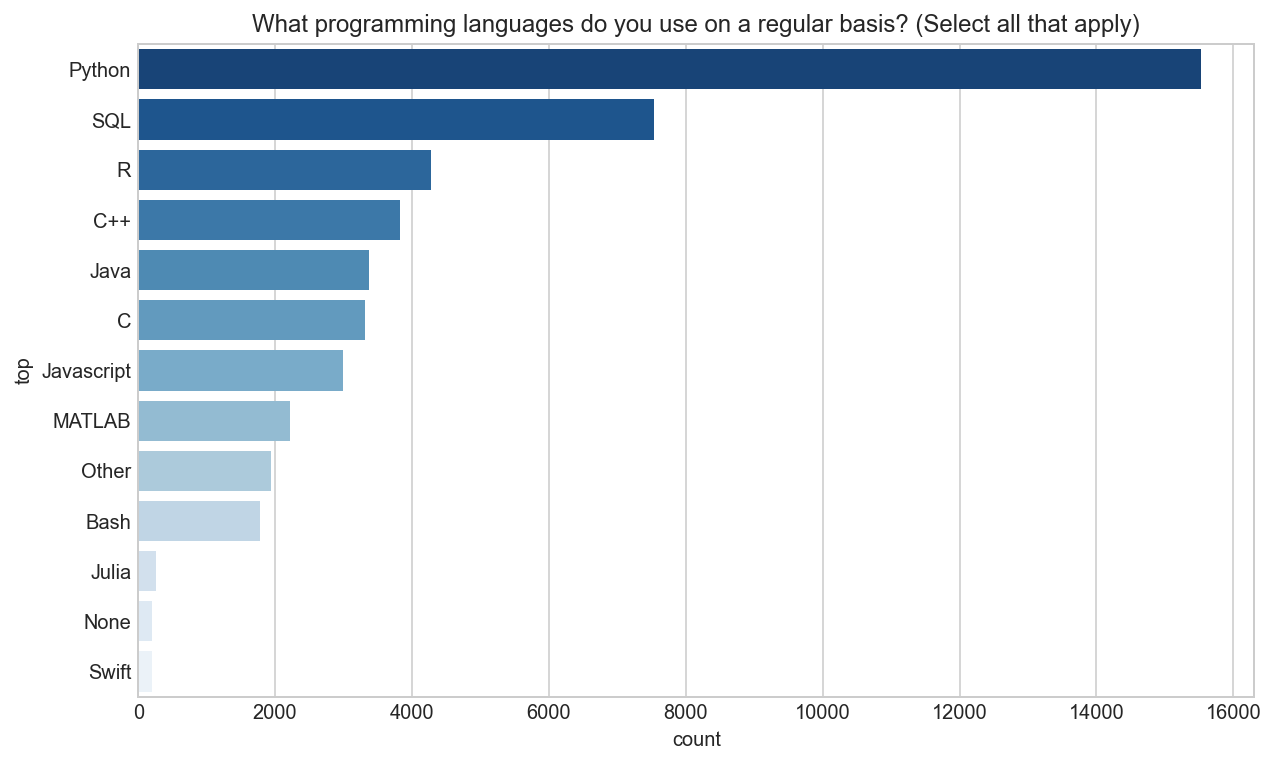

In [293]:
show_countplot_by_qno("Q1")
show_multiple_choice_bar_plot_by_qno("Q7")

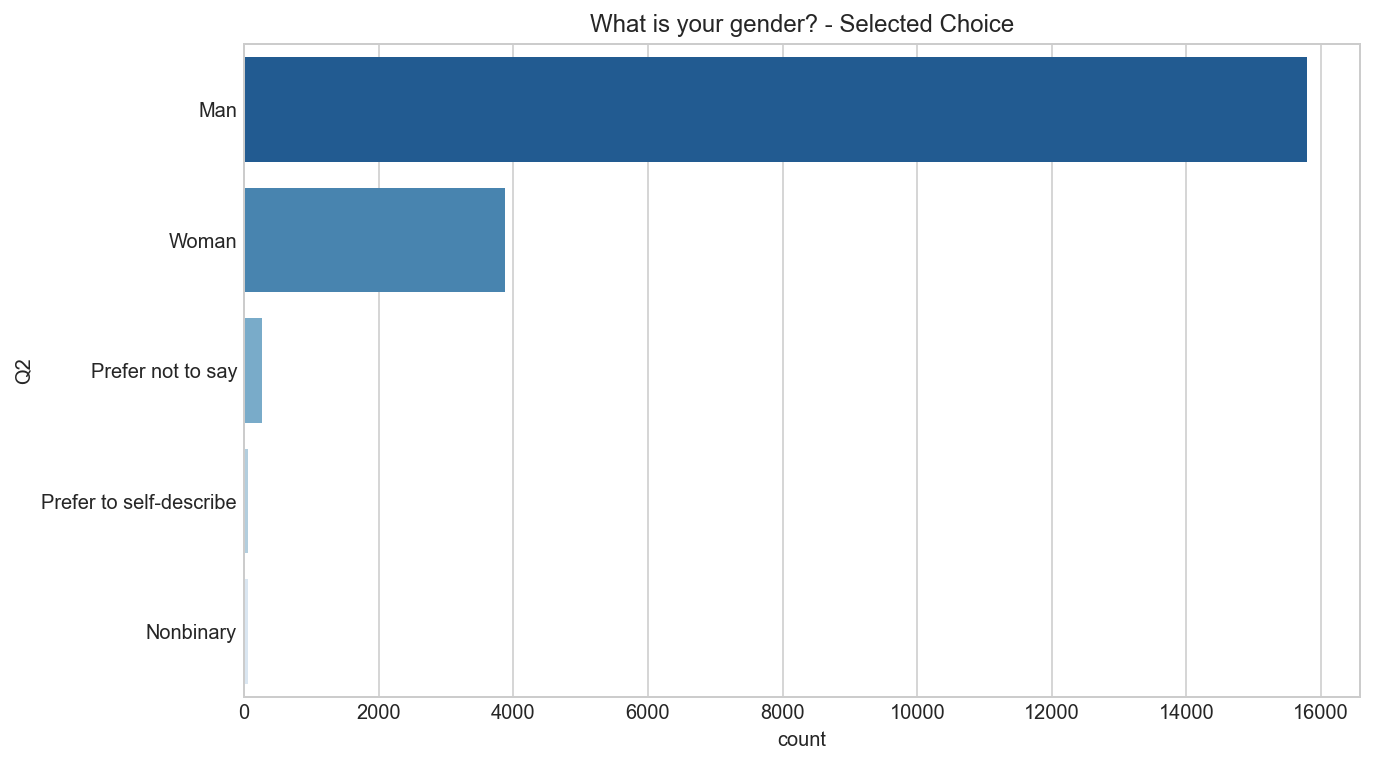

In [314]:
def show_plot_by_qno(qno,fsize=(10,6),order = None):
    if qno in question.index:
        show_countplot_by_qno(qno,fsize,order)
    else:
        show_multiple_choice_bar_plot_by_qno(qno,fsize,order)

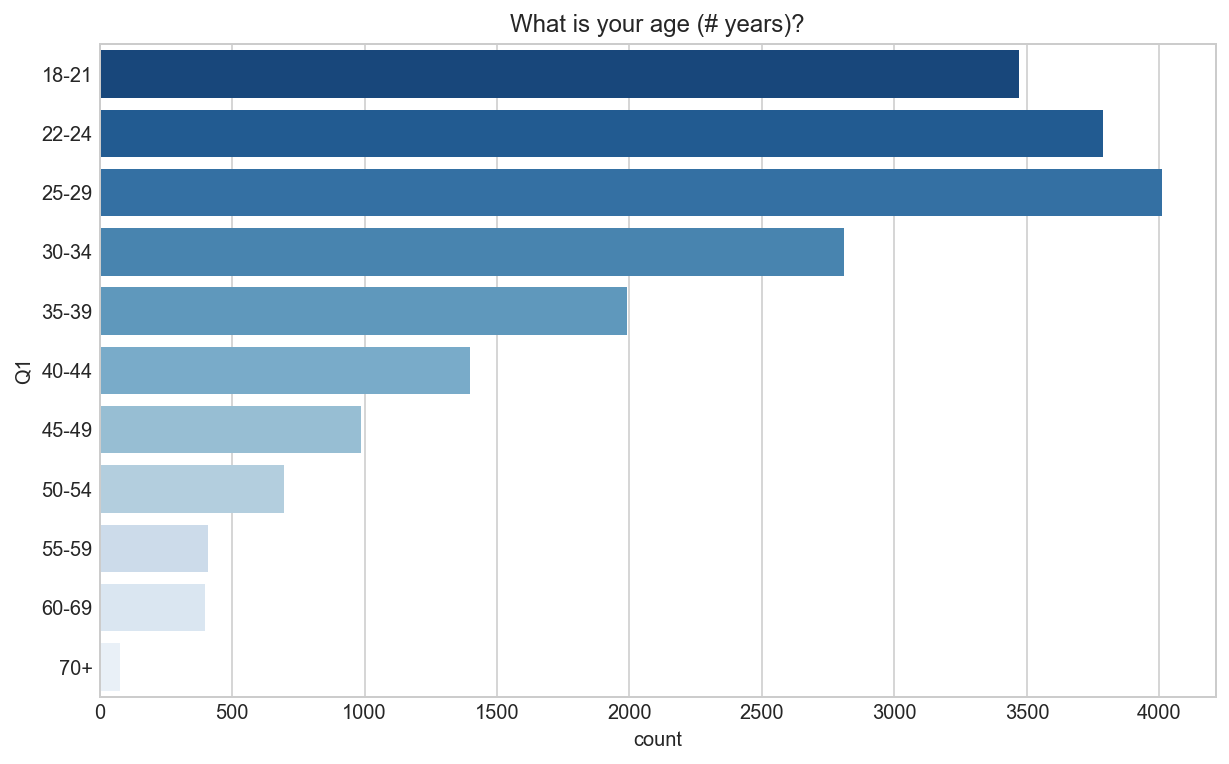

In [322]:
q1_cols = answer["Q1"].value_counts().sort_index().index.tolist()
show_plot_by_qno("Q1",order=q1_cols)

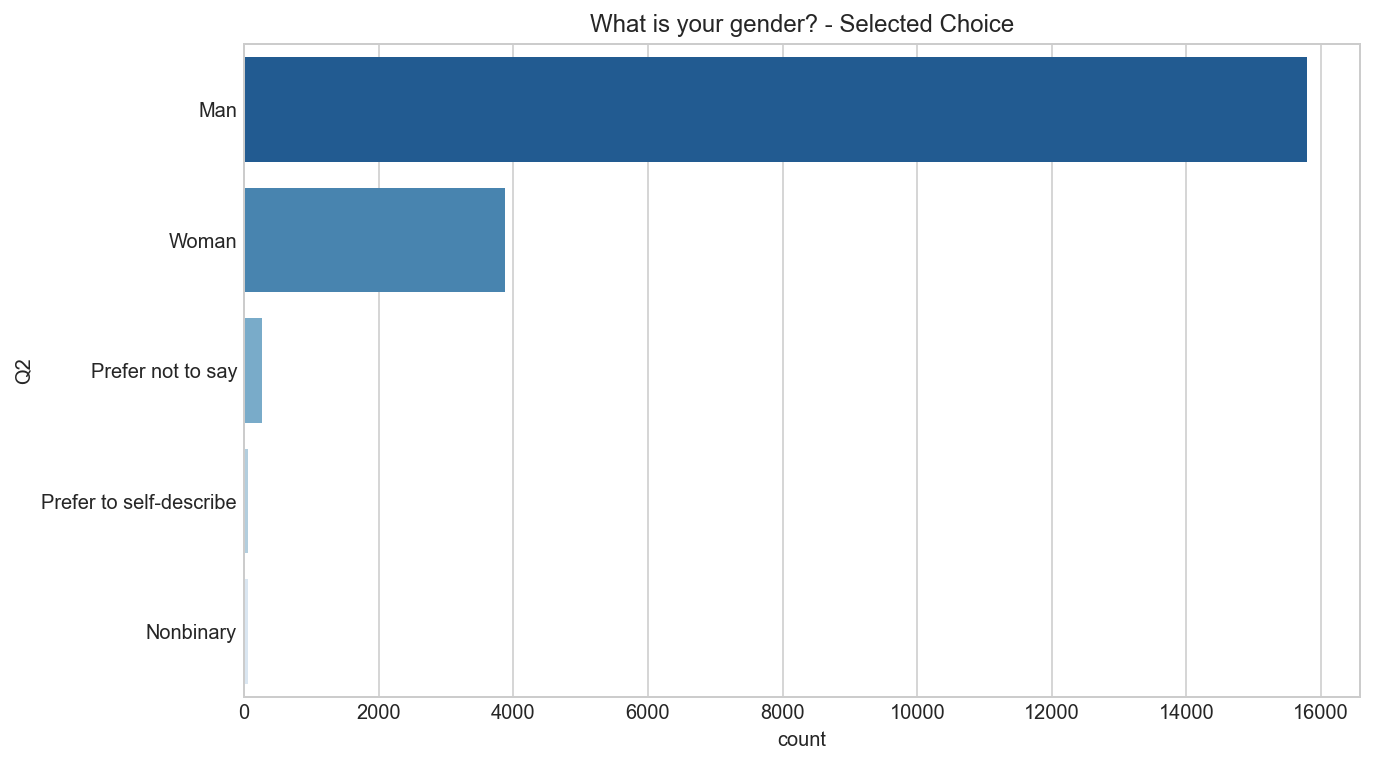

In [324]:
show_plot_by_qno("Q2")

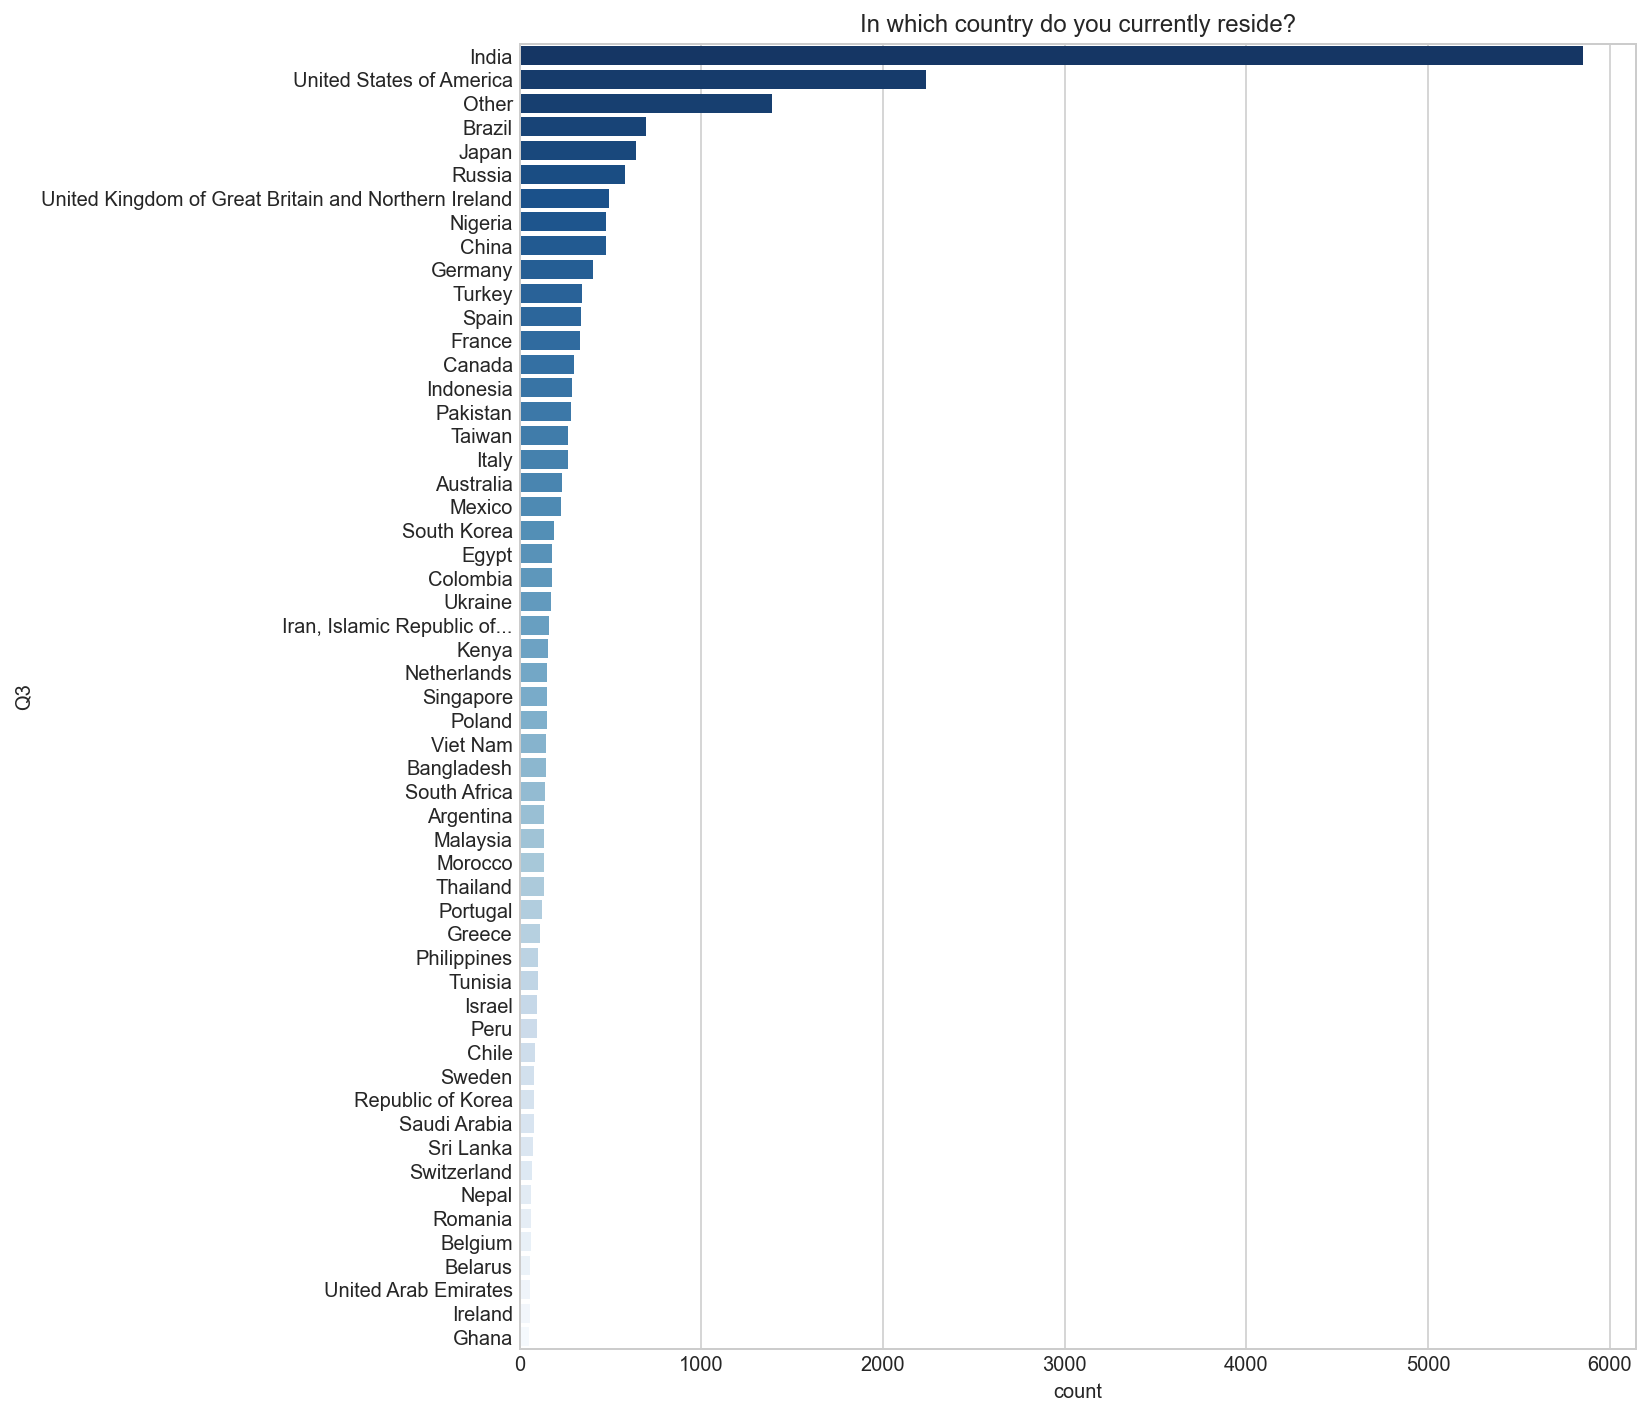

In [327]:
show_plot_by_qno("Q3",fsize = (10,12))

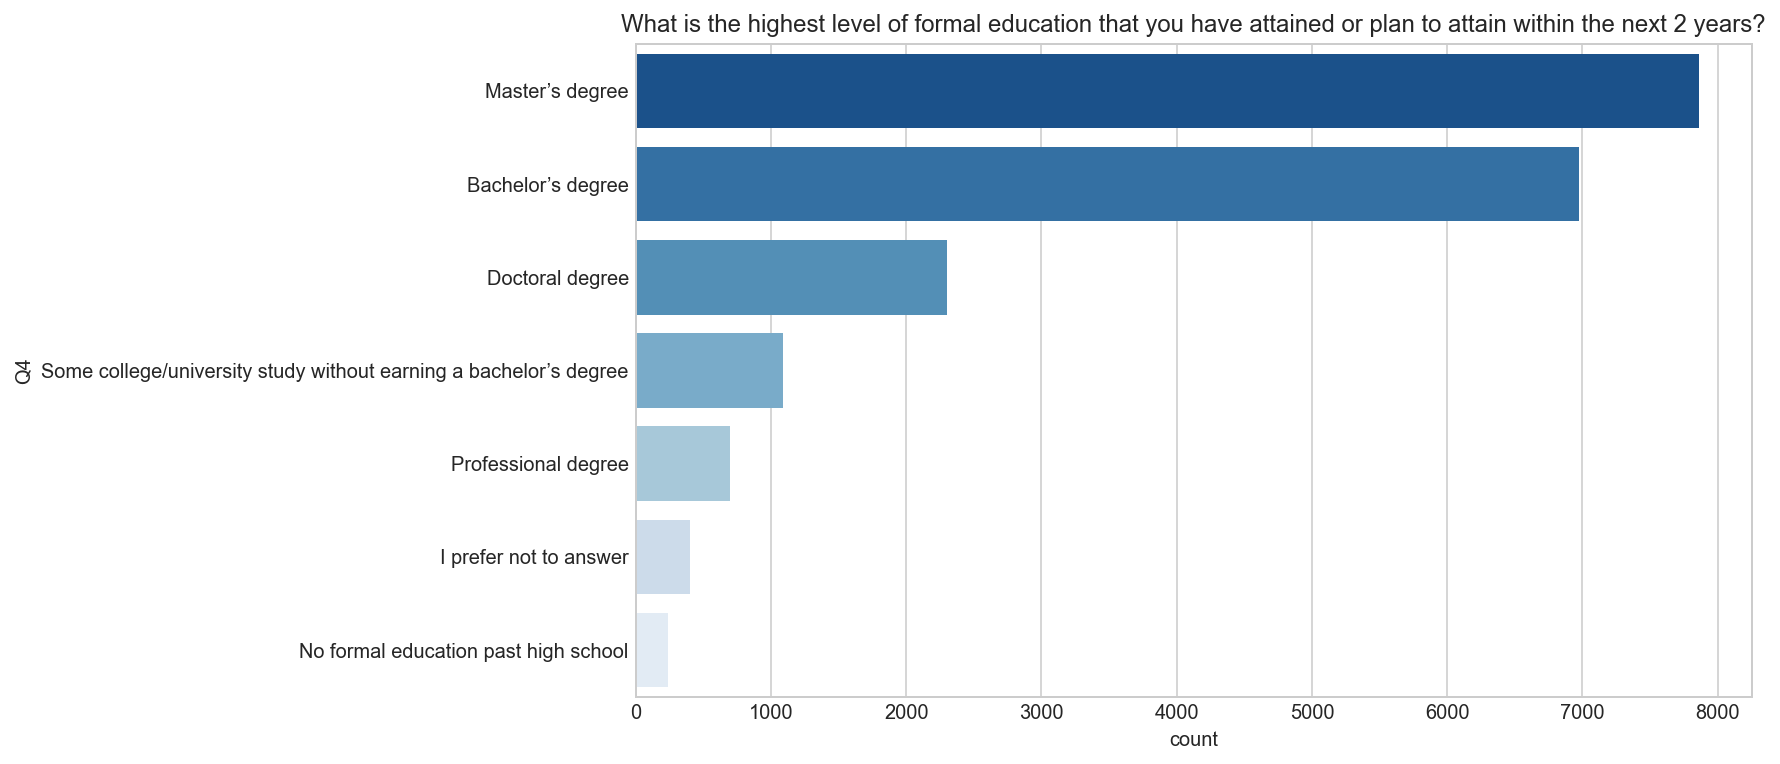

In [328]:
show_plot_by_qno("Q4")

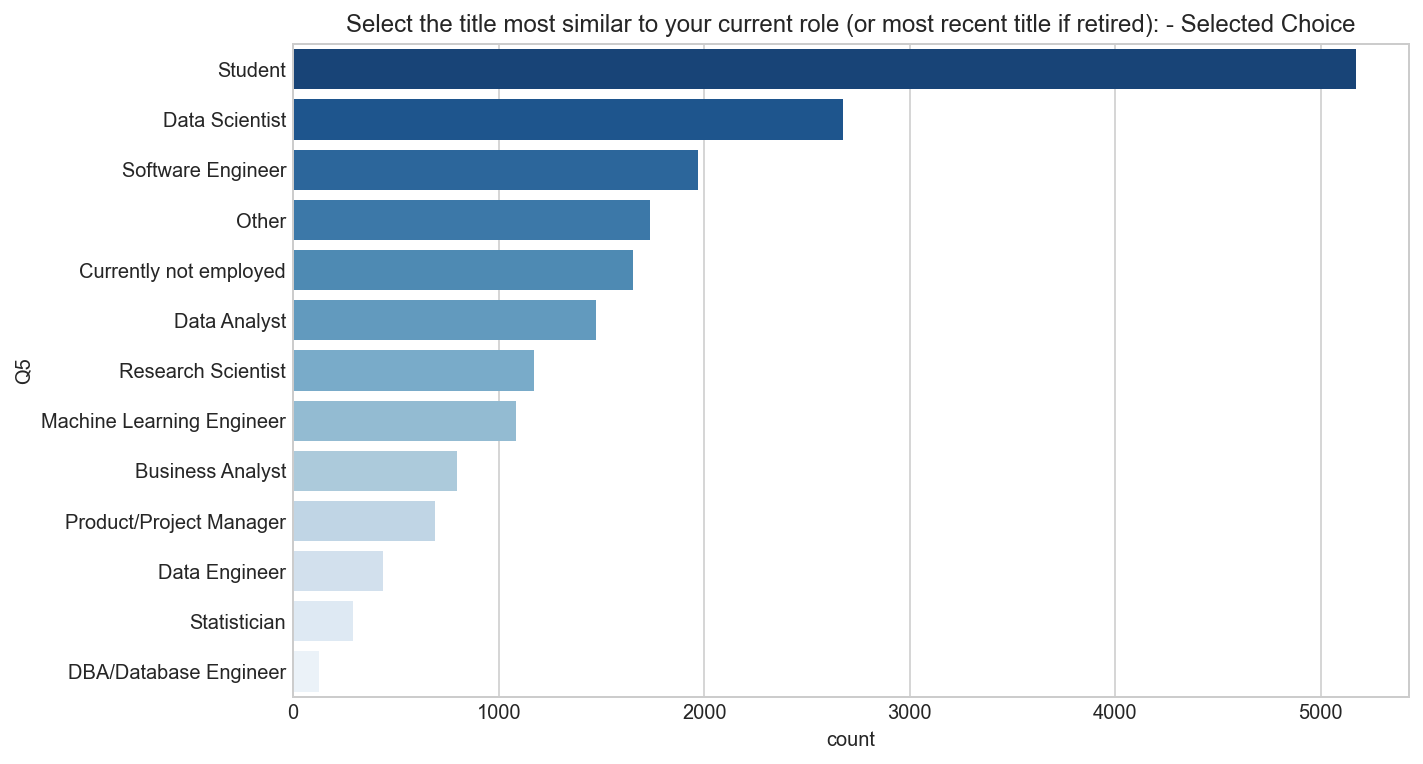

In [329]:
show_plot_by_qno("Q5")

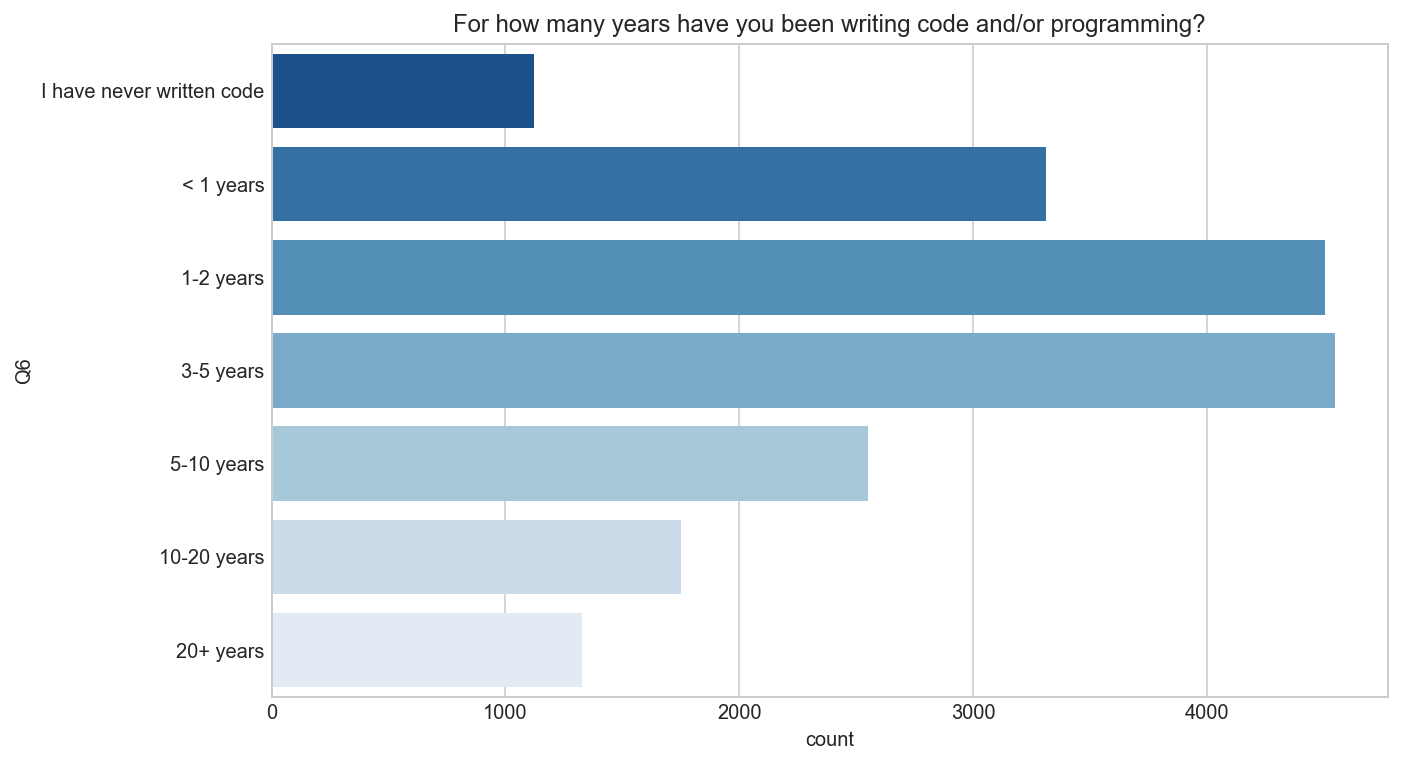

In [335]:
# answer["Q6"].value_counts().index
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years', ]
show_plot_by_qno("Q6", order=q6_cols)

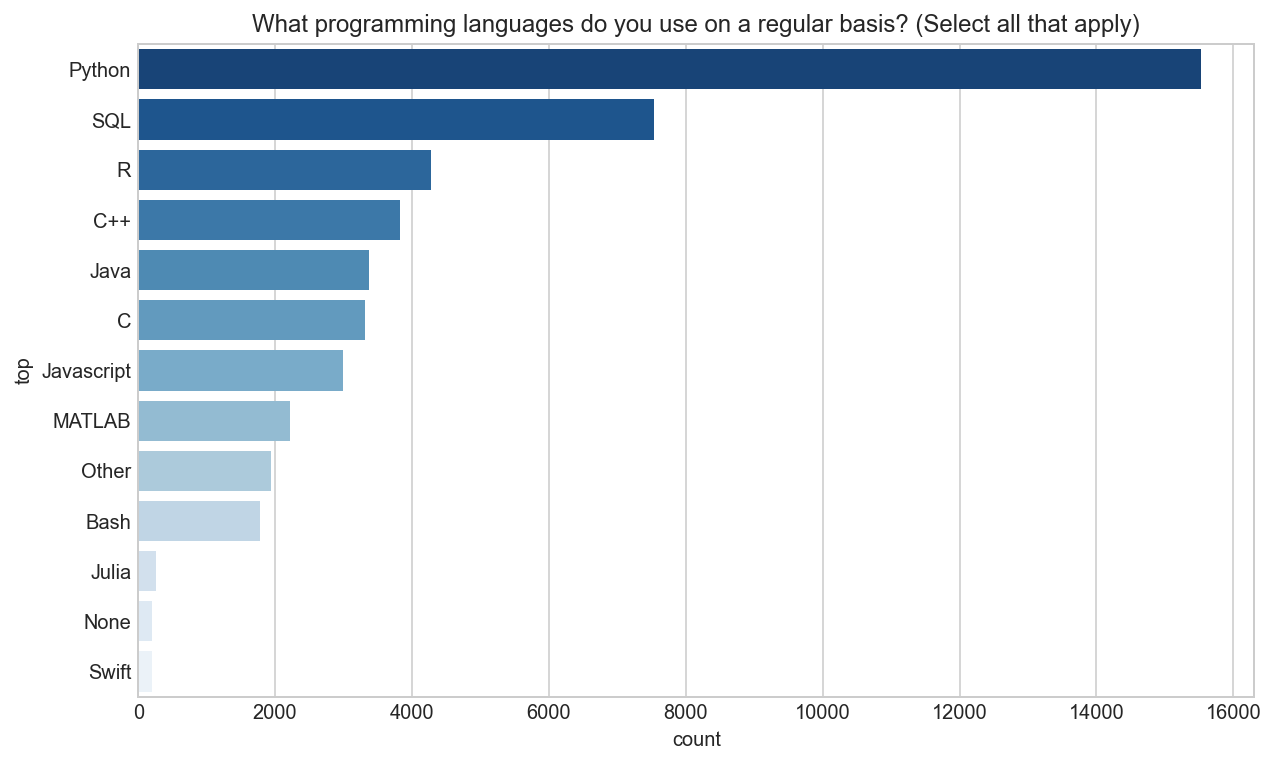

In [336]:
show_plot_by_qno("Q7")

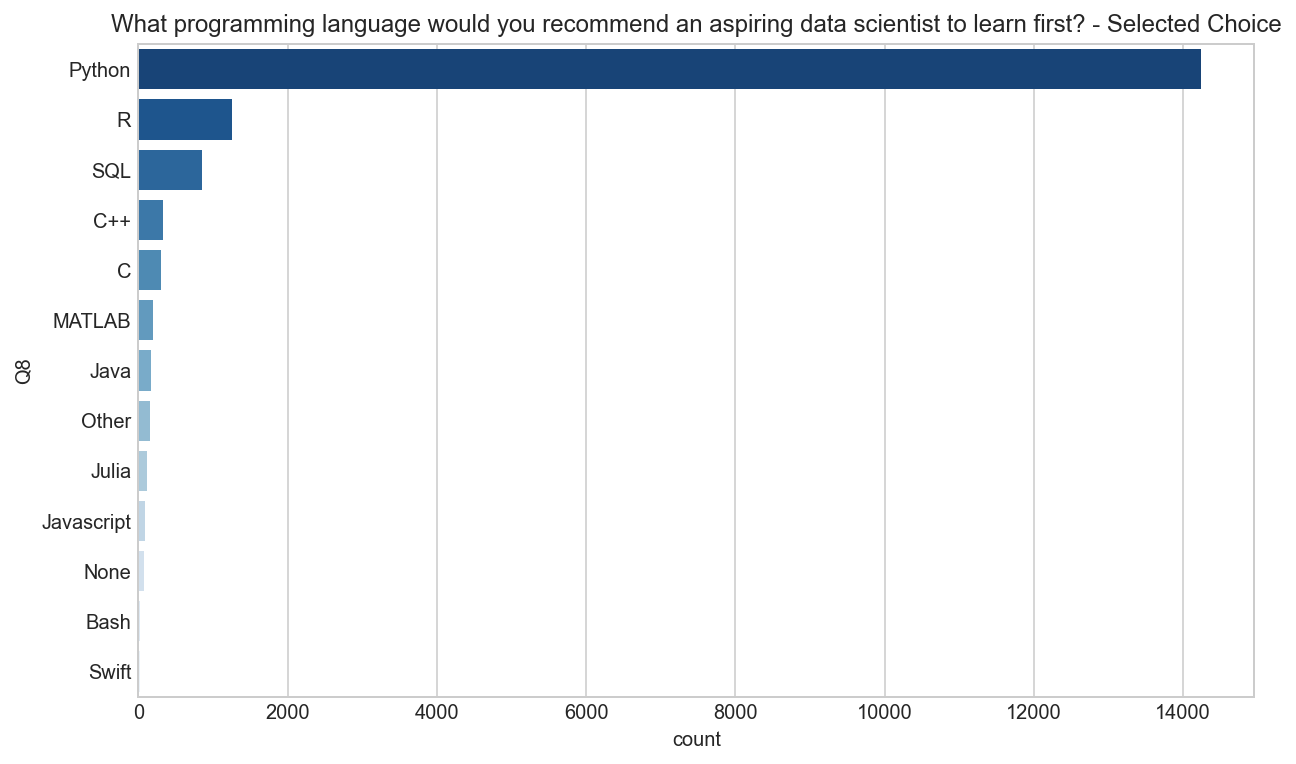

In [337]:
show_plot_by_qno("Q8")

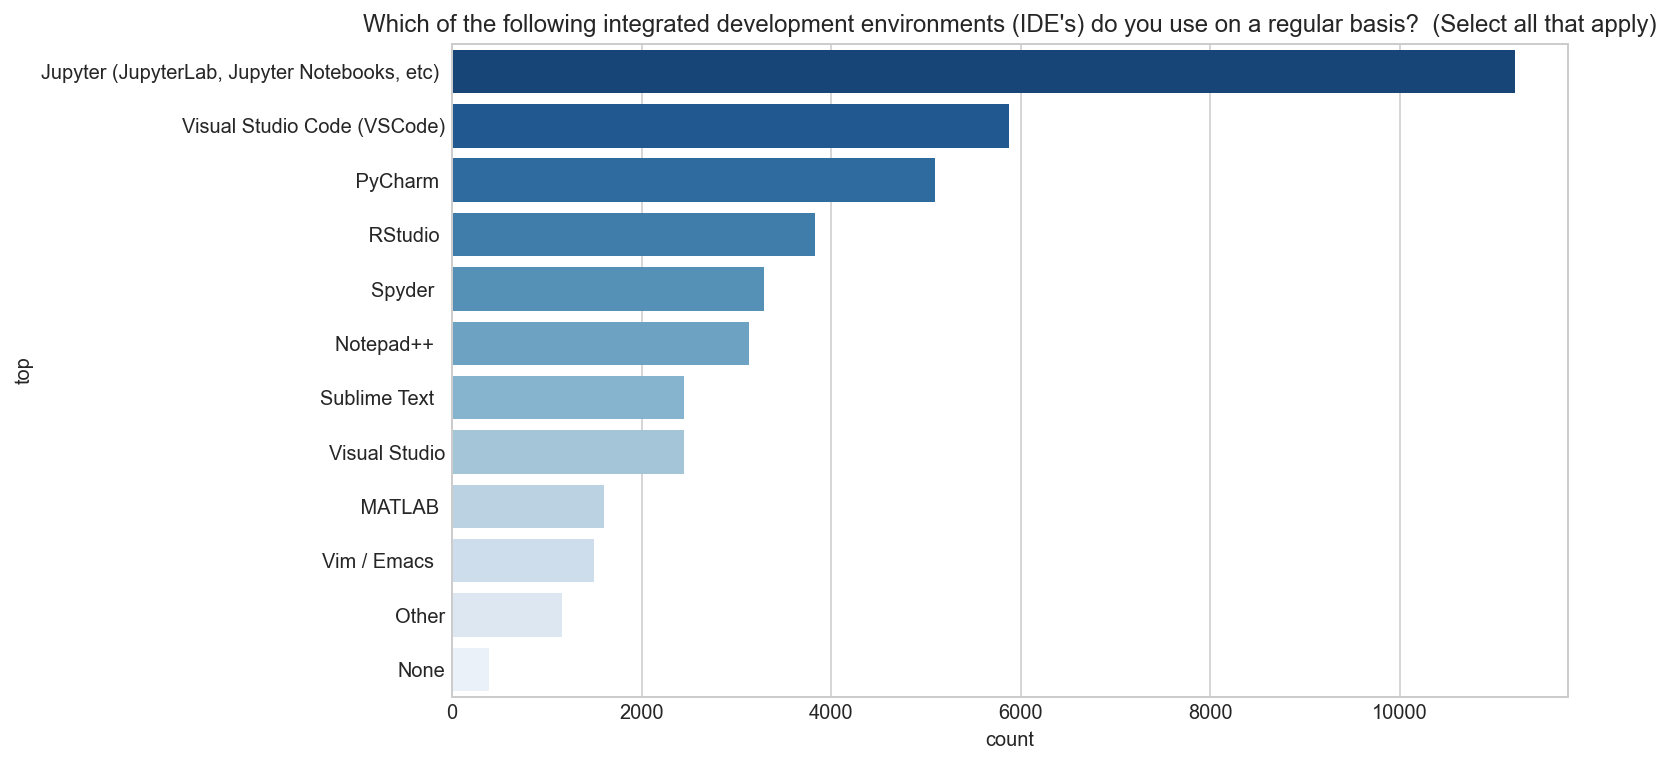

In [338]:
show_plot_by_qno("Q9")

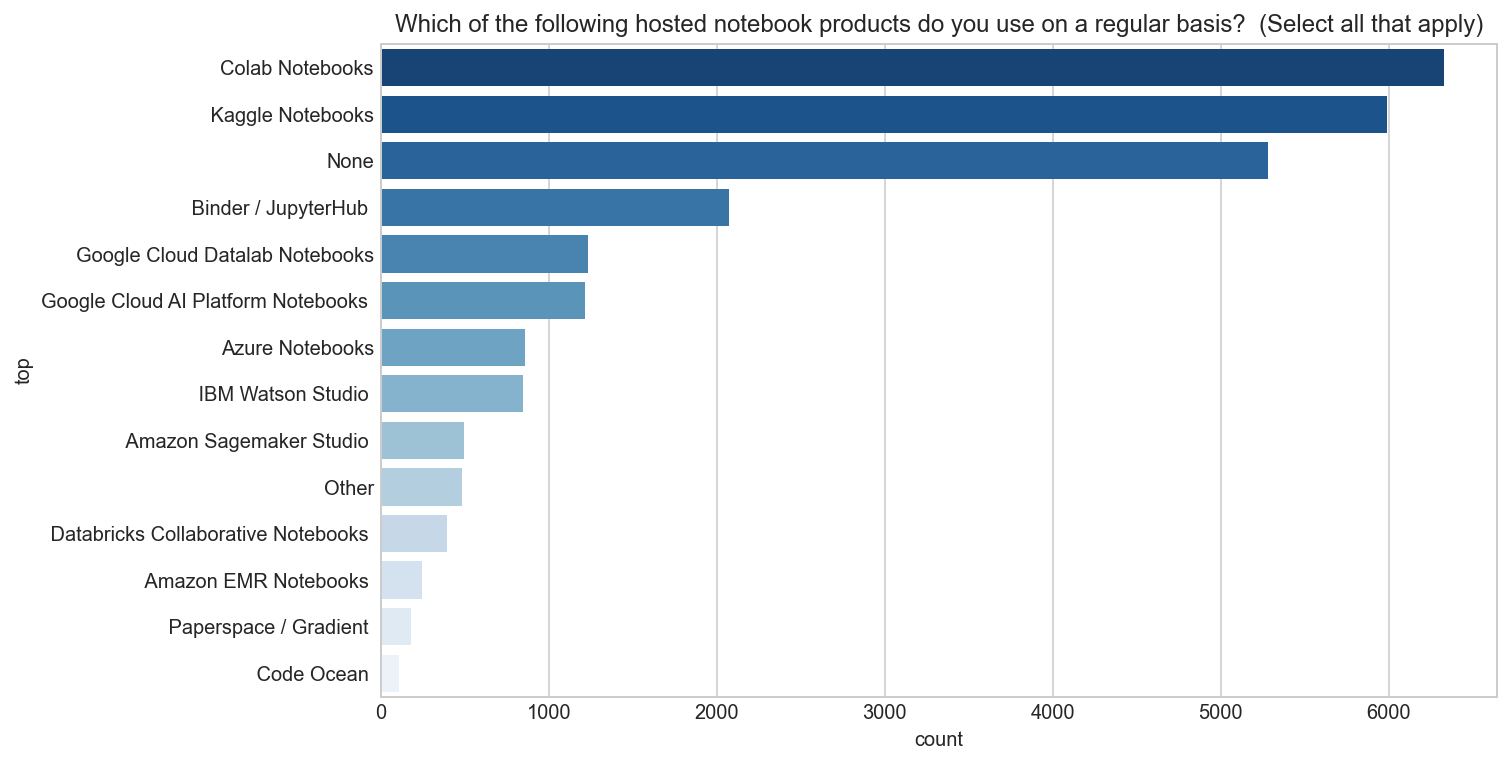

In [339]:
show_plot_by_qno("Q10")

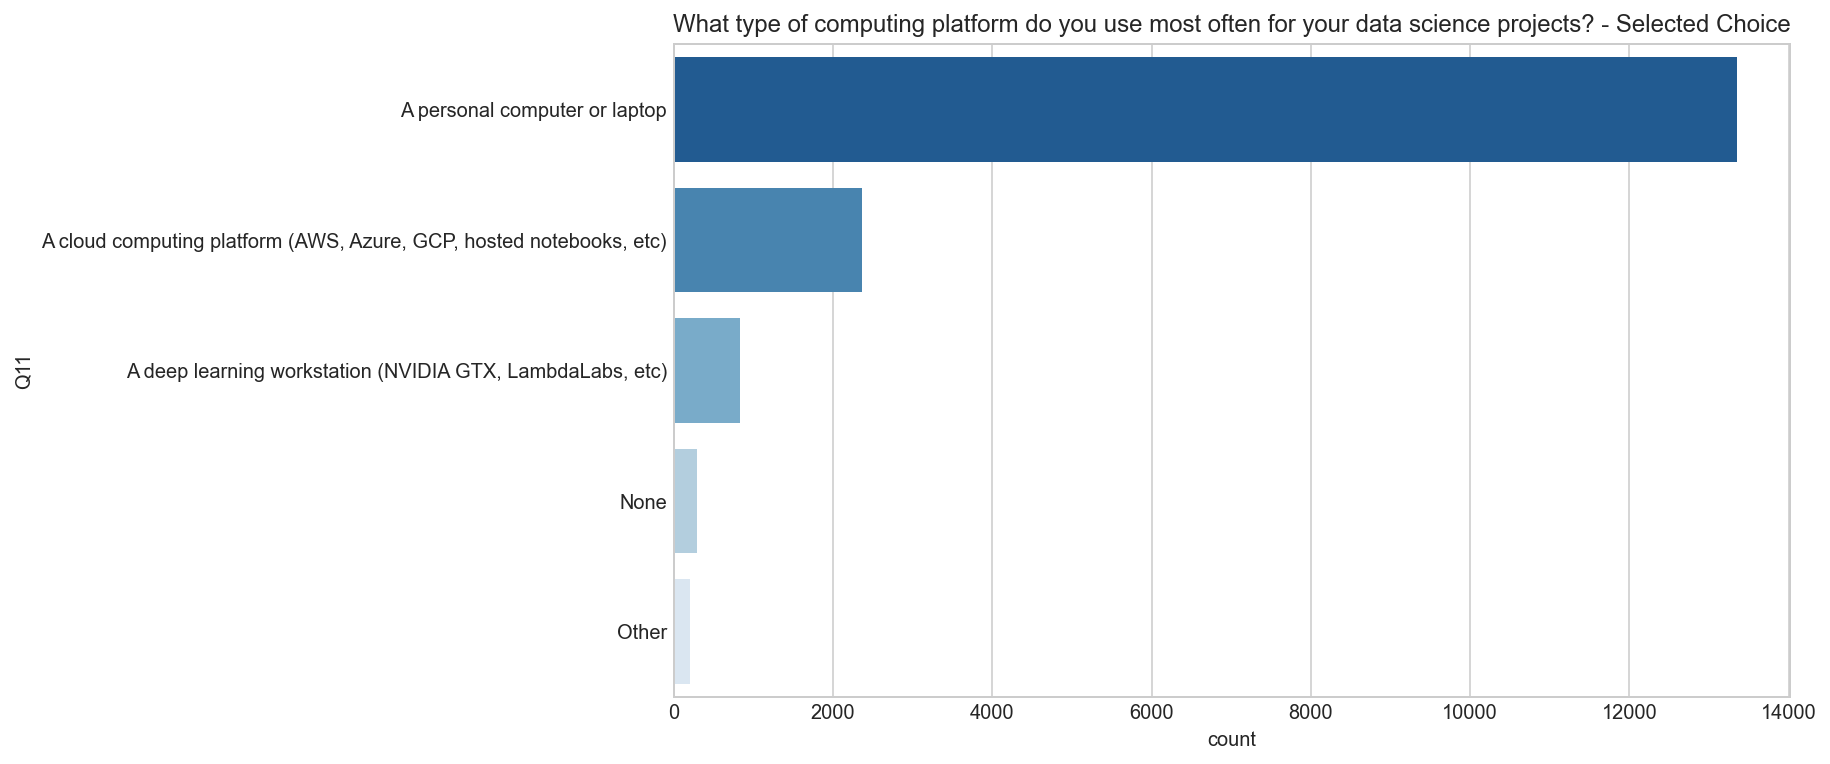

In [340]:
show_plot_by_qno("Q11")

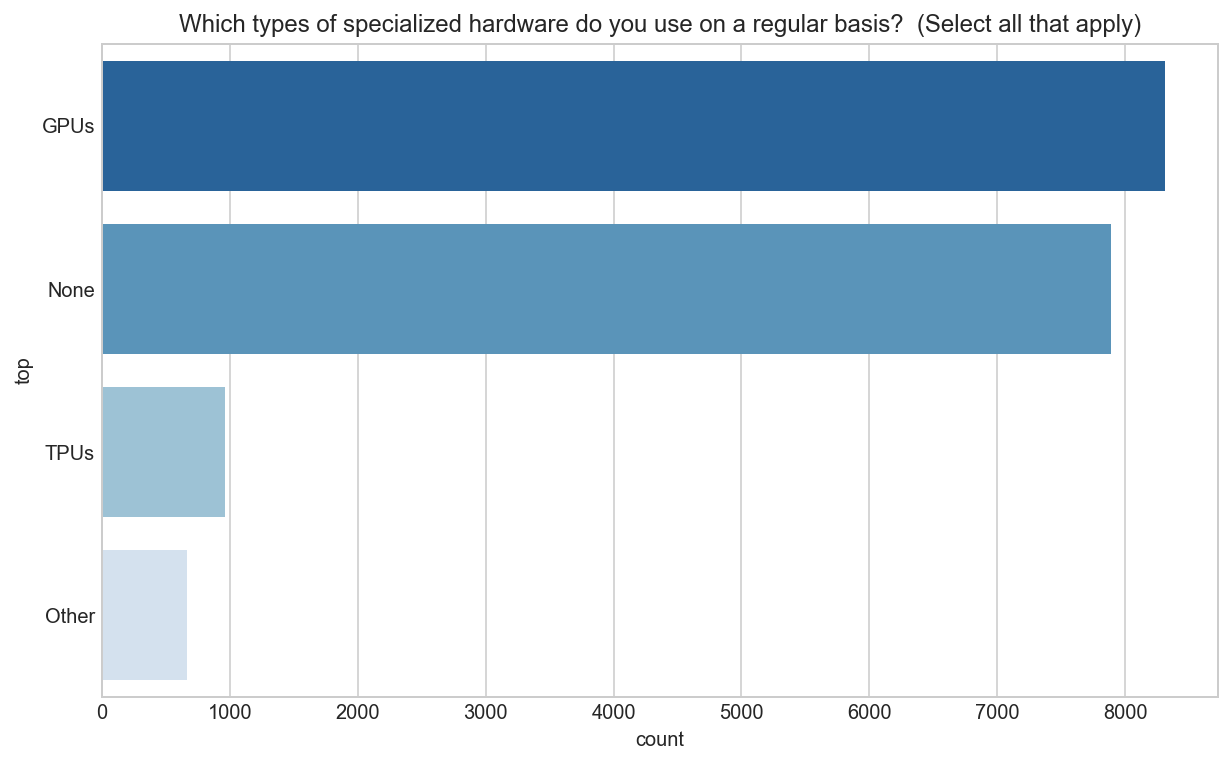

In [341]:
show_plot_by_qno("Q12")

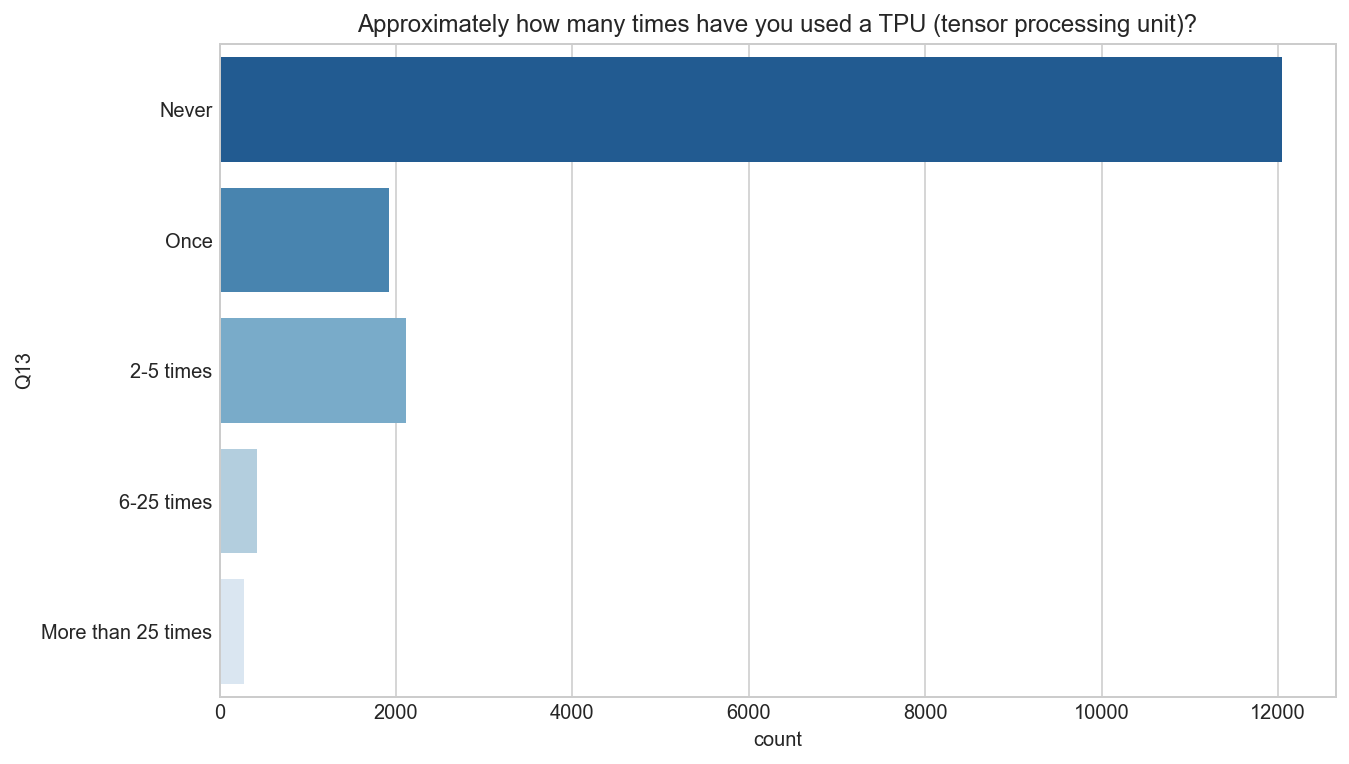

In [348]:
#answer["Q13"].value_counts().index
q13_cols = ['Never', 'Once', '2-5 times', '6-25 times', 'More than 25 times']
show_plot_by_qno("Q13",order = q13_cols)

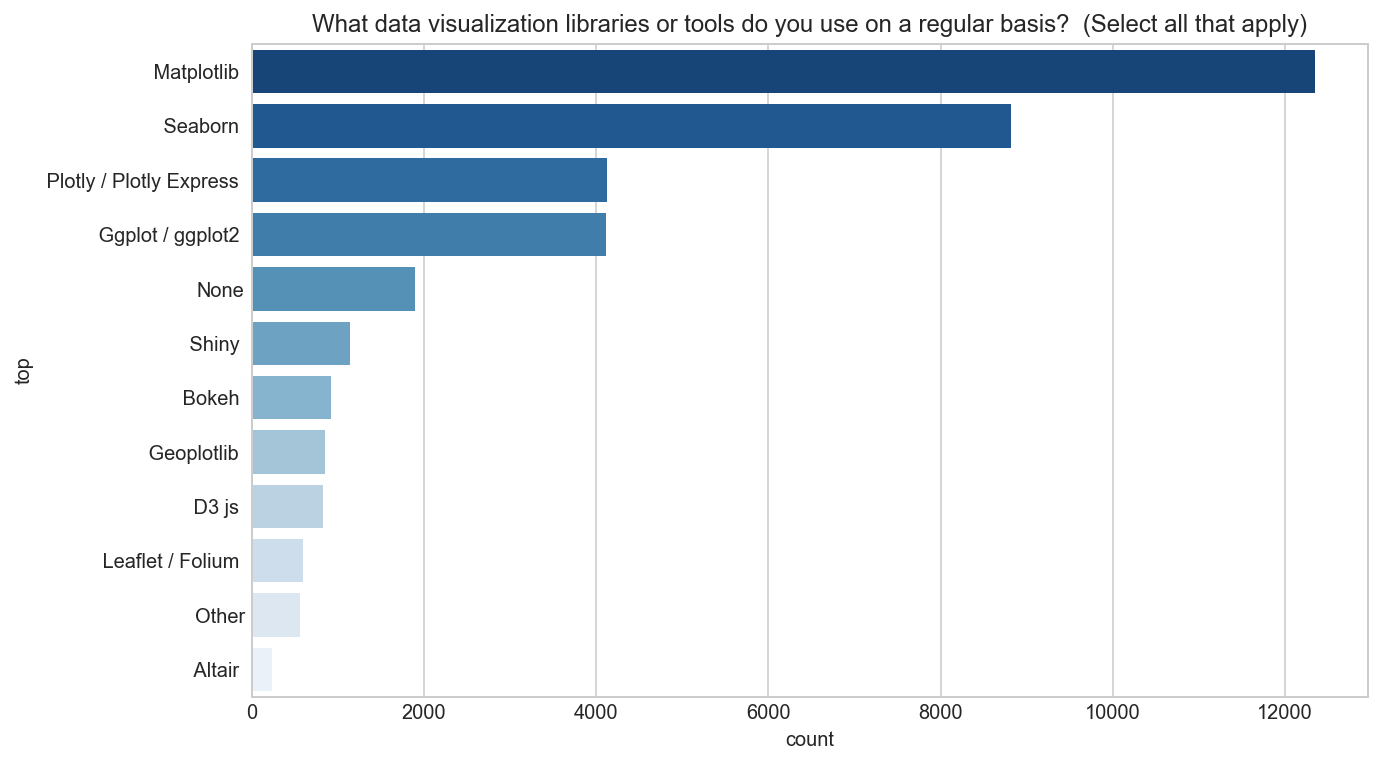

In [349]:
show_plot_by_qno("Q14")

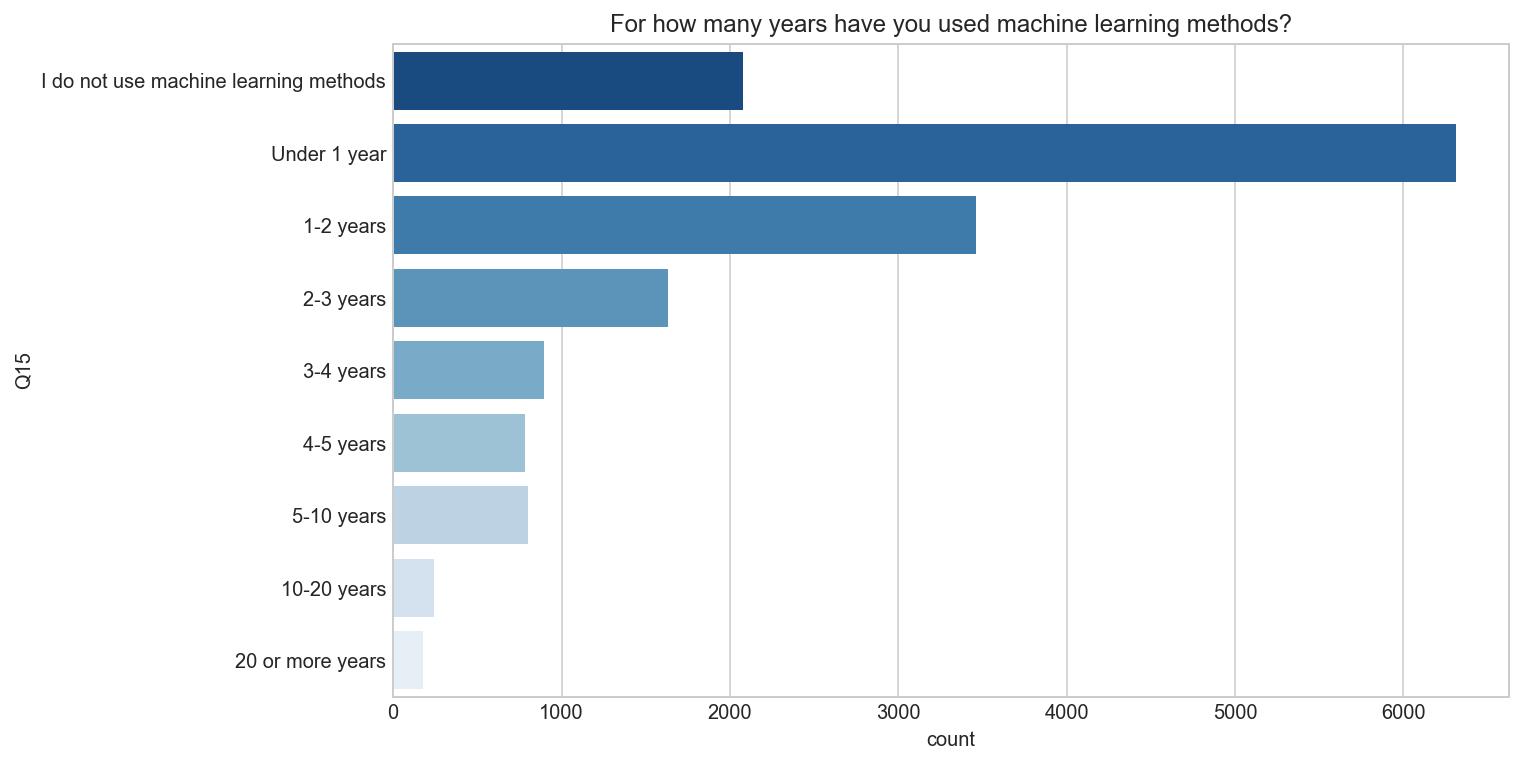

In [353]:
#answer["Q15"].value_counts().index
q15_cols = ['I do not use machine learning methods','Under 1 year', '1-2 years',
       '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years',
       '20 or more years']
show_plot_by_qno("Q15",order = q15_cols)

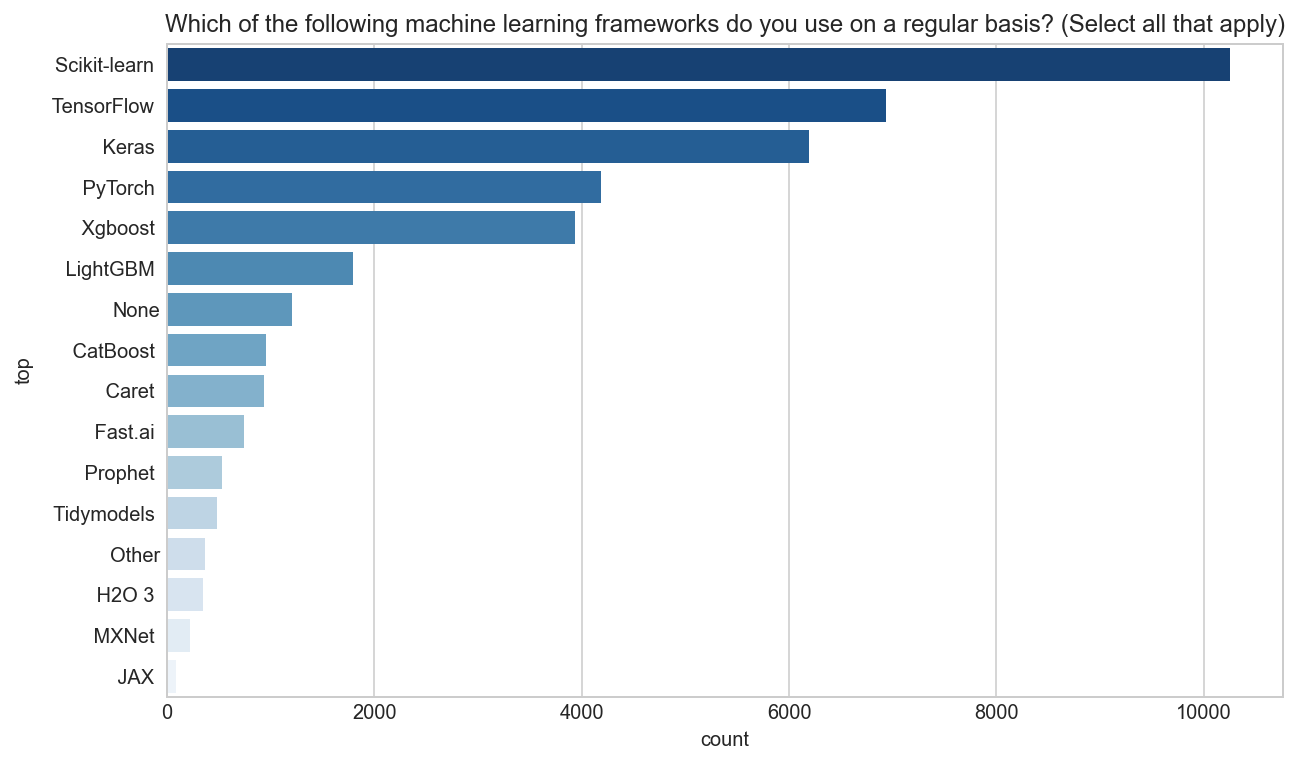

In [354]:
show_plot_by_qno("Q16")

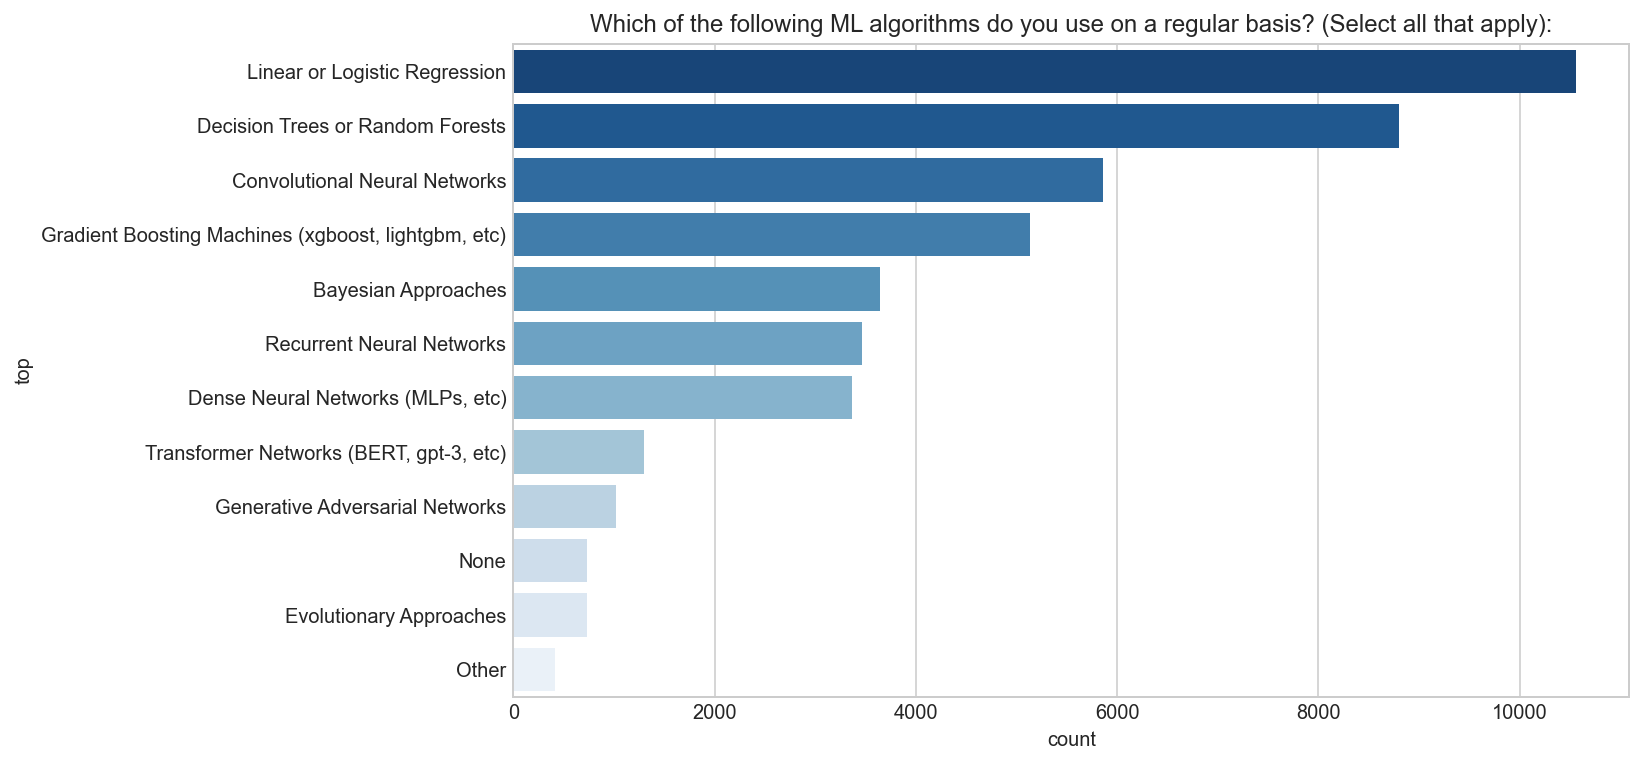

In [355]:
show_plot_by_qno("Q17")

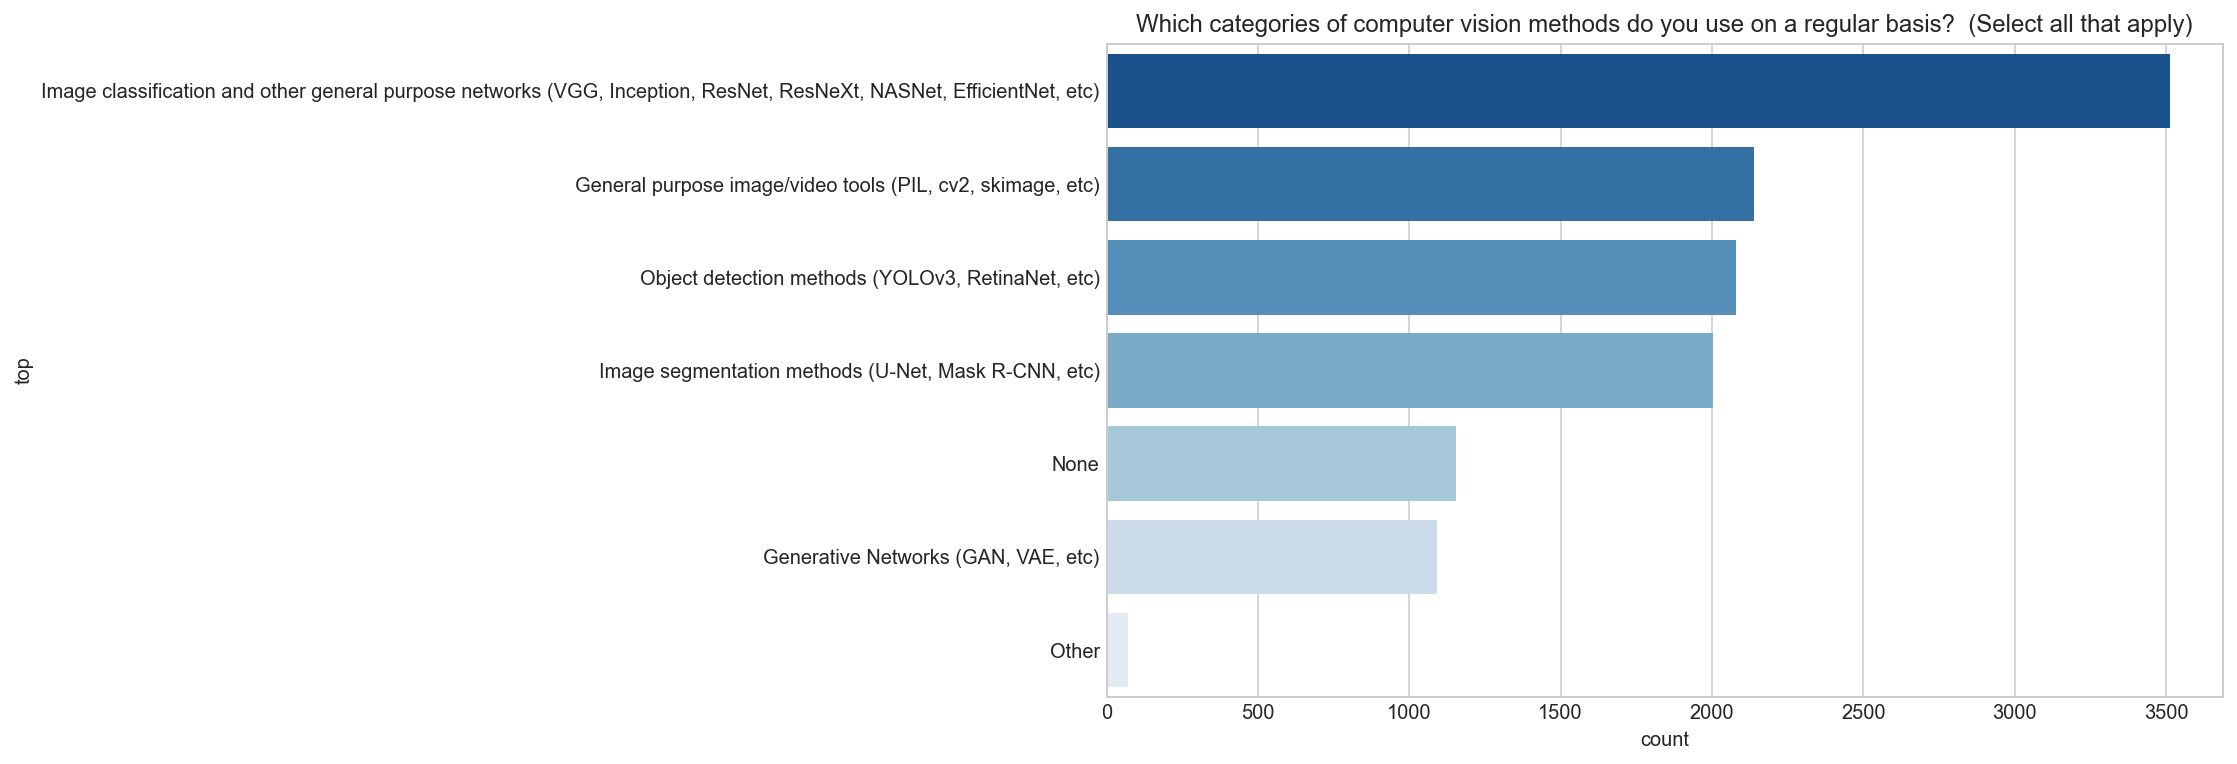

In [356]:
show_plot_by_qno("Q18")

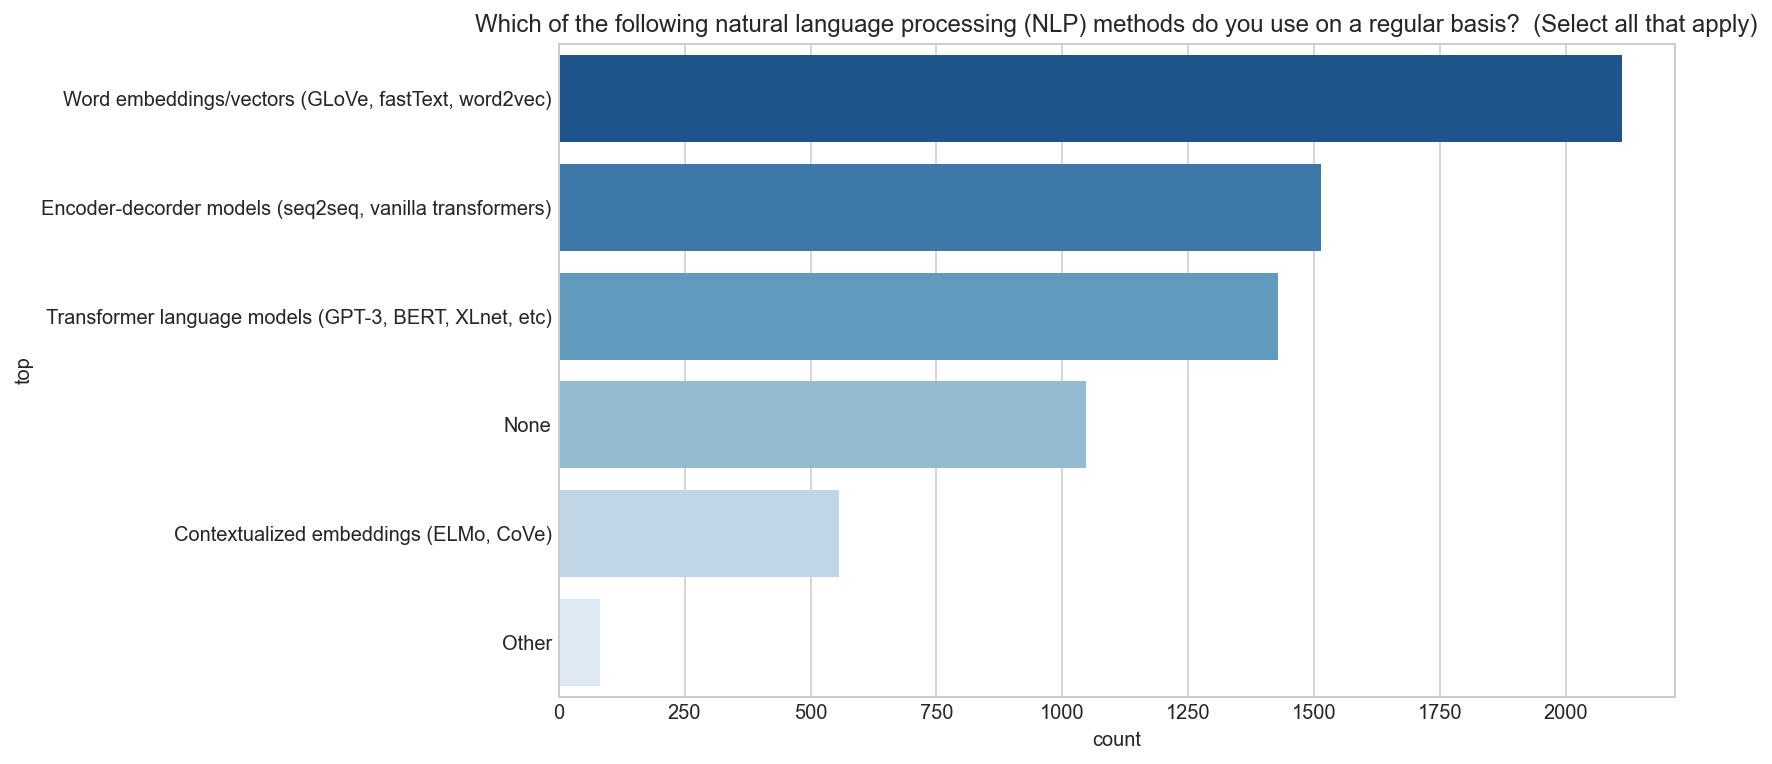

In [357]:
show_plot_by_qno("Q19")

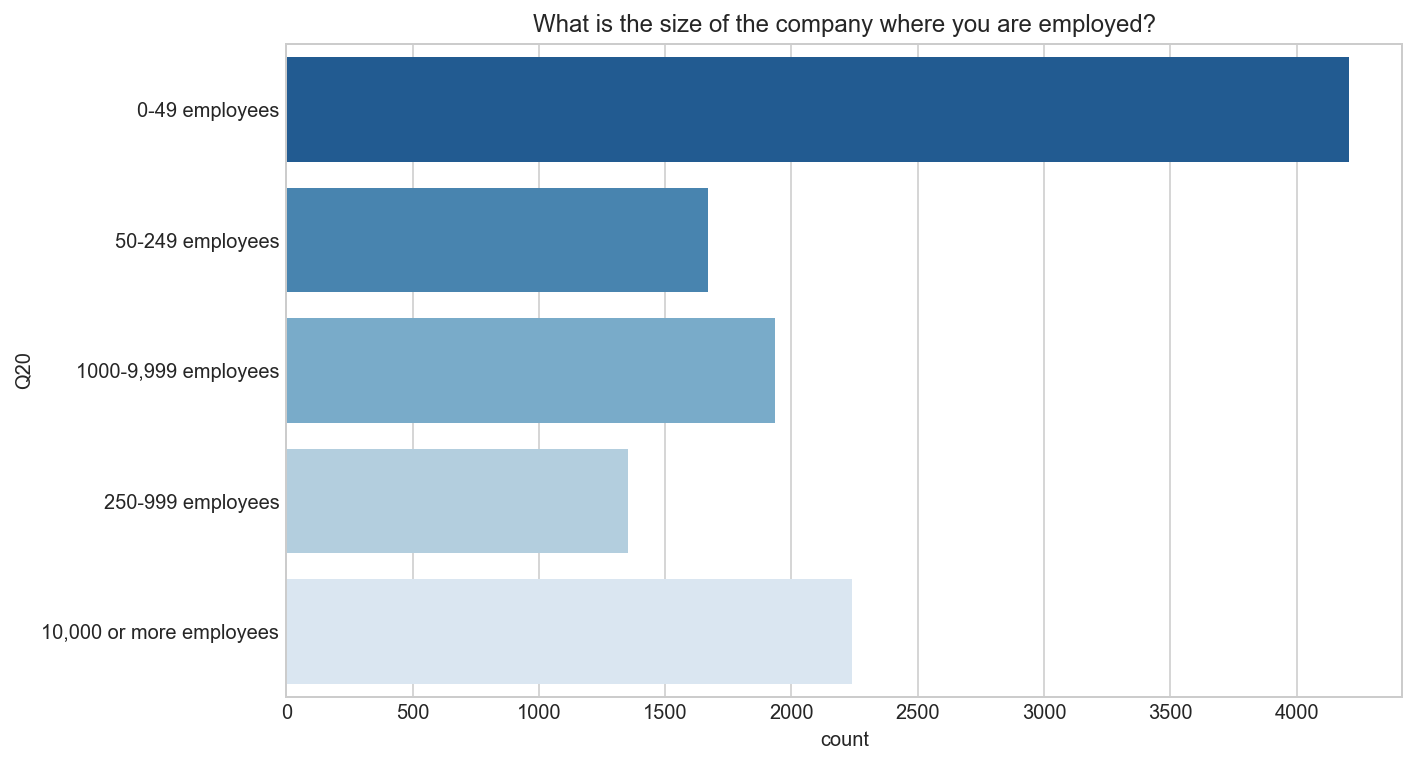

In [369]:
#answer["Q20"].value_counts().index
q20_cols = ['0-49 employees','50-249 employees', '1000-9,999 employees',
       '250-999 employees', '10,000 or more employees',]
show_plot_by_qno("Q20", order = q20_cols)

Index(['0', '1-2', '10-14', '15-19', '20+', '3-4', '5-9'], dtype='object')

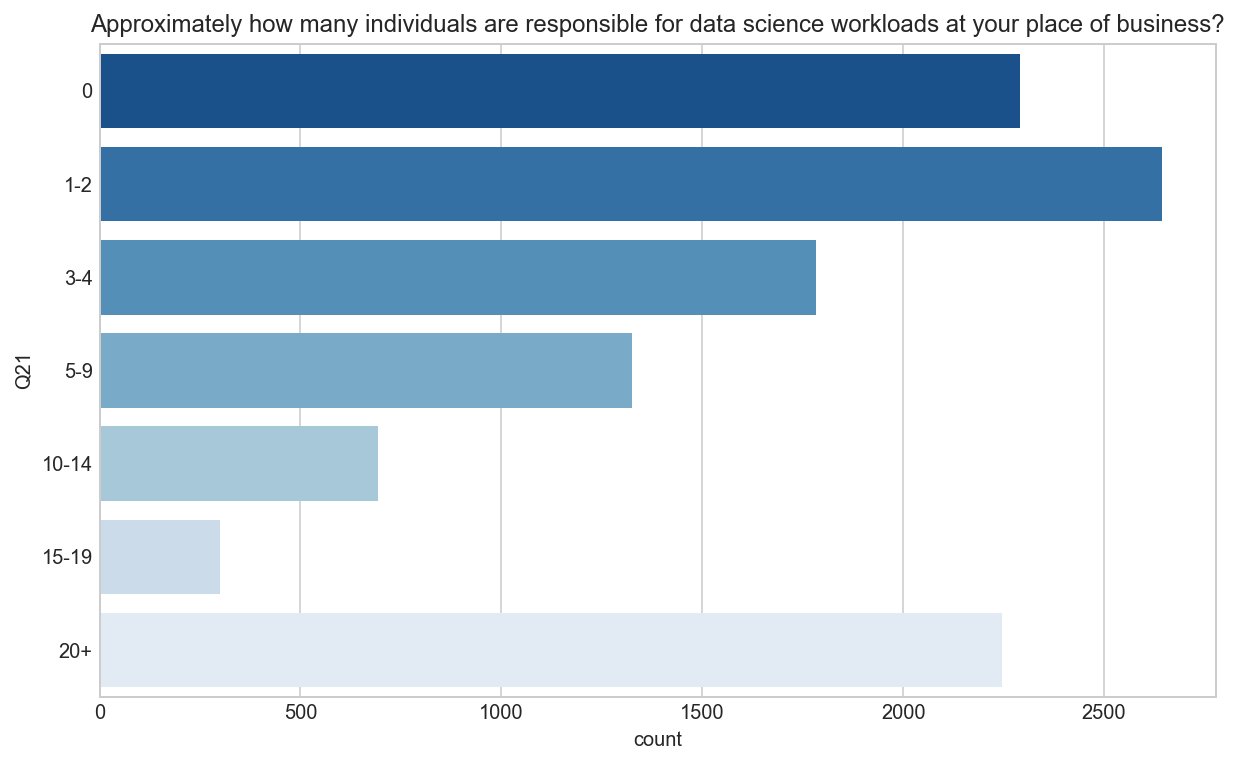

In [375]:
#answer["Q21"].value_counts().sort_index().index
q21_cols = ['0', '1-2','3-4', '5-9', '10-14', '15-19', '20+']
show_plot_by_qno("Q21", order = q21_cols)

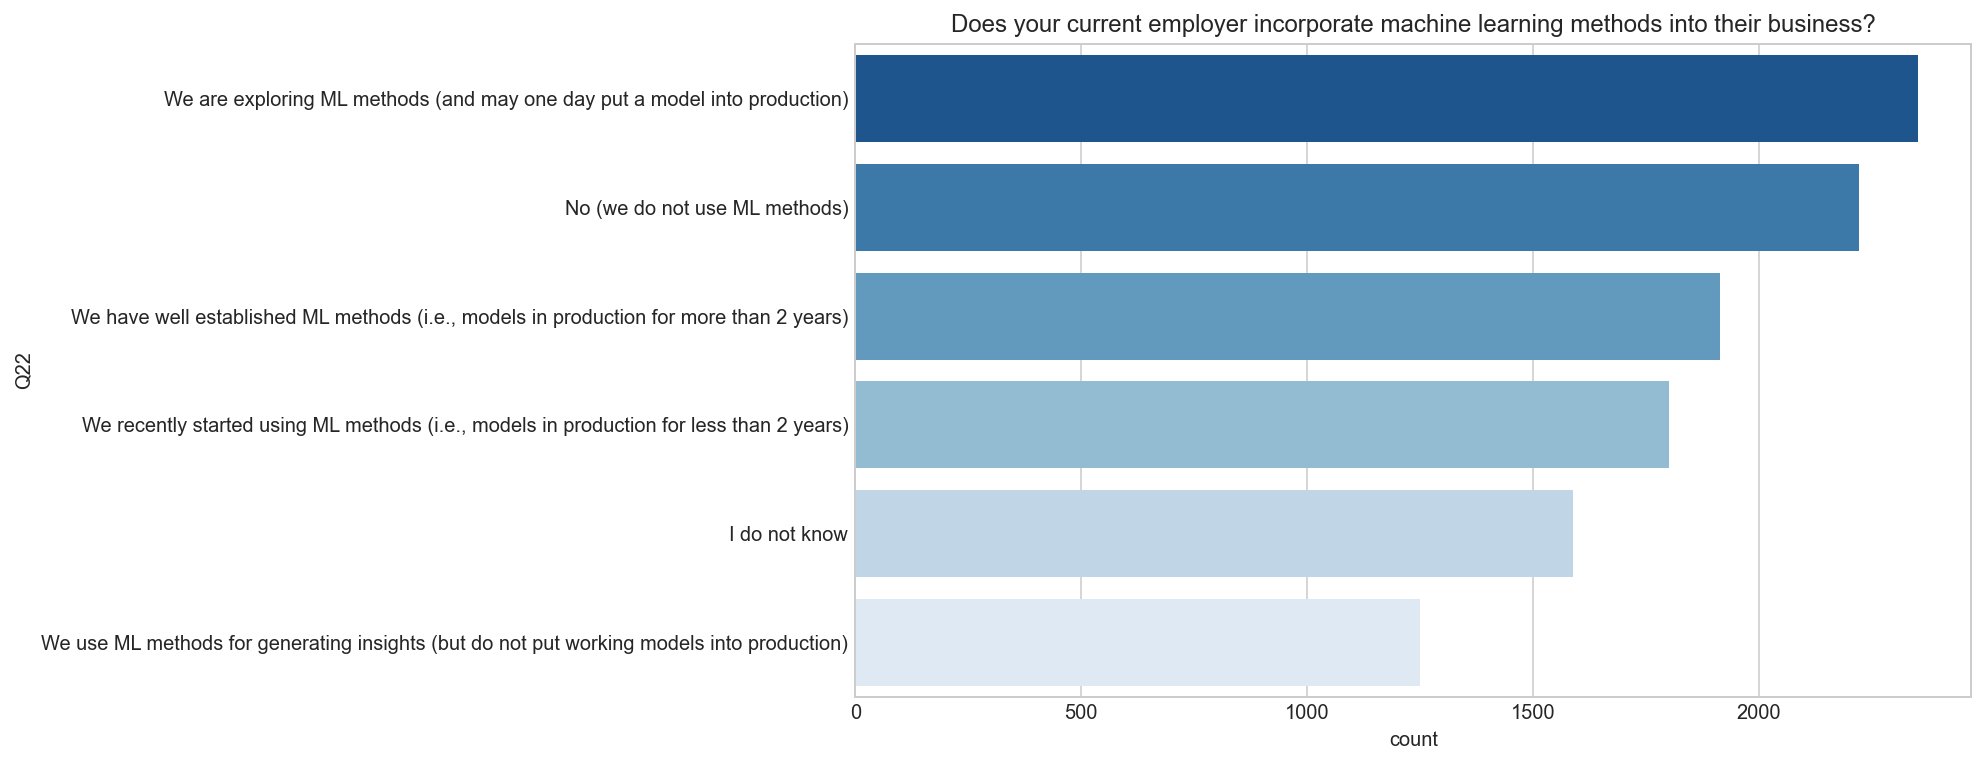

In [376]:
show_plot_by_qno("Q22")

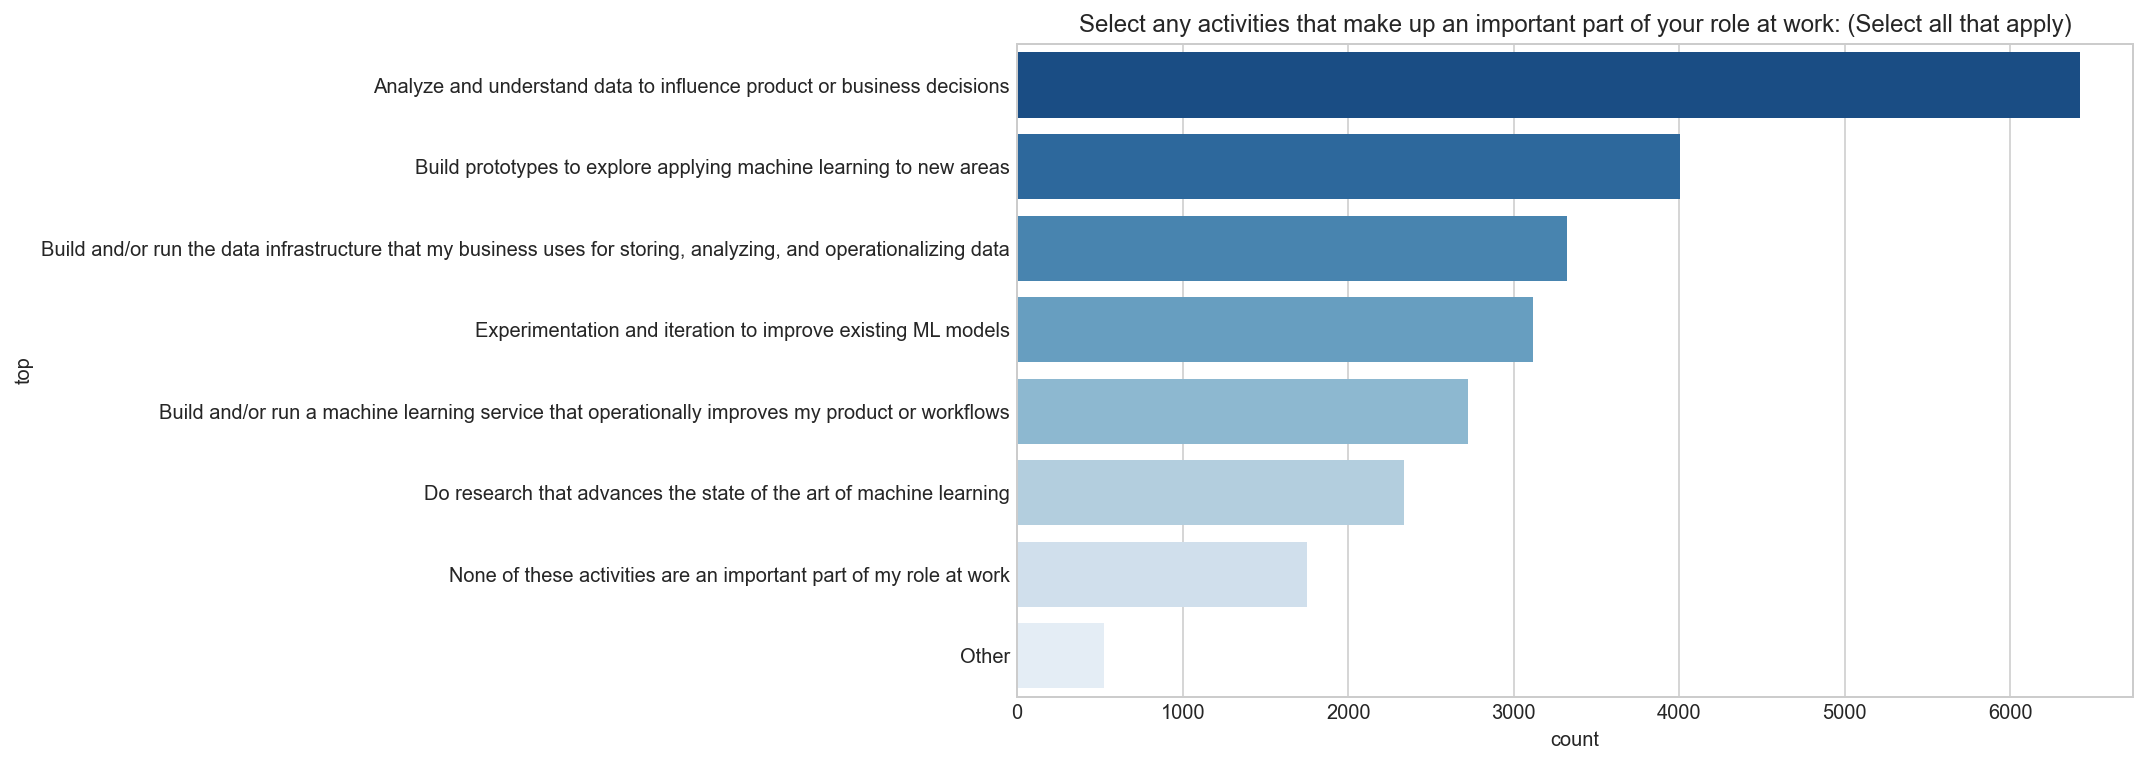

In [377]:
show_plot_by_qno("Q23")

In [439]:
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range","count"]
q24_count["min"] = q24_count["range"].str.split("-",expand = True)[0]
q24_count["max"] = q24_count["range"].str.split("-",expand = True)[1]
q24_count["min"] = q24_count["min"].str.replace(",|>|\$","").astype(int)
q24_cols = q24_count.sort_values("min").range.tolist()
q24_cols

['$0-999',
 '1,000-1,999',
 '2,000-2,999',
 '3,000-3,999',
 '4,000-4,999',
 '5,000-7,499',
 '7,500-9,999',
 '10,000-14,999',
 '15,000-19,999',
 '20,000-24,999',
 '25,000-29,999',
 '30,000-39,999',
 '40,000-49,999',
 '50,000-59,999',
 '60,000-69,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999',
 '100,000-124,999',
 '125,000-149,999',
 '150,000-199,999',
 '200,000-249,999',
 '250,000-299,999',
 '300,000-500,000',
 '> $500,000']

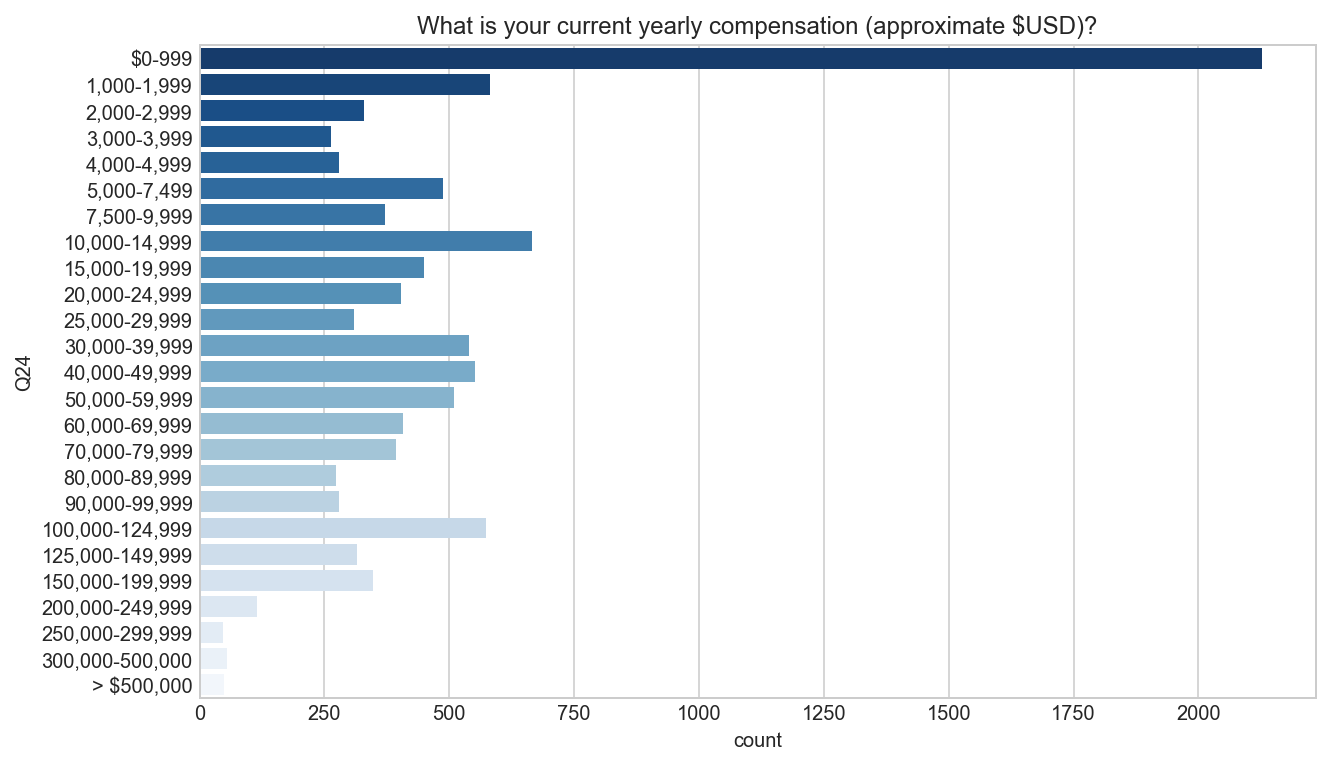

In [440]:
show_plot_by_qno("Q24", order = q24_cols)

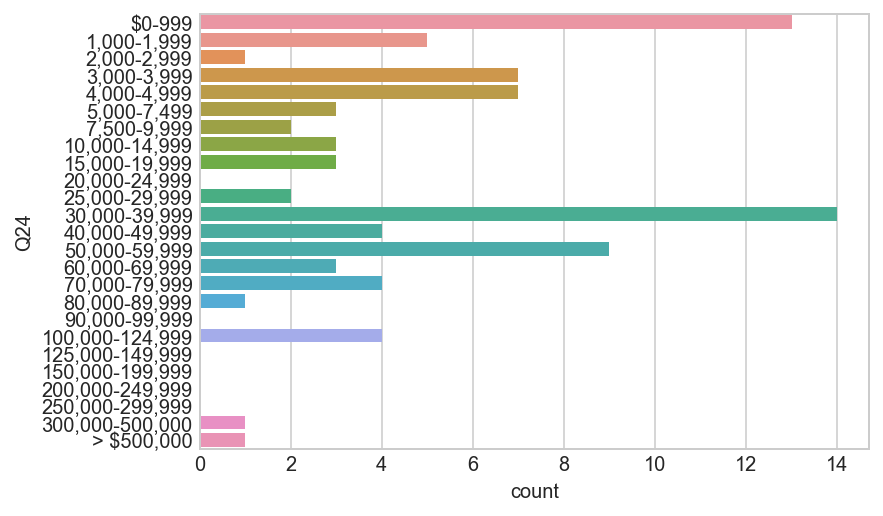

In [451]:
q3_KR = answer[answer["Q3"].isin(["South Korea"])]
sns.countplot(data = q3_KR, y = "Q24", order = q24_cols)

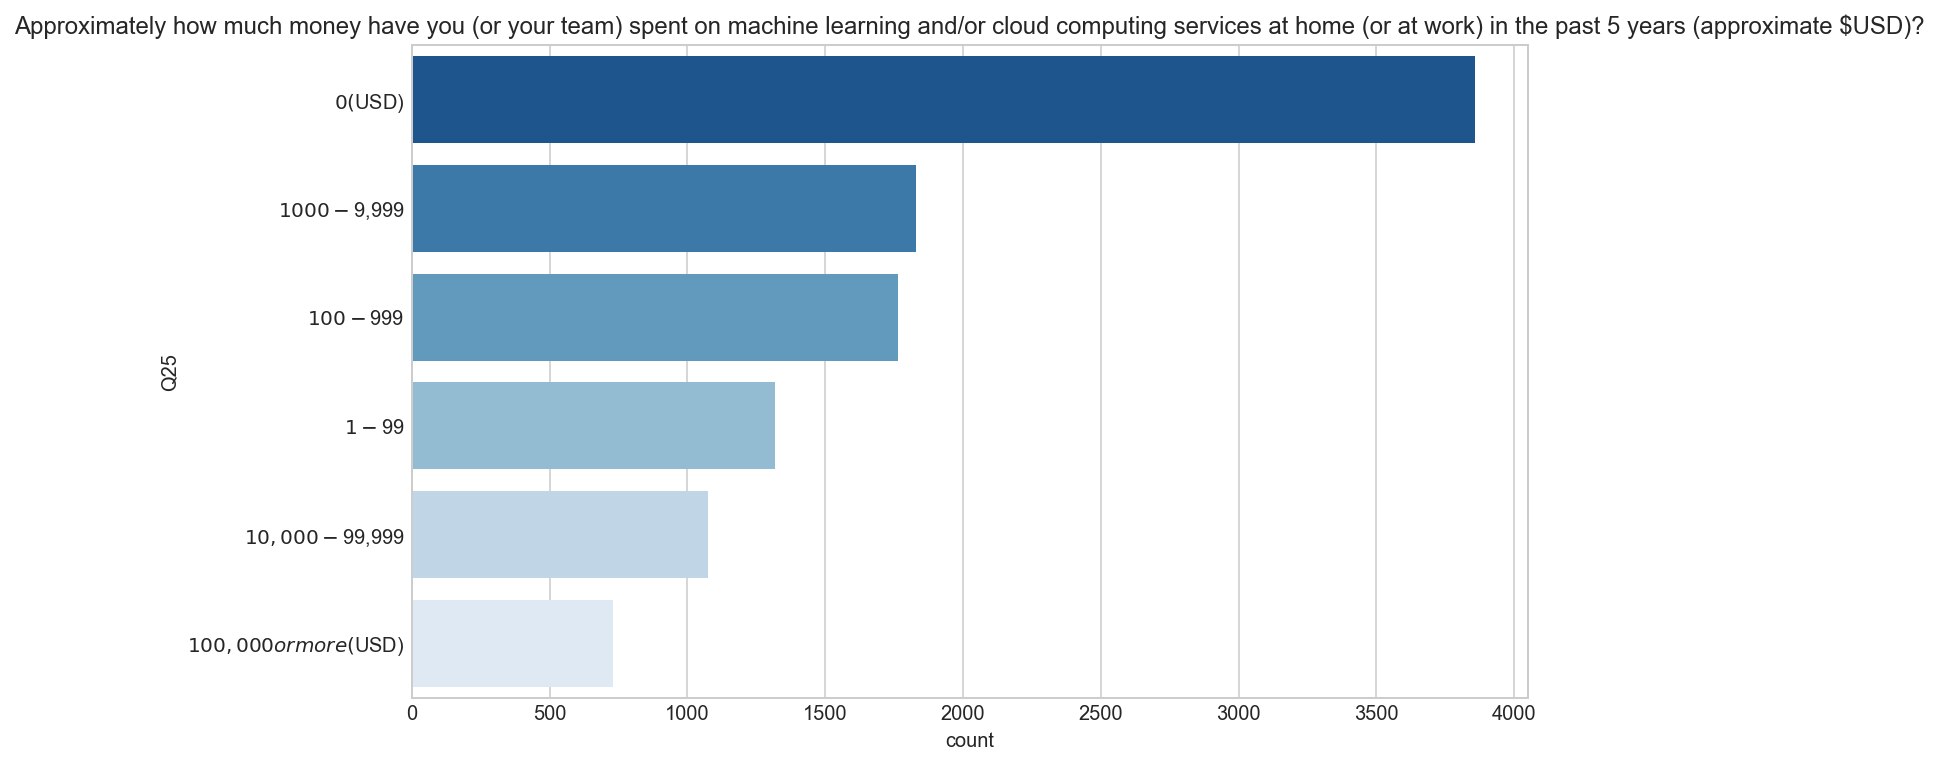

In [481]:
show_plot_by_qno("Q25")

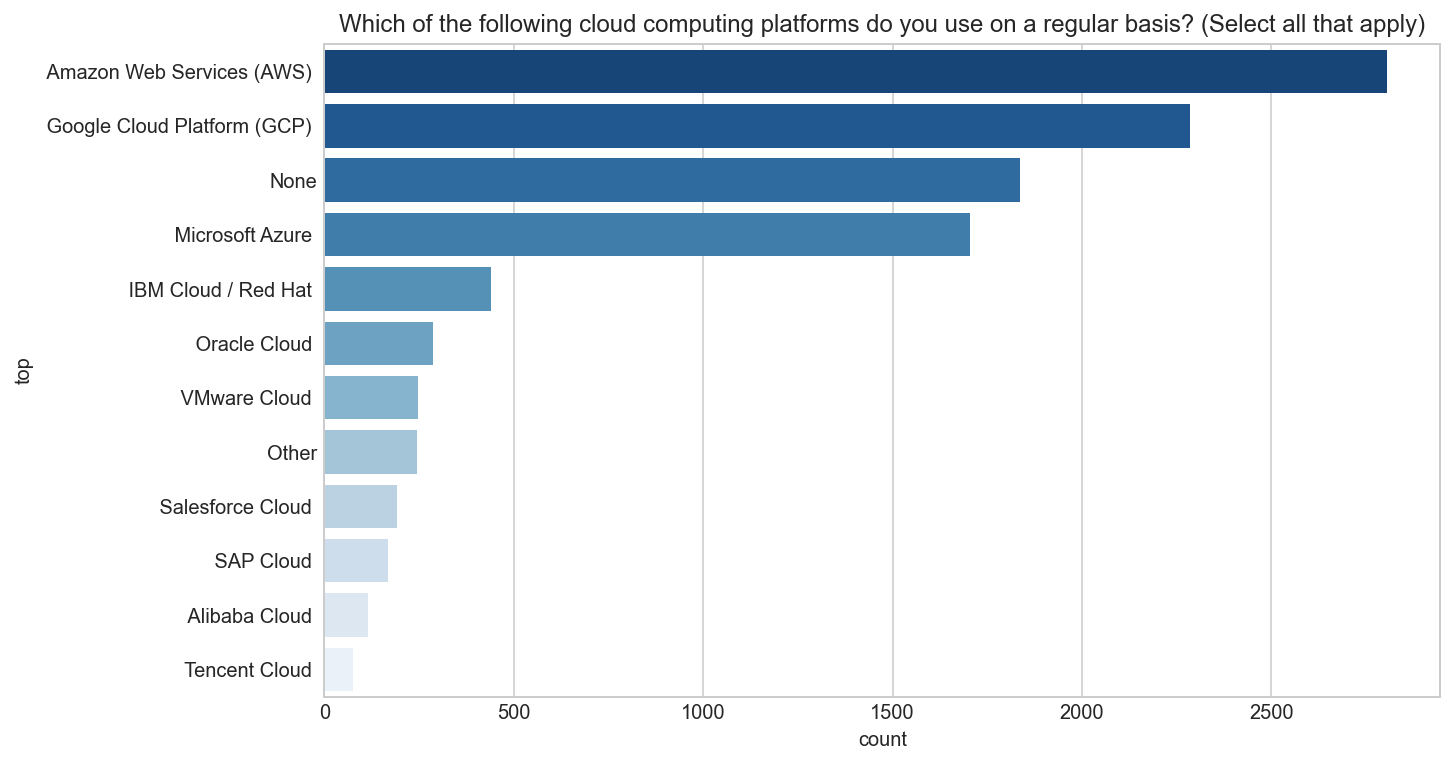

In [483]:
show_plot_by_qno("Q26_A")

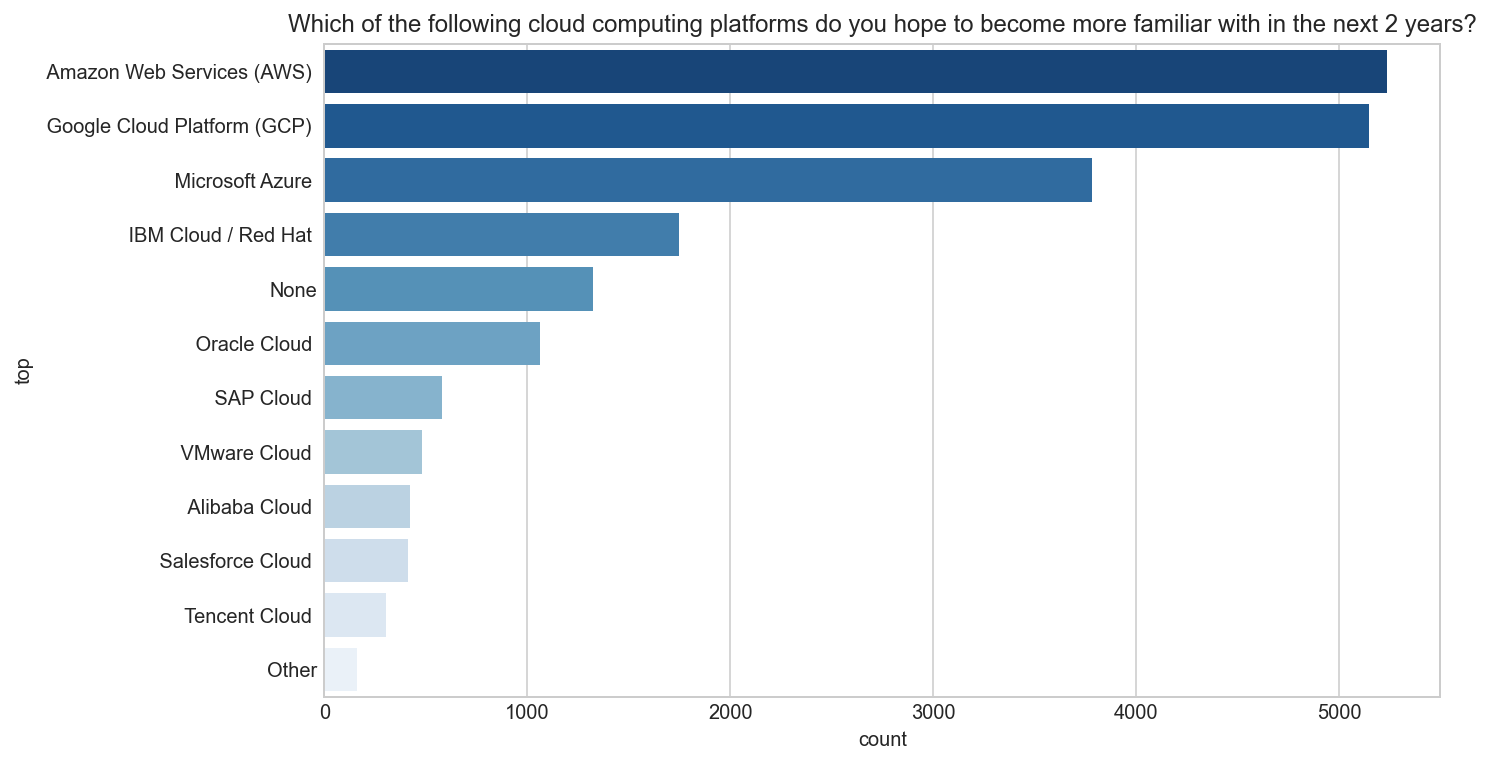

In [485]:
show_plot_by_qno("Q26_B")

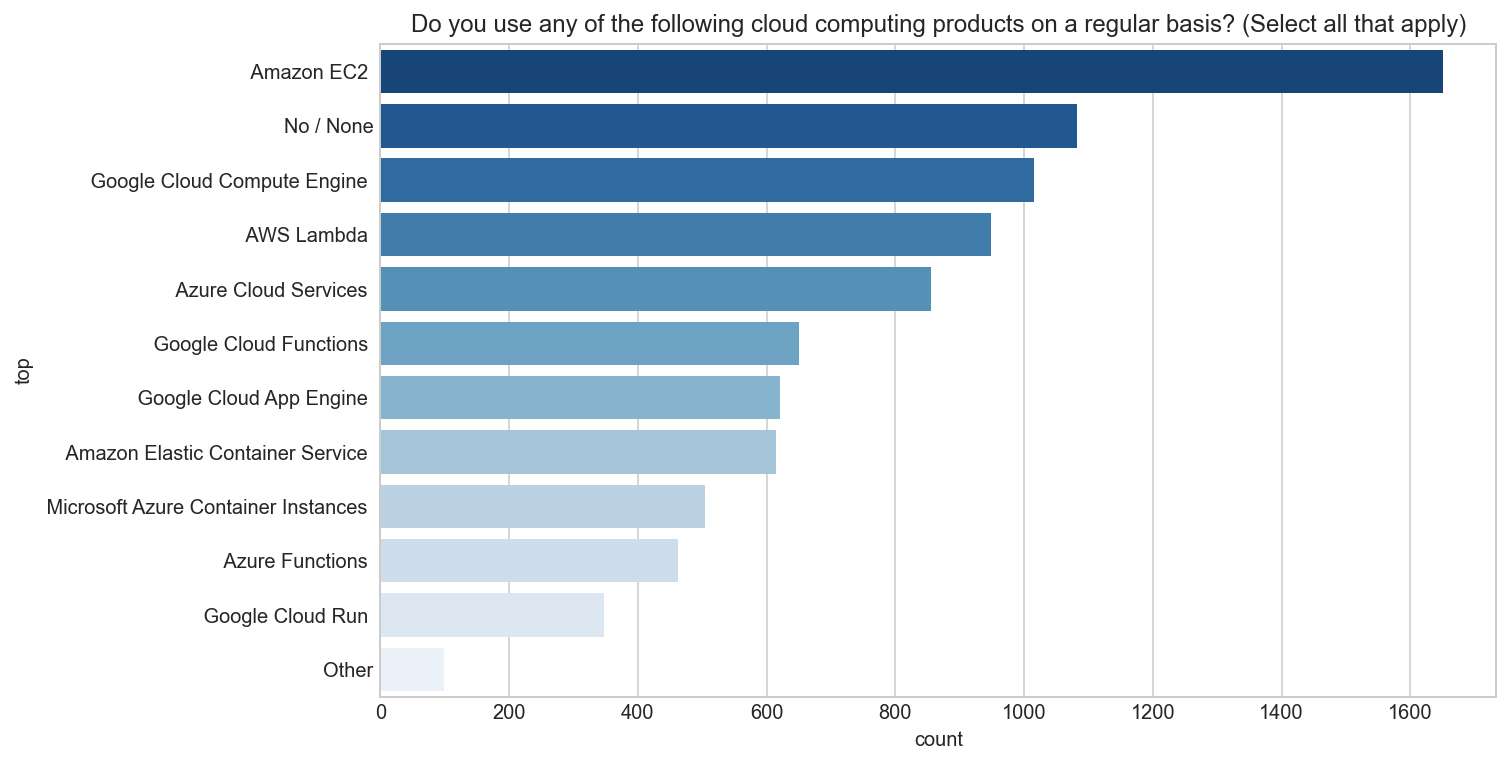

In [487]:
show_plot_by_qno("Q27_A")

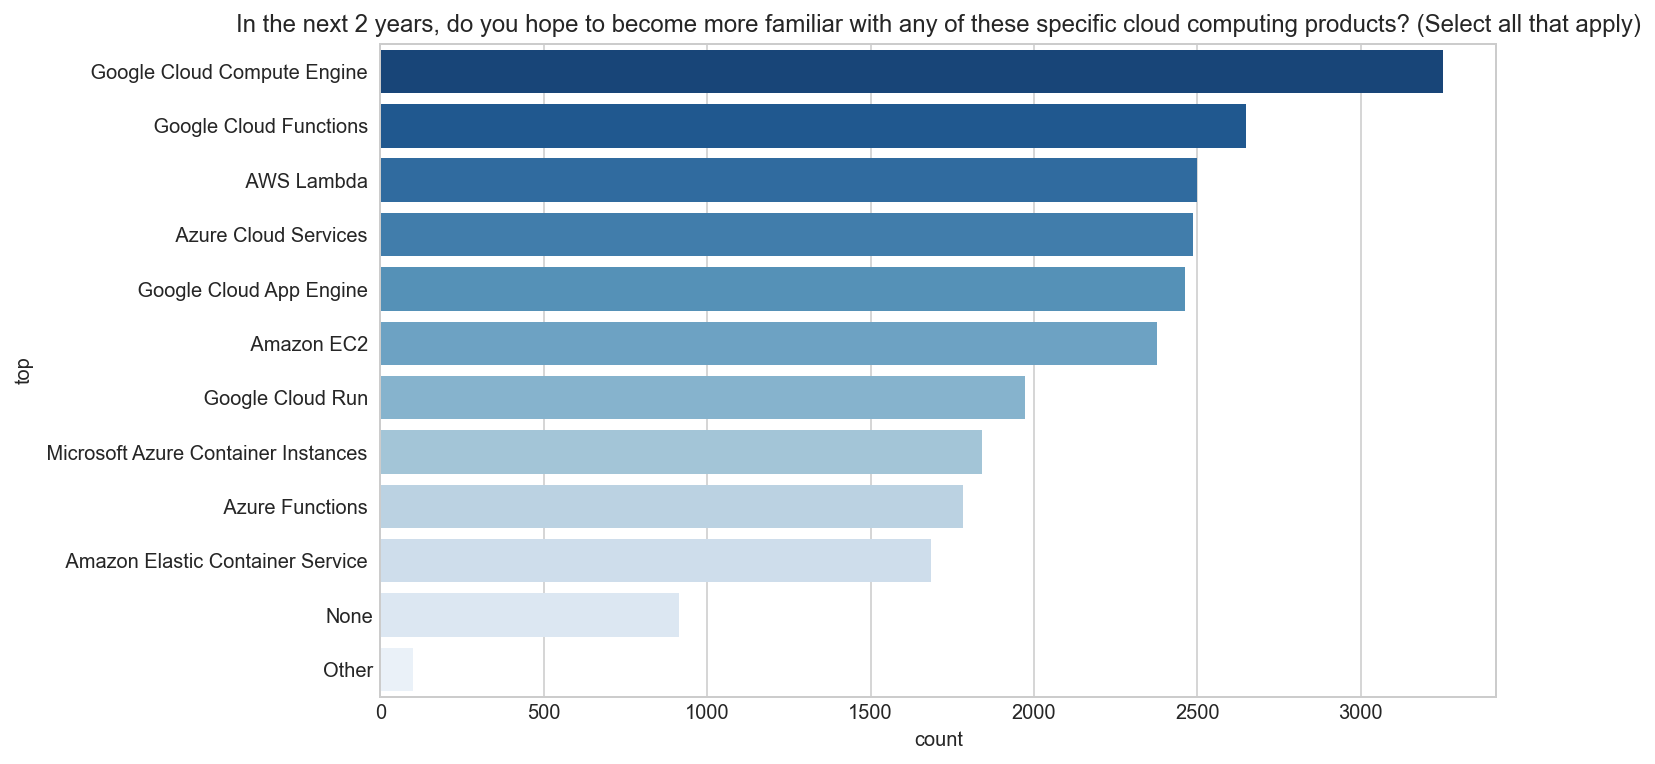

In [488]:
show_plot_by_qno("Q27_B")

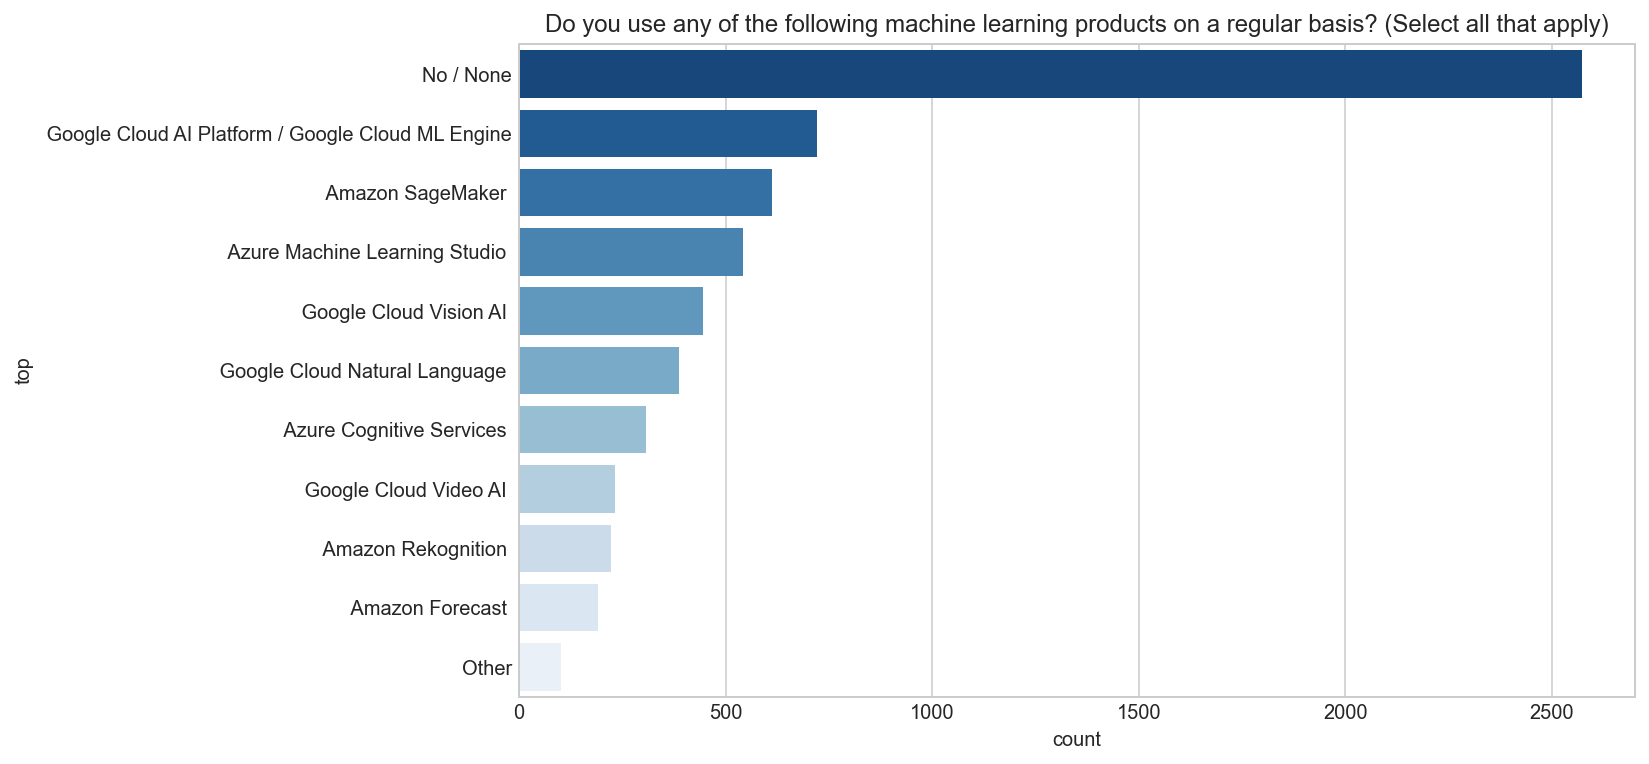

In [497]:
show_plot_by_qno("Q28_A")

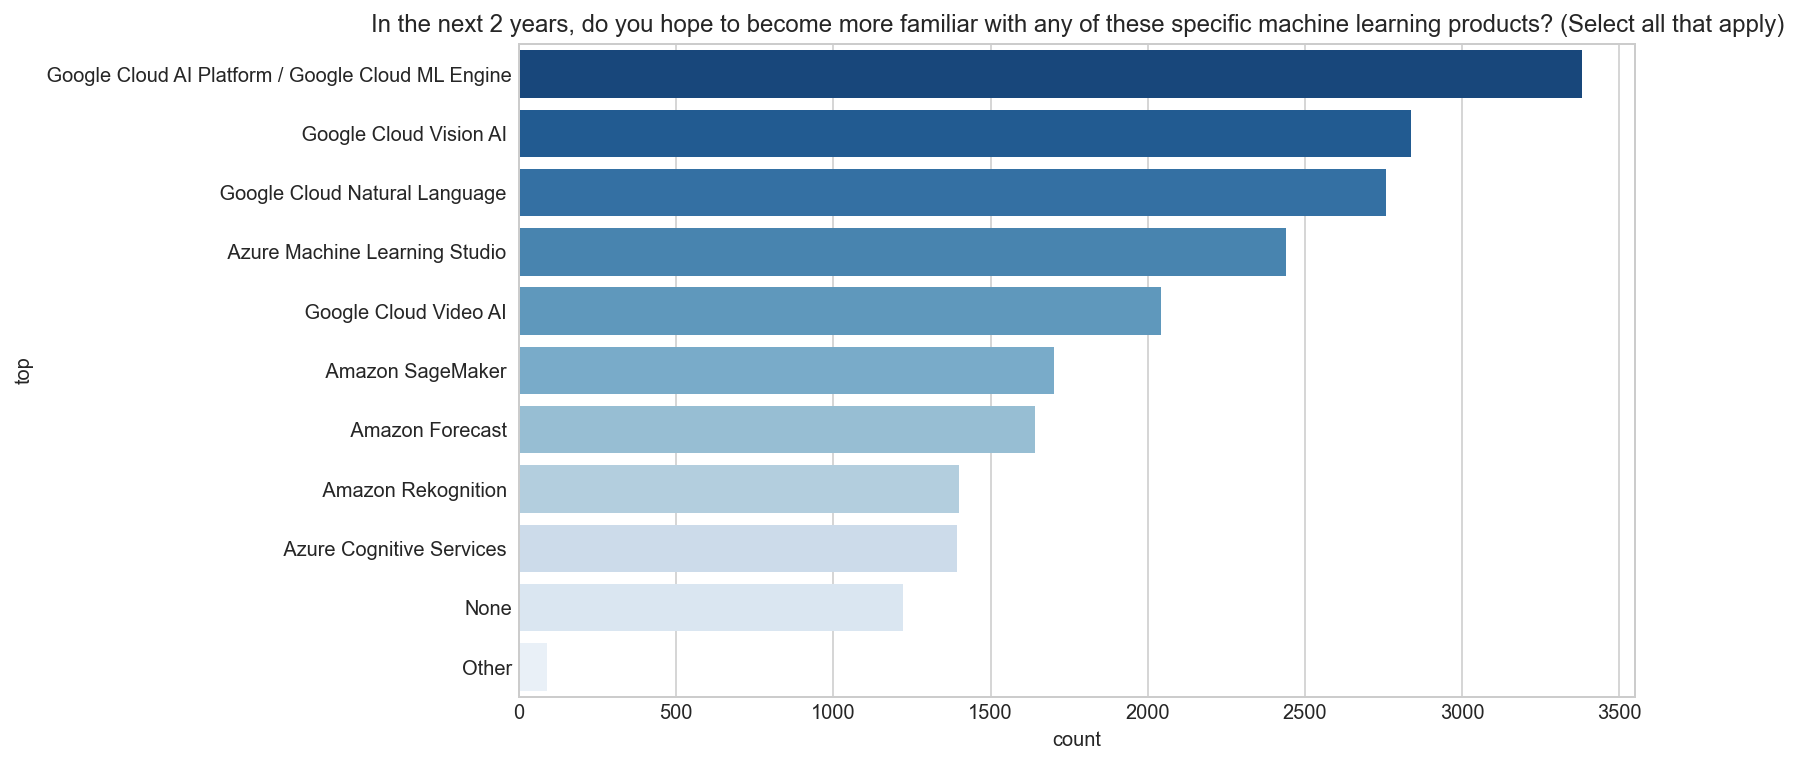

In [498]:
show_plot_by_qno("Q28_B")

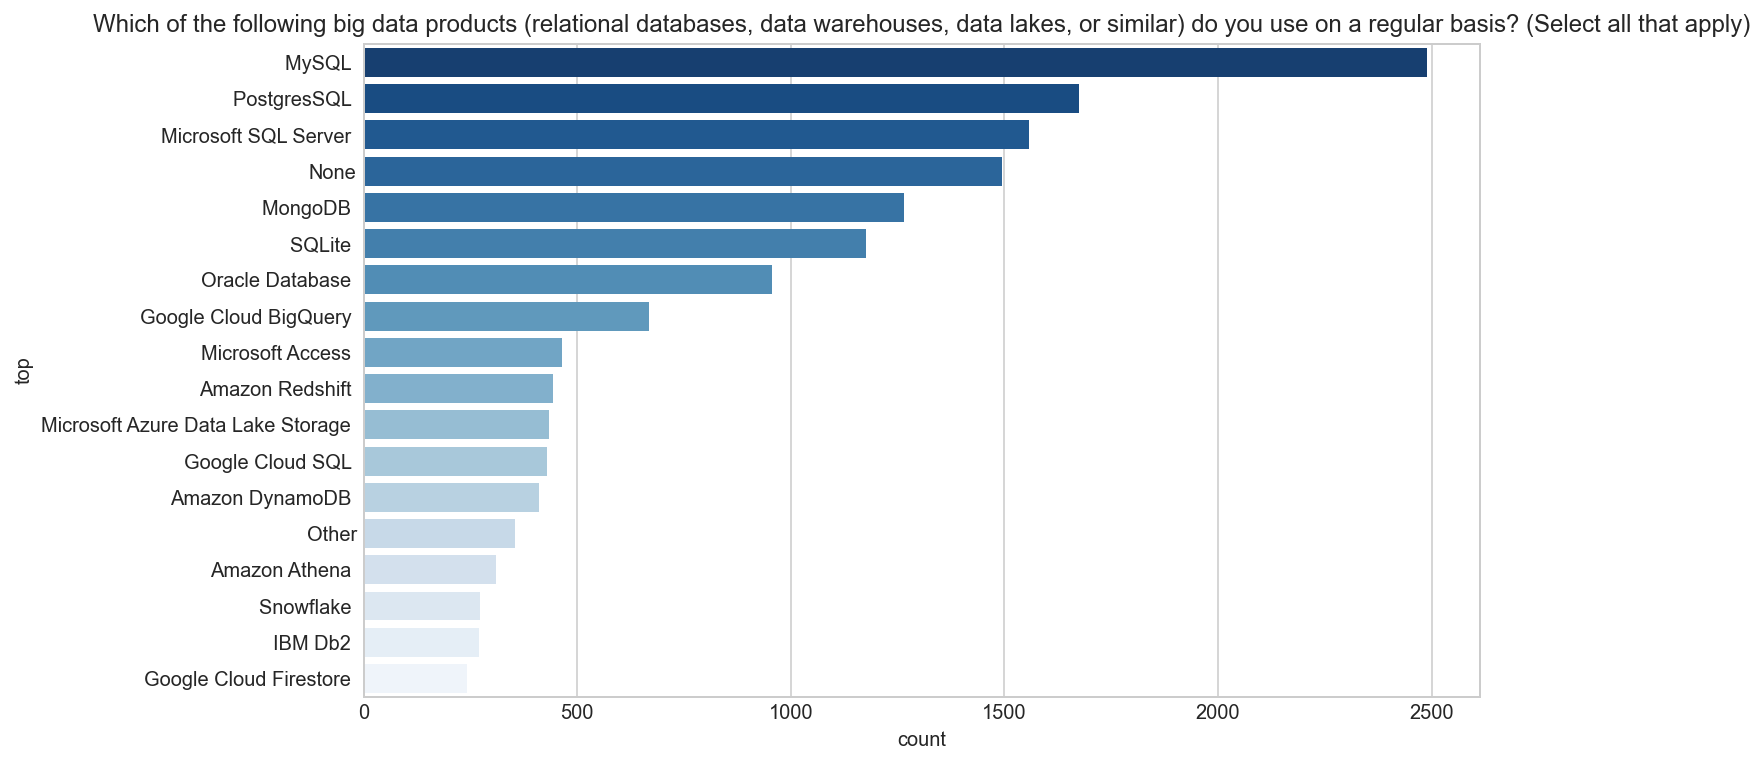

In [500]:
show_plot_by_qno("Q29_A")

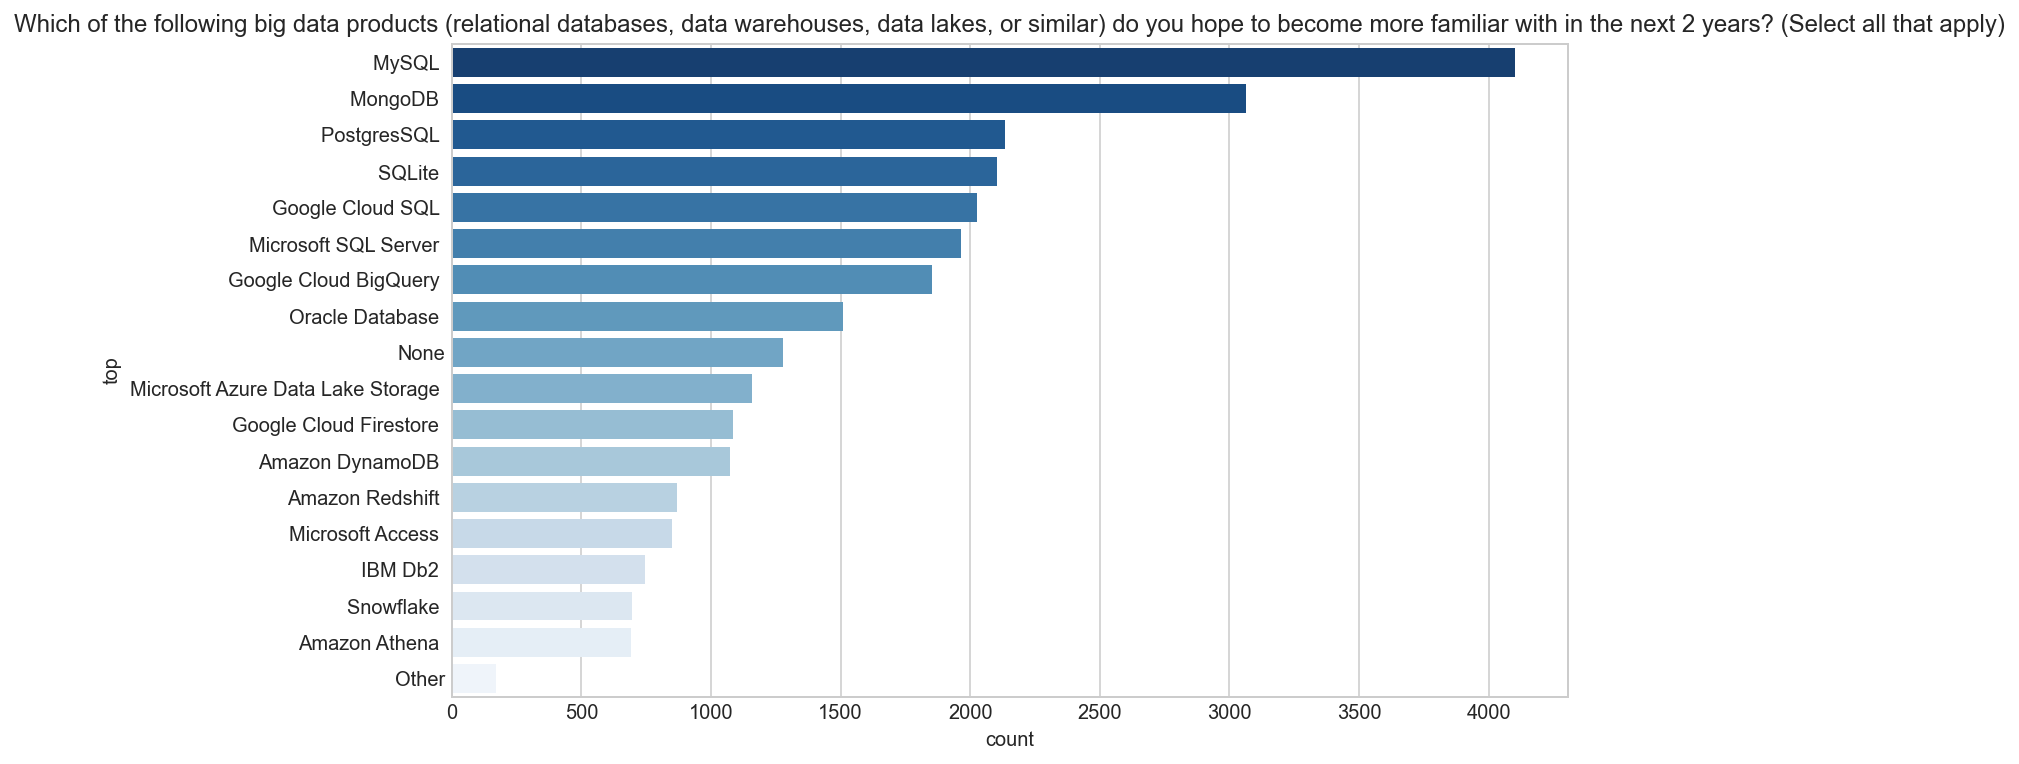

In [501]:
show_plot_by_qno("Q29_B")

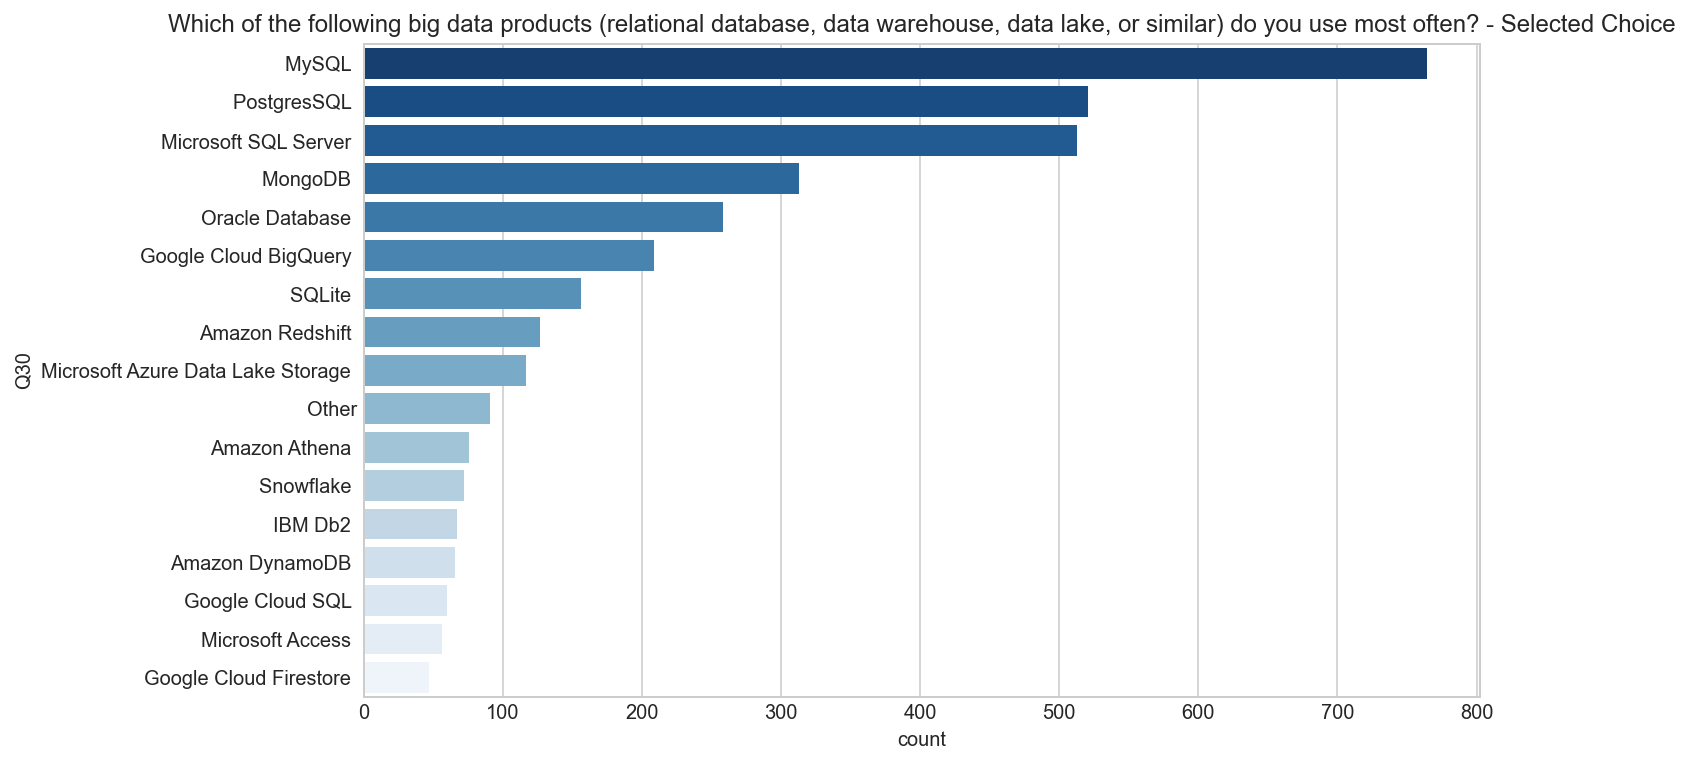

In [502]:
show_plot_by_qno("Q30")

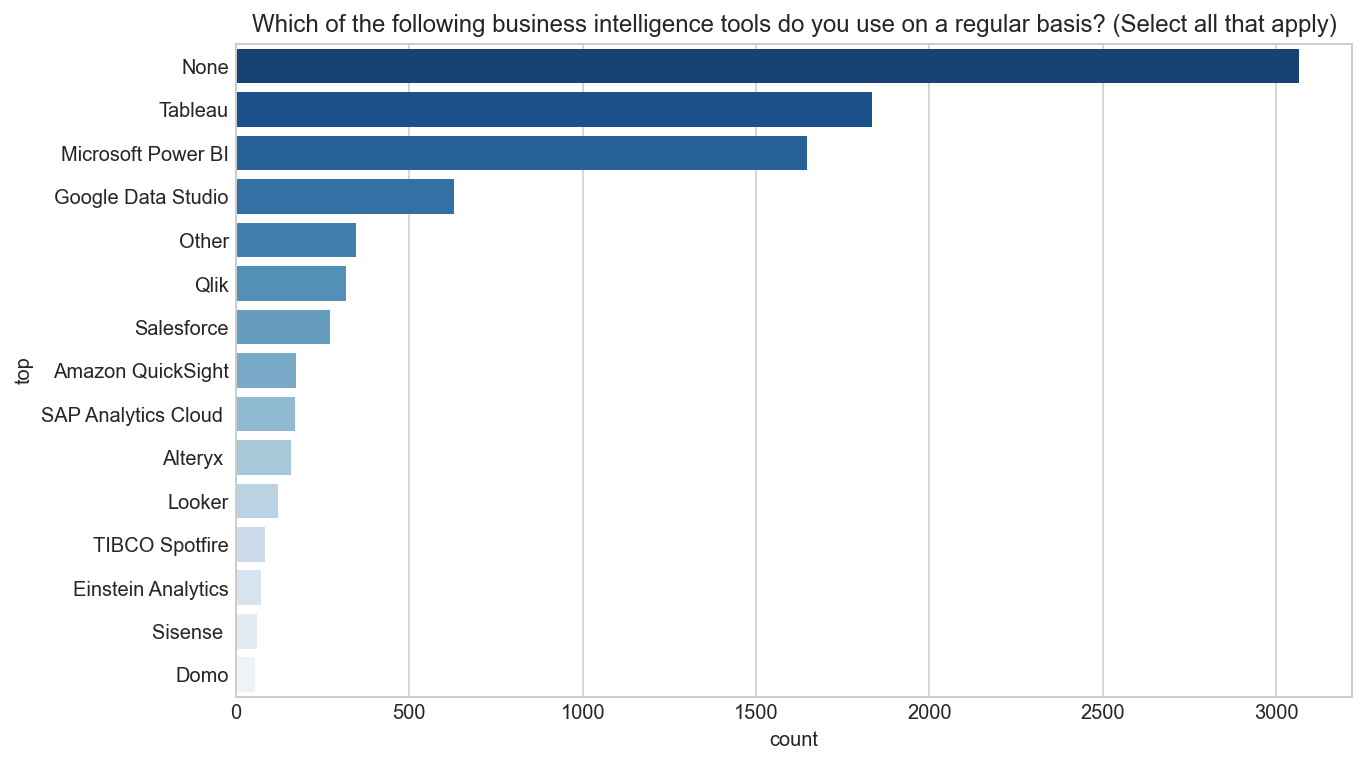

In [504]:
show_plot_by_qno("Q31_A")

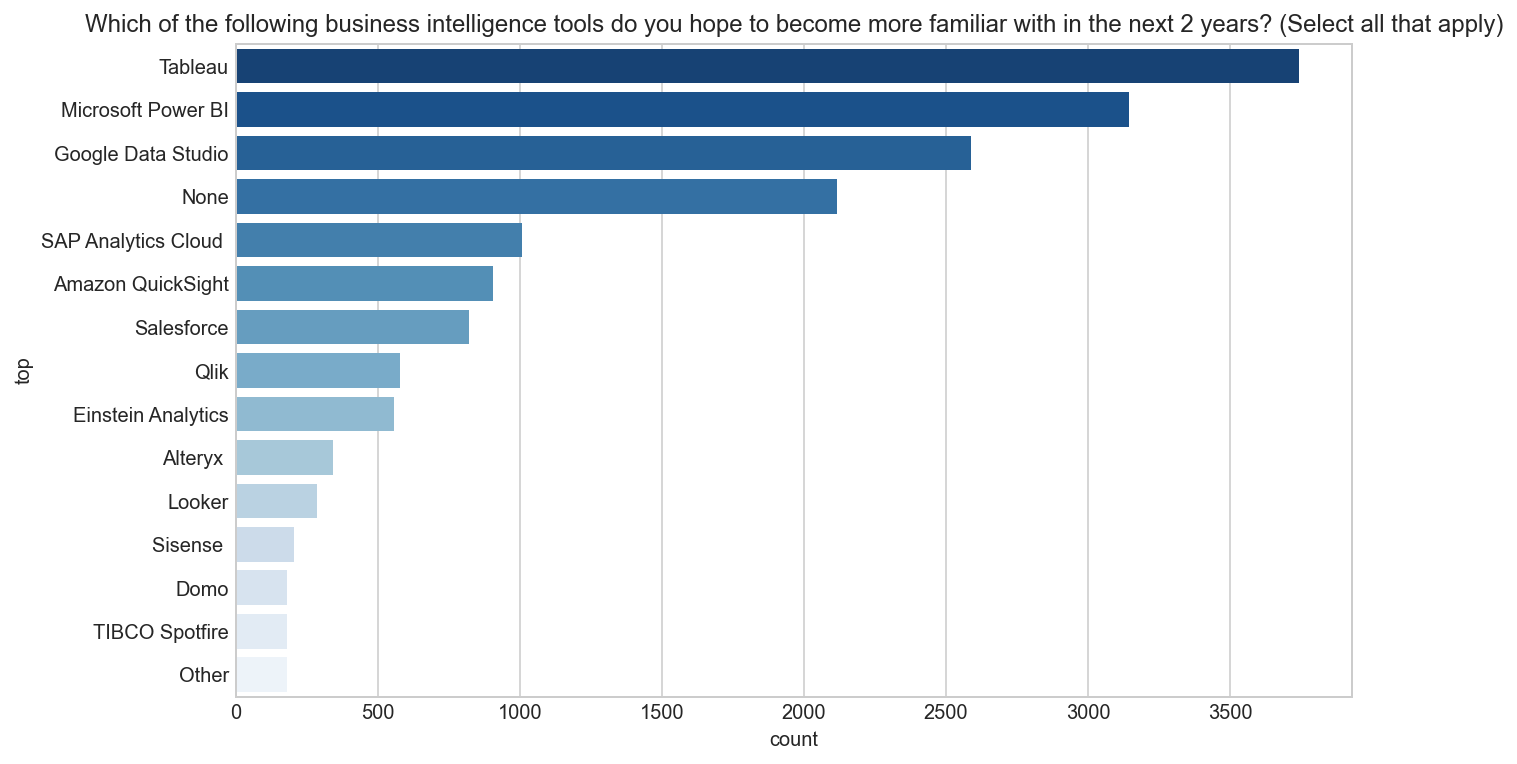

In [505]:
show_plot_by_qno("Q31_B")

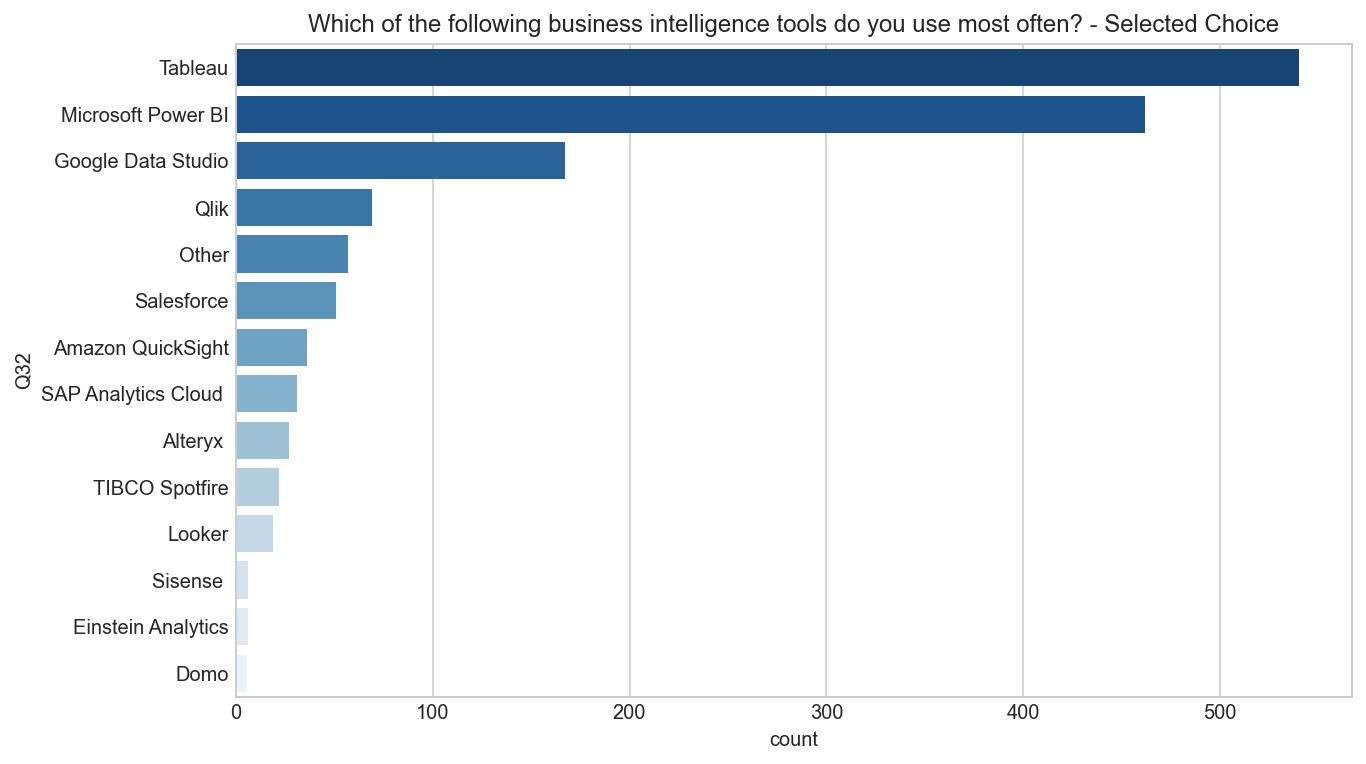

In [506]:
show_plot_by_qno("Q32")

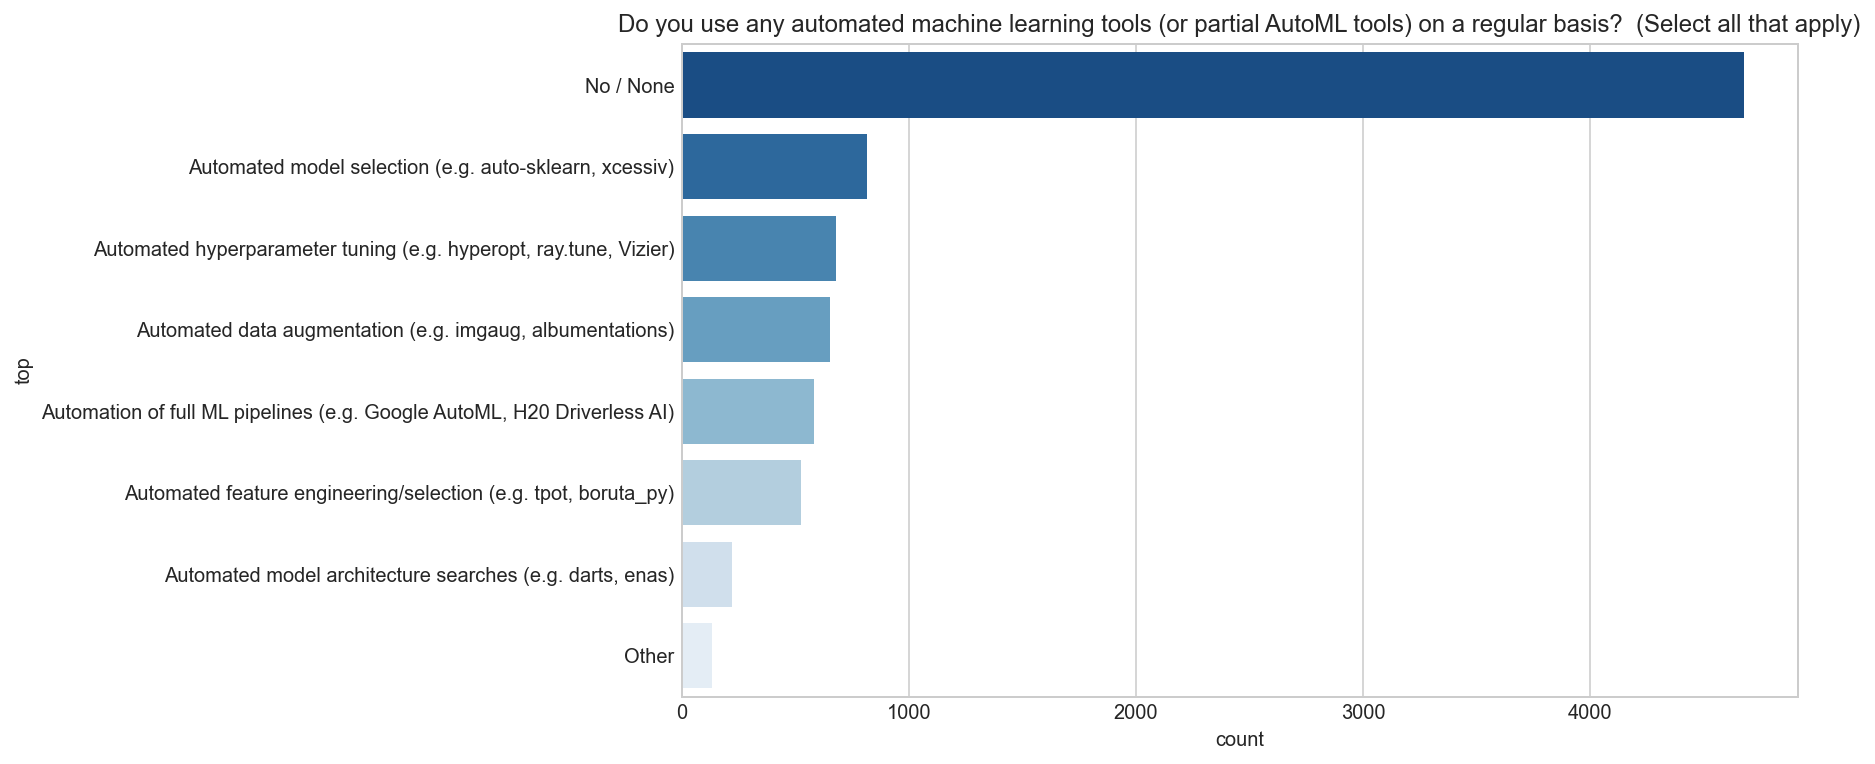

In [508]:
show_plot_by_qno("Q33_A")

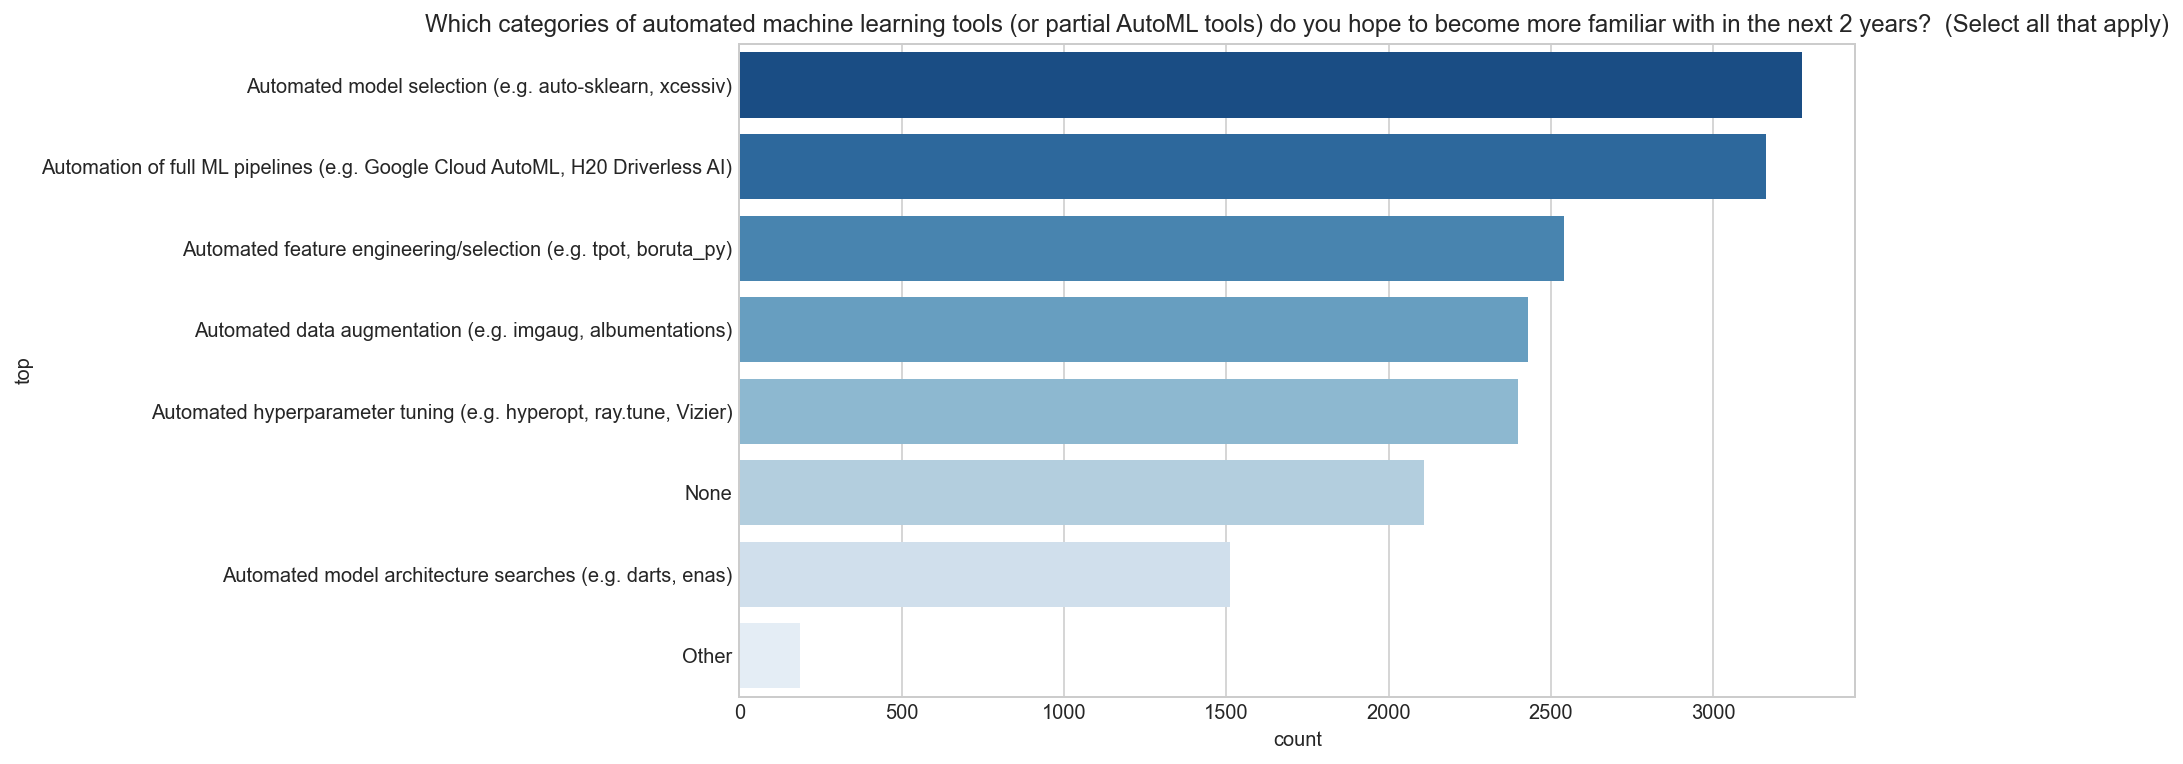

In [509]:
show_plot_by_qno("Q33_B")

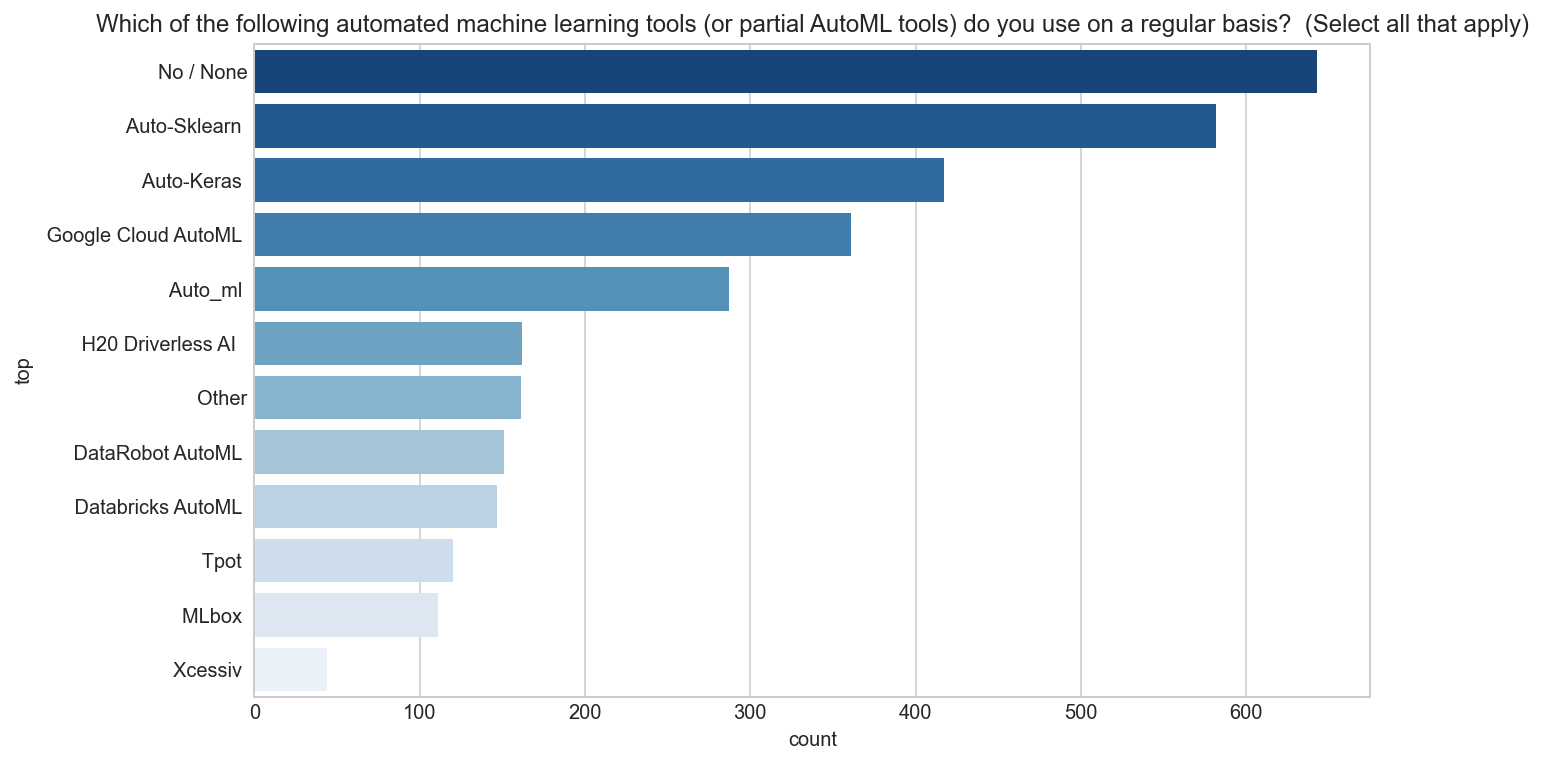

In [510]:
show_plot_by_qno("Q34_A")

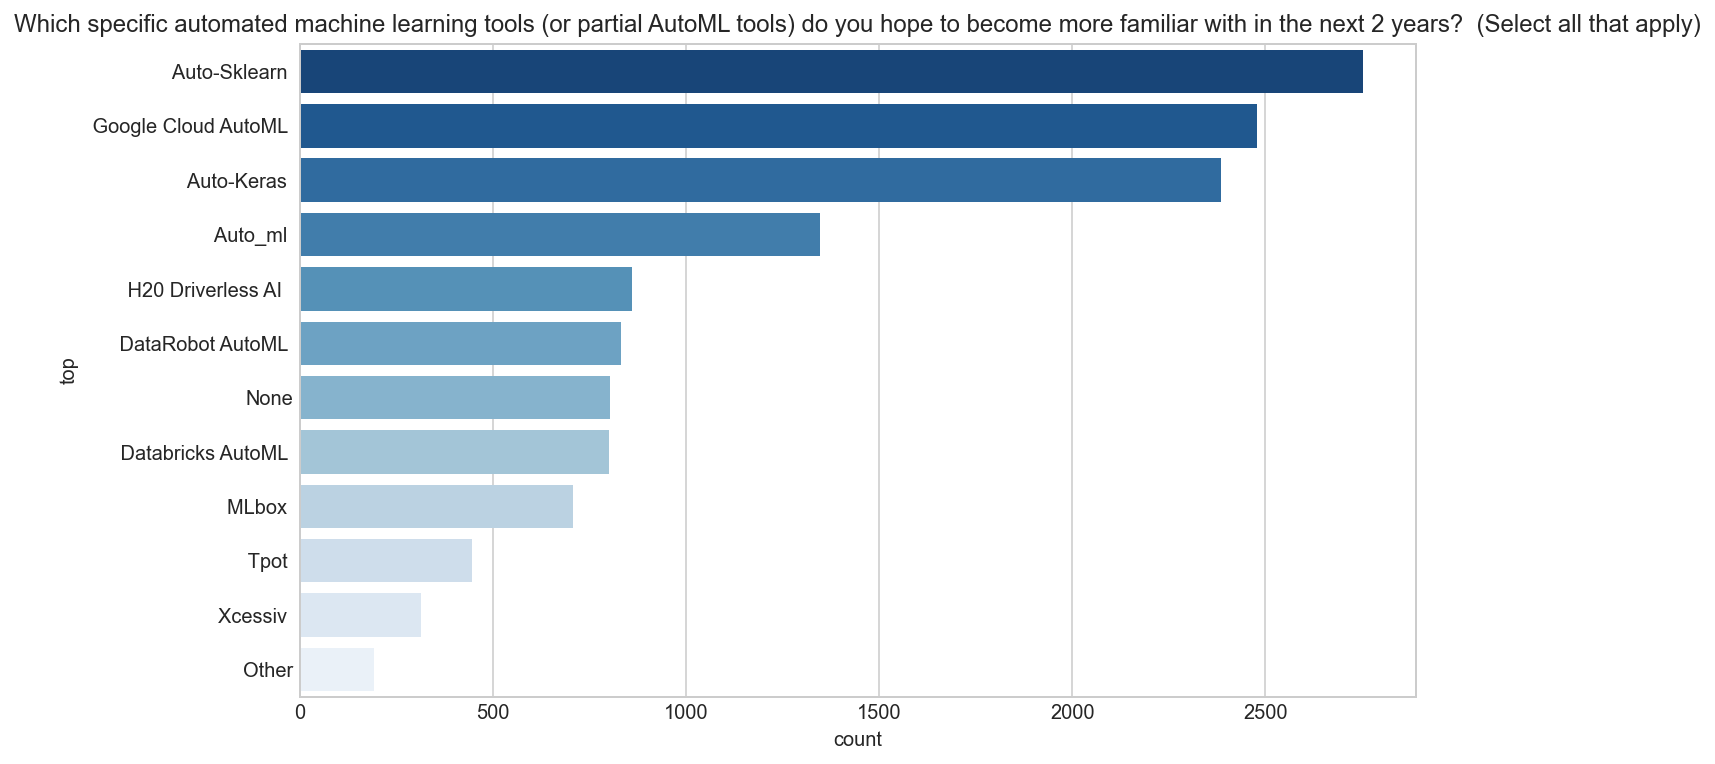

In [511]:
show_plot_by_qno("Q34_B")

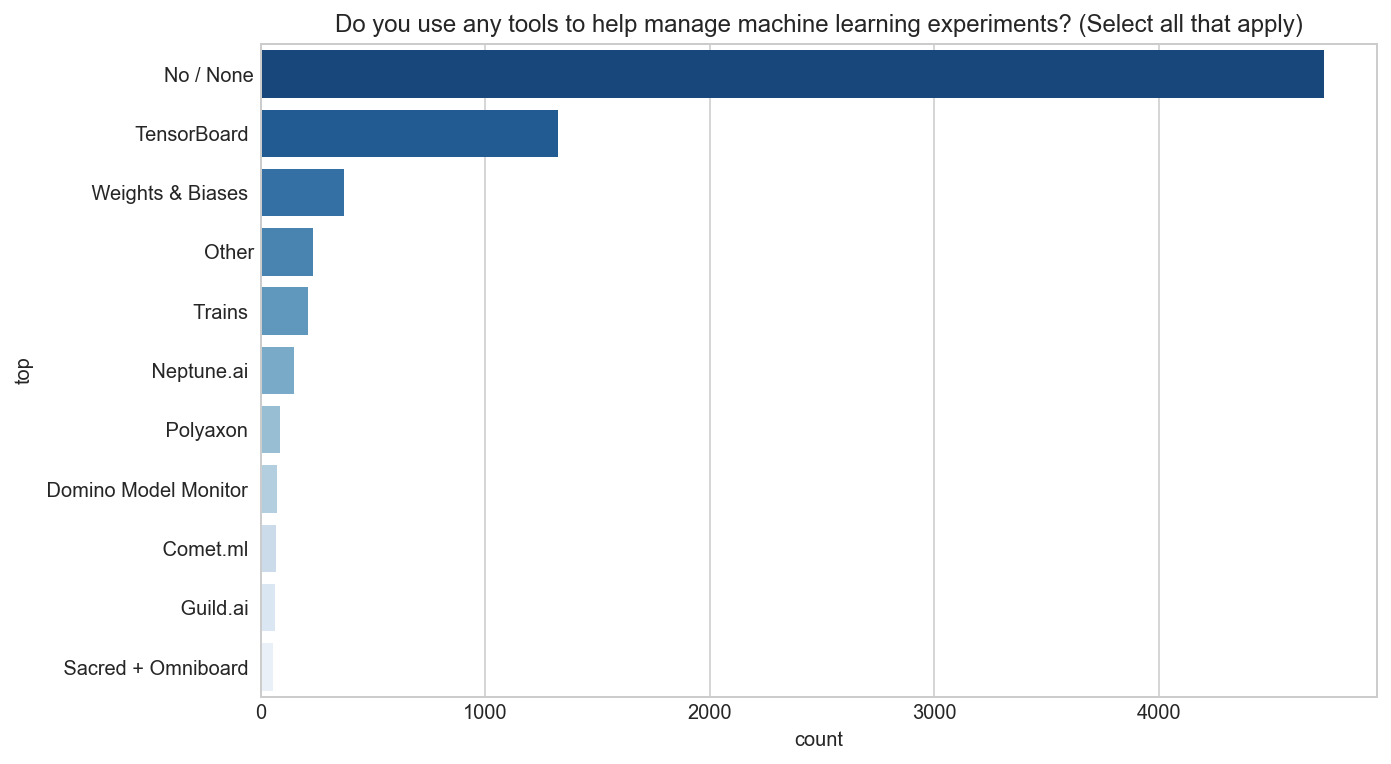

In [512]:
show_plot_by_qno("Q35_A")

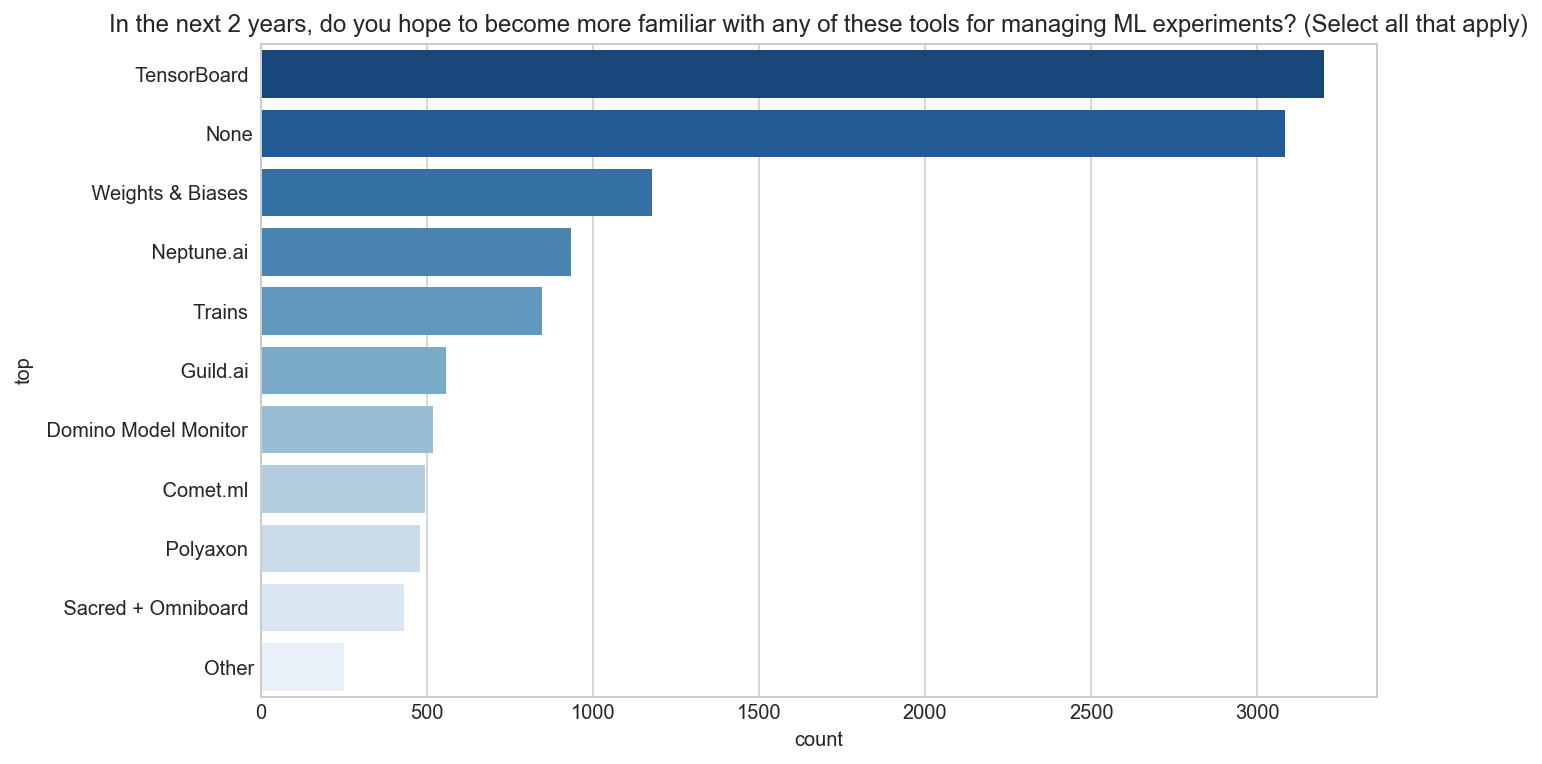

In [513]:
show_plot_by_qno("Q35_B")

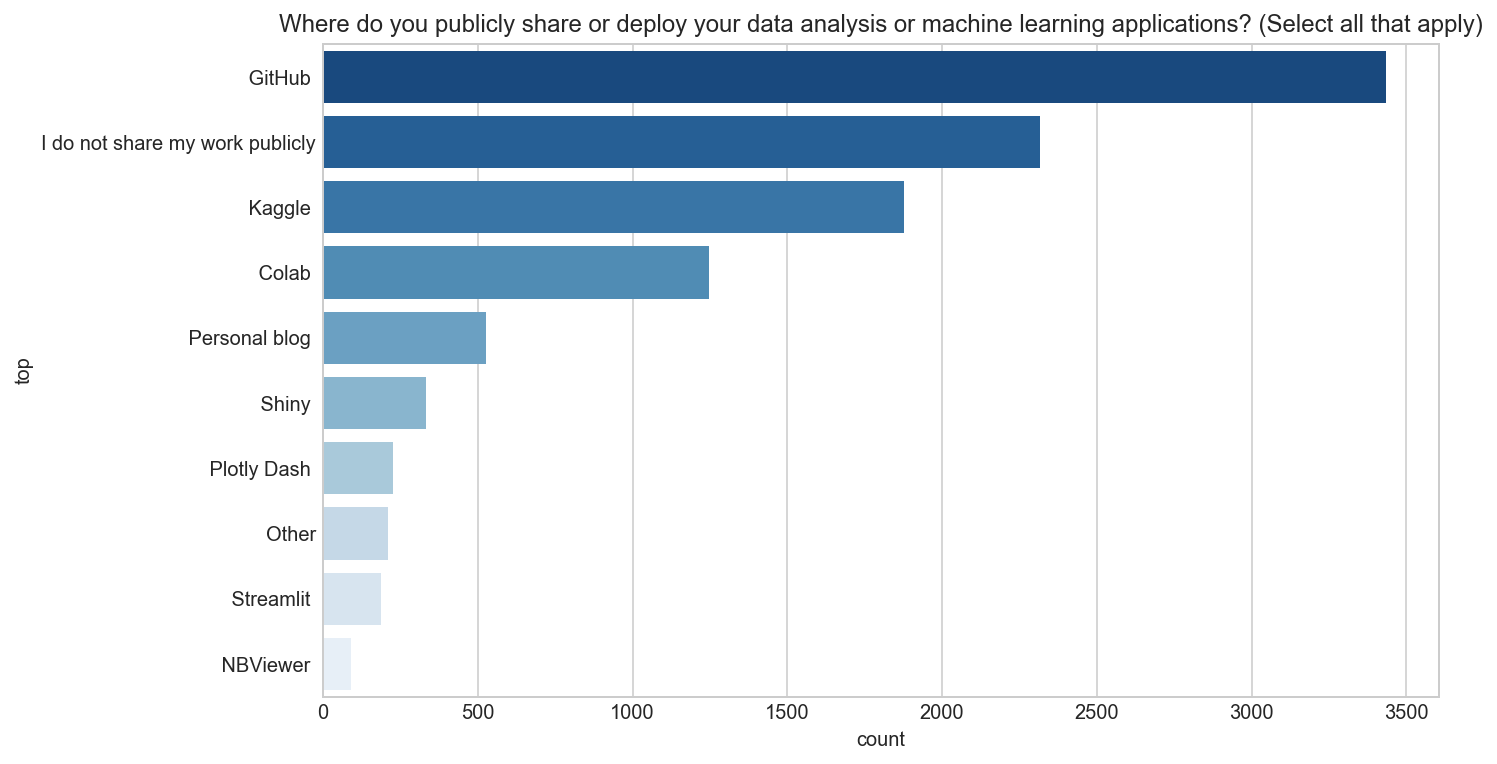

In [514]:
show_plot_by_qno("Q36")

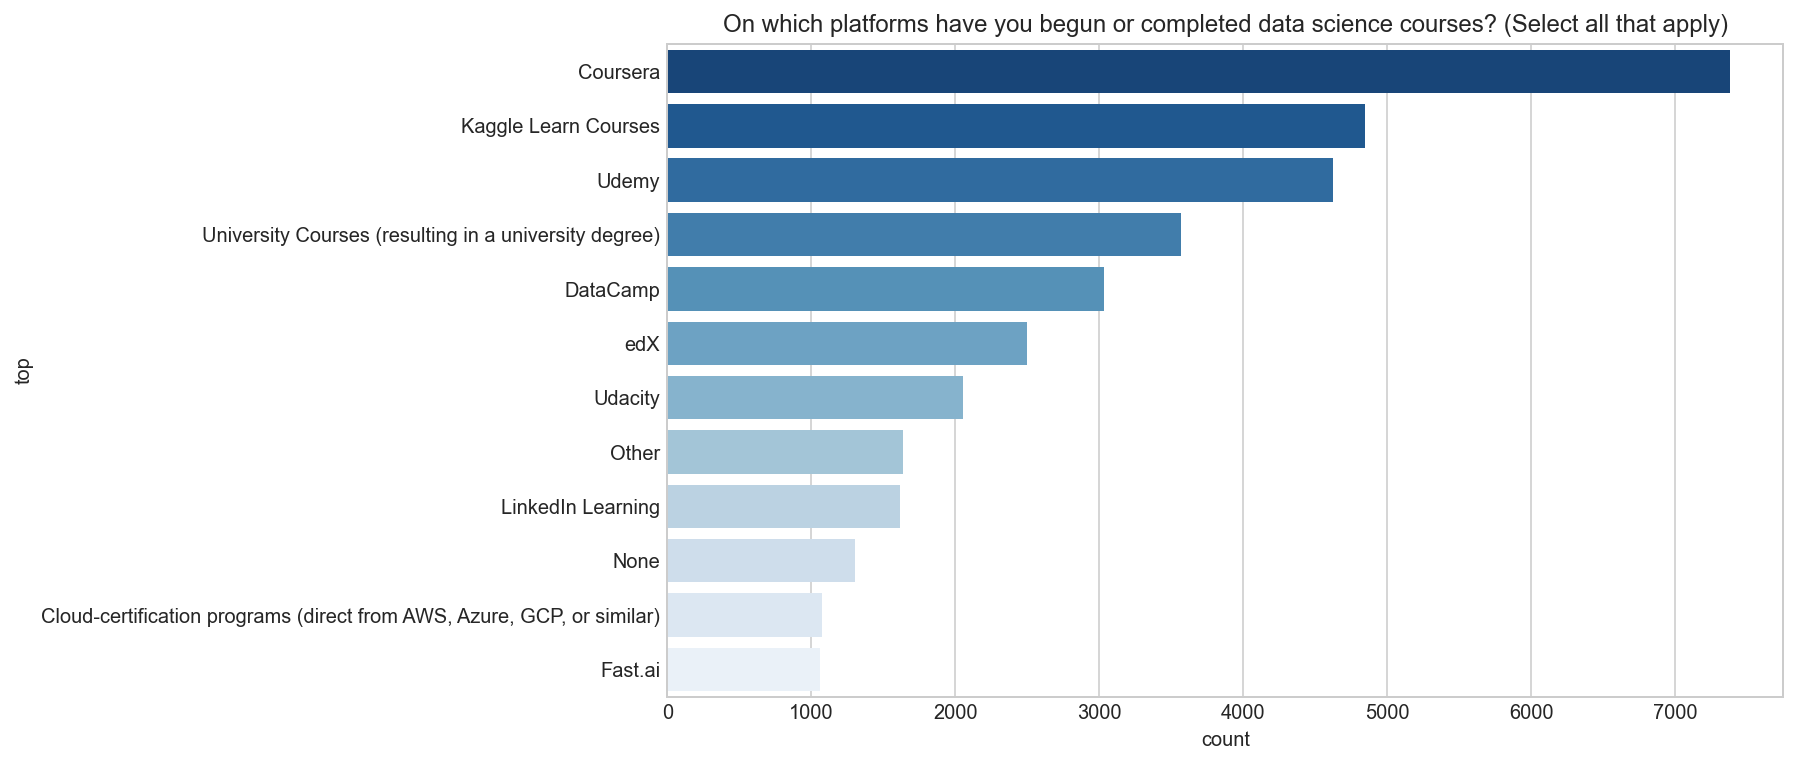

In [515]:
show_plot_by_qno("Q37")

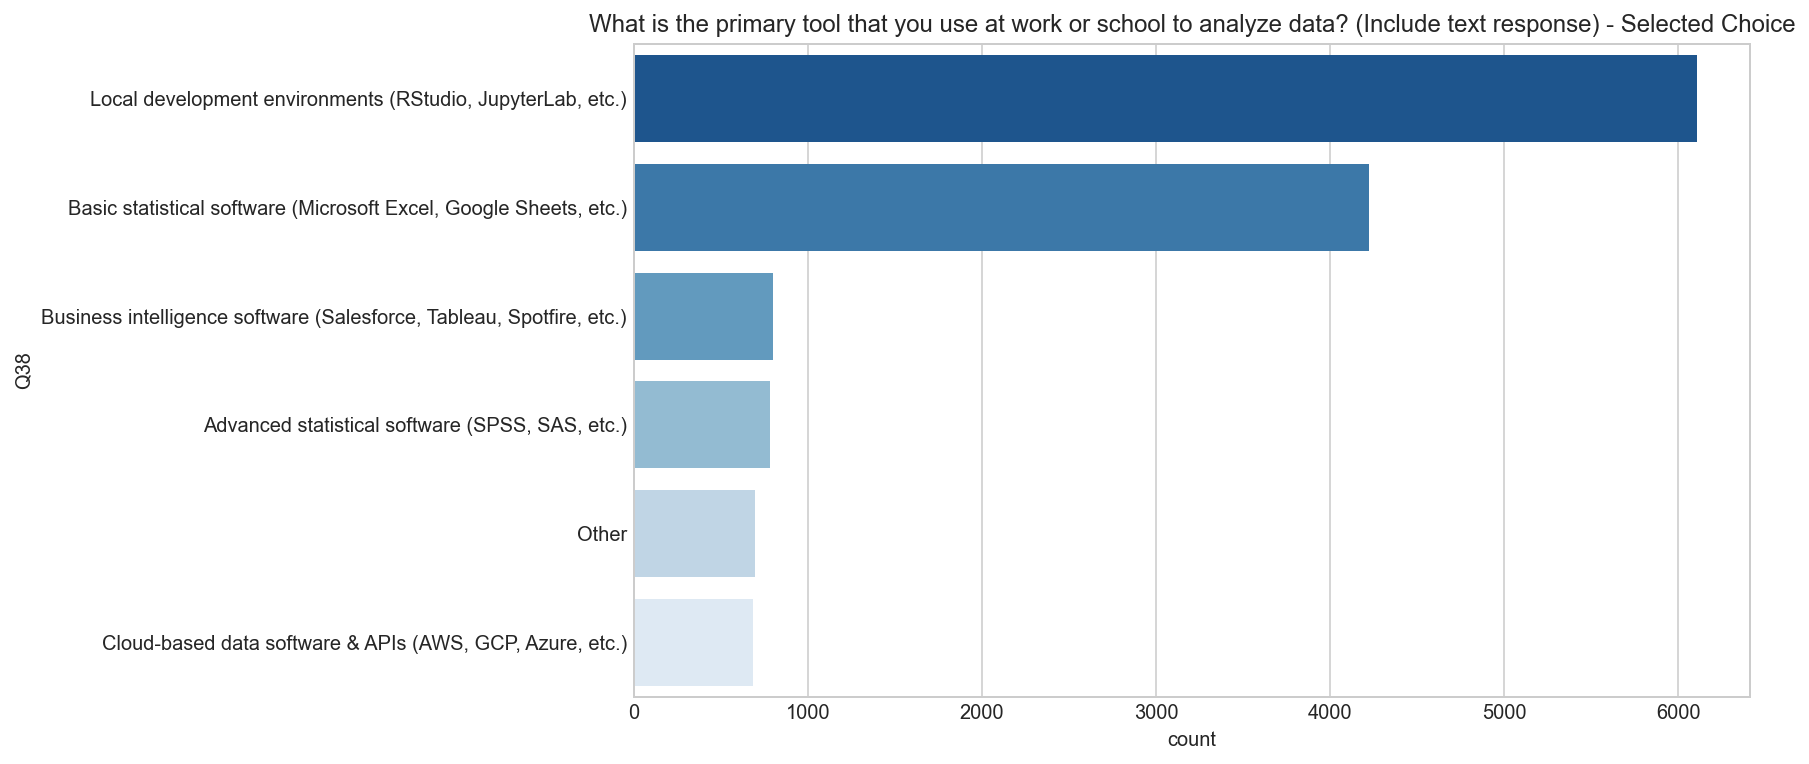

In [516]:
show_plot_by_qno("Q38")

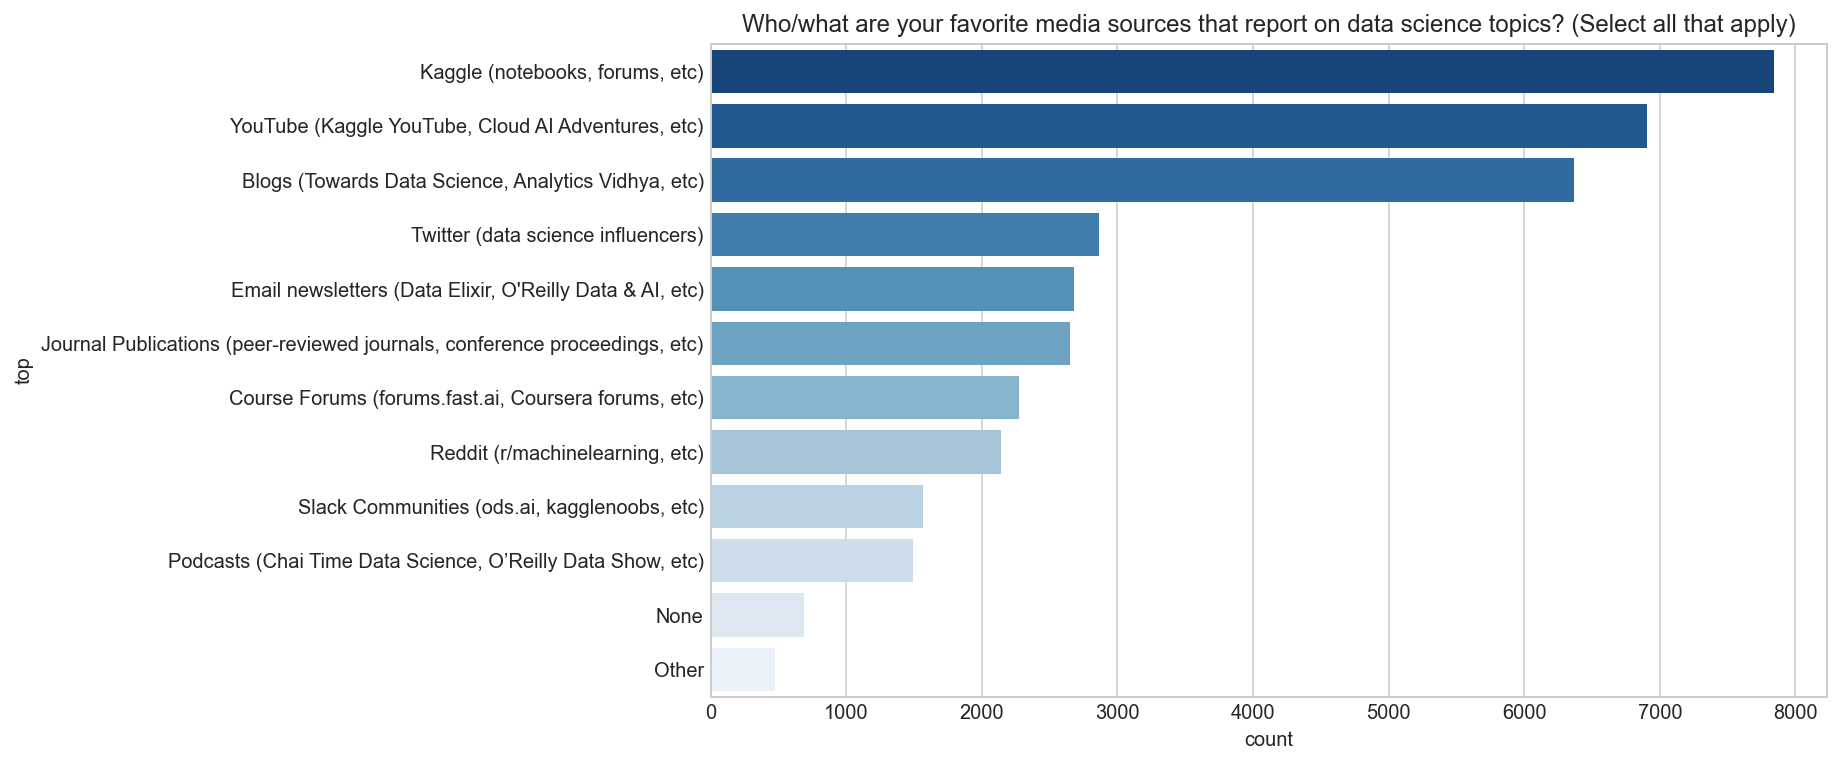

In [517]:
show_plot_by_qno("Q39")